In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import time

#### The one-dimensional diffusion equation model
$$ 
\begin{align}
\frac{\partial{C}}{\partial {t}} &= D \frac{\partial^2{C}}{\partial {z^2}} - u \frac{\partial{C}}{\partial {z}} + r \\ \\
\frac{c_{i}^{(n+1)}-c_{i}^{(n)}}{\Delta t} & = D \frac{c_{i+1}^{(n)} - 2c_{i}^{(n)} + c_{i-1}^{(n)}} {(\Delta z)^2} + u \frac{c_{i+1,j}^{(n)}- c_{i-1,j}^{(n)}}{2\Delta z} + r\\ \\
c_{i}^{(n+1)} & = c_{i}^{(n)} + \Delta t \left[ D \frac{c_{i+1}^{(n)} - 2c_{i}^{(n)} + c_{i-1}^{(n)}} {(\Delta z)^2} + u \frac{c_{i+1,j}^{(n)}- u_{i-1,j}^{(n)}}{2\Delta z} + r \right] \\ \\
%\Delta t & = \frac{1}{2D}\frac{(\Delta x \Delta y)^2}{(\Delta x)^2 + (\Delta y)^2}
\end{align}
$$



#### Energy balance equation

$$ 
\begin{align}
\frac{\partial{T}}{\partial {t}} &= \frac{\lambda_{e}}{\rho C_p} \frac{\partial^2{T}}{\partial {z^2}} - u\frac{\rho_g C_{pg}}{\rho C_p} \frac{\partial{C}}{\partial {z}} + \frac{(-\Delta H)}{\rho C_p} \frac{\rho_g \varepsilon}{MW_g}r + \frac{2\alpha}{L_R}\frac{T_w - T}{\rho C_p} \\ \\
\frac{T_{i}^{(n+1)}-T_{i}^{(n)}}{\Delta t} & = \frac{\lambda_{e}}{\rho C_p} \frac{T_{i+1}^{(n)} - 2T_{i}^{(n)} + T_{i-1}^{(n)}} {(\Delta z)^2} + u\frac{\rho_g C_{pg}}{\rho C_p} \frac{T_{i+1,j}^{(n)}- T_{i-1,j}^{(n)}}{2\Delta z} +  \frac{(-\Delta H)}{\rho C_p} \frac{\rho_g \varepsilon}{MW_g}r + \frac{2\alpha}{L_R}\frac{T_w - T}{\rho C_p}\\ \\
T_{i}^{(n+1)} & = T_{i}^{(n)} + \Delta t \left[ \frac{\lambda_{e}}{\rho C_p} \frac{T_{i+1}^{(n)} - 2T_{i}^{(n)} + T_{i-1}^{(n)}} {(\Delta z)^2} + u\frac{\rho_g C_{pg}}{\rho C_p} \frac{T_{i+1,j}^{(n)}- u_{i-1,j}^{(n)}}{2\Delta z} + \frac{(-\Delta H)}{\rho C_p} \frac{\rho_g \varepsilon}{MW_g}r + \frac{2\alpha}{L_R}\frac{T_w - T}{\rho C_p} \right]
\end{align}
$$



#### Boundary conditions 
The most detailed boundary conditions found are those by Wehner and Wilhelm [ll] ; however, for the pseudohomogeneous dispersion model the smallest characteristic length of significance is the particle diameter [12]  The depth of longitudinal back dispersion is at most only a fraction of this dimension, even at the low Reynolds.(from Billimoria and Butt 1979).

$$
\begin{align}
z_i & = z_{i0} \qquad  z = z_1 \\
\frac{\partial {c_i}}{\partial{z}} & = 0 \qquad z = z_2 \\
T &= T_0    \qquad z  = 0\\
\frac{\partial{T}}{\partial{z}} & = 0 \qquad z = L_R
\end{align}
$$

$$
\begin{align}
\frac{\partial{C}}{\partial {z}} & = \frac{c_{i+1,j}^{(n)}- c_{i-1,j}^{(n)}}{2\Delta z} = 0\\
\frac{\partial{T}}{\partial{z}} & = \frac{T_{i+1,j}^{(n)}- T_{i-1,j}^{(n)}}{2\Delta z} = 0
\end{align}
$$

In [2]:
#Implemetantion 

In [3]:
#initialization of variables

In [4]:
# create the matrix A and vector b

In [5]:
L = 0.1
n = 10
x = np.linspace(0,L,n+1) # where n+1 is the number of time steps
h = x[1]-x[0]
# create matrix A
A = np.zeros((n+1,n+1)) # 
# at the boundaries
A[0,0] = 1 
A[n,n] = 1
# inside the boundaries
for i in range(1,n): 
    A[i,i-1] = 1
    A[i,i] = -2
    A[i,i+1] = 1

# define  vector b
b = np.zeros(n+1)
b[1:-1] = 1*h**2 # 
b[-1]= 0


In [6]:
print(A)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [7]:
print(b)

[0.     0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.    ]


In [8]:
# solving a system of linear algebreic equations

In [9]:
y = np.linalg.solve(A, b)
print(y)

[ 0.      -0.00045 -0.0008  -0.00105 -0.0012  -0.00125 -0.0012  -0.00105
 -0.0008  -0.00045  0.     ]


In [10]:
def create_A_b(n, L):
    x = np.linspace(0,L, n+1)
    h  = x[1]-x[0]
    # create matrix A
    A = np.zeros((n+1,n+1)) 
    # at boundaries
    A[0,0] = 1 
    A[n,n] = 1
    
    # for the part inside the boundary conditions
    for i in range(1,n): 
        A[i,i-1] = 1
        A[i,i] = -2
        A[i,i+1] = 1
        
    # Create vector b
    b = np.zeros(n+1)
    b[0] = 1 # any fitting expression
    b[-1] = 50 # any fitting expression
    for i in range(1,n+1):
        b[i] = h**2*x[i] # add the R.H.S expression        
    return x,A,b 

In [11]:
# Another Example: Heat Equation

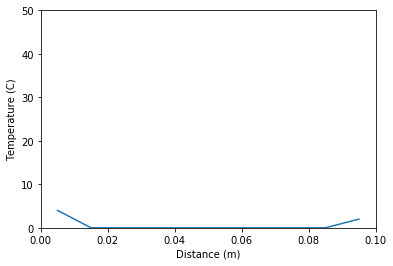

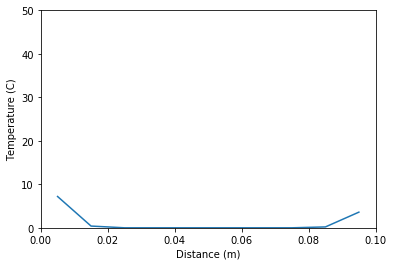

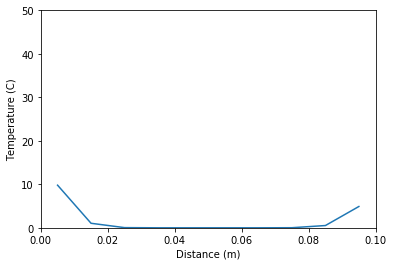

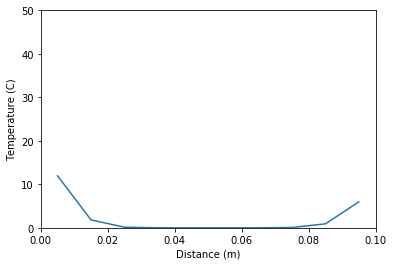

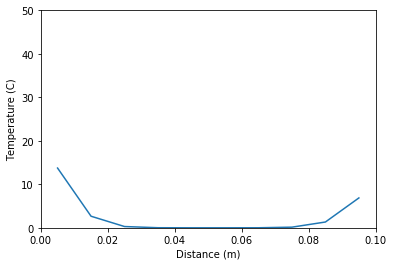

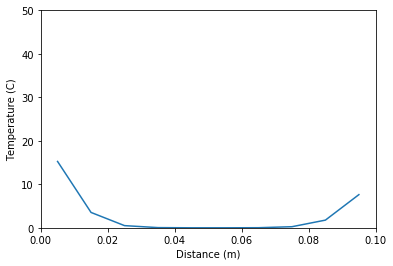

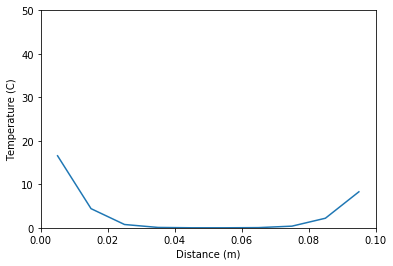

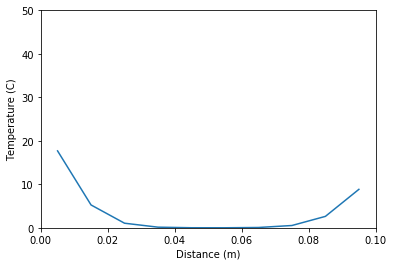

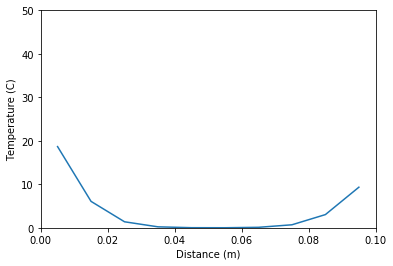

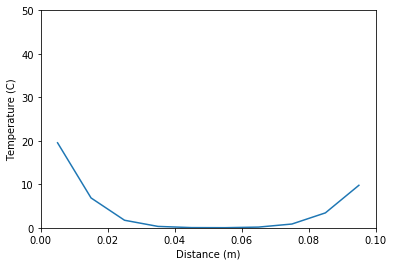

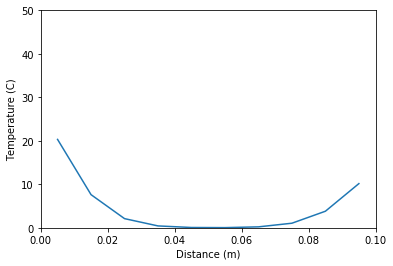

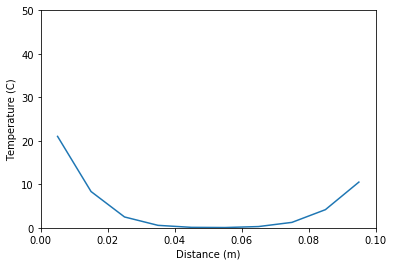

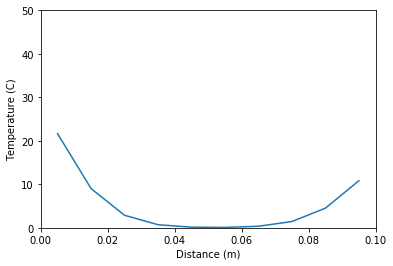

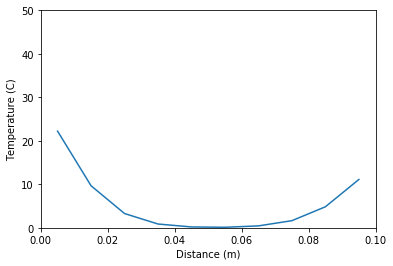

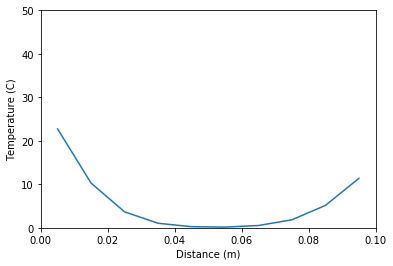

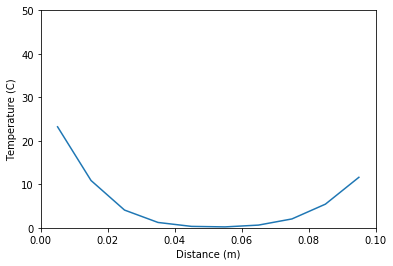

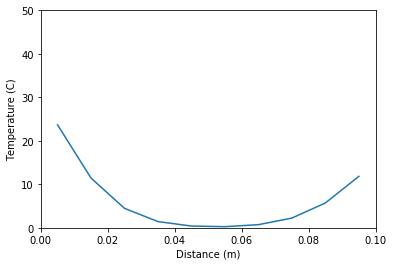

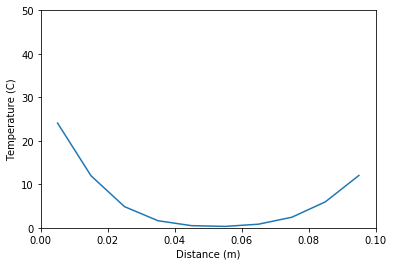

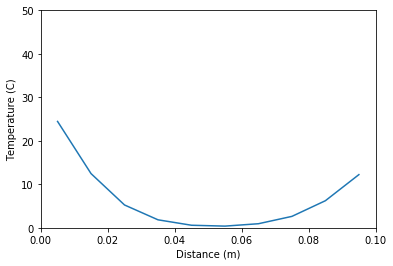

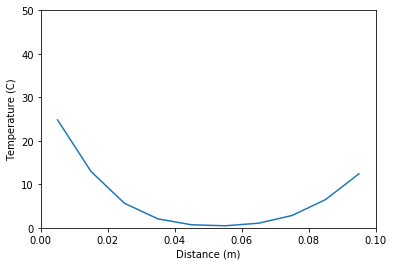

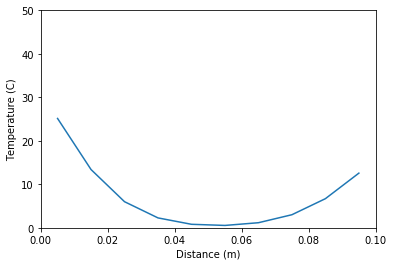

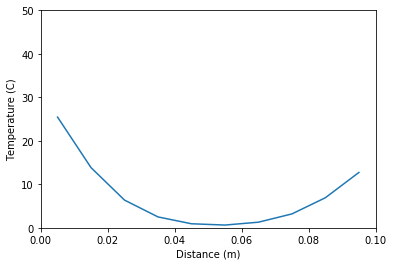

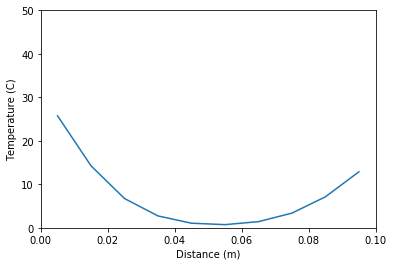

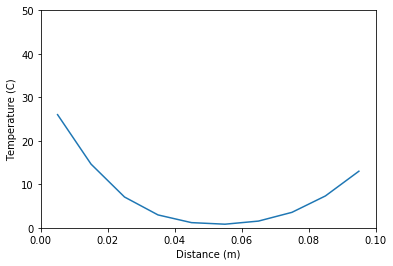

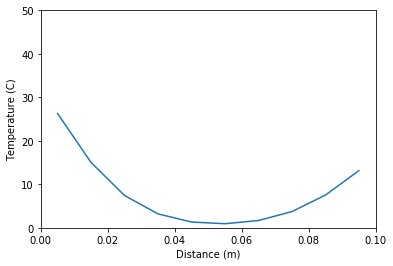

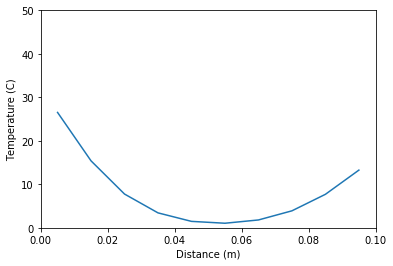

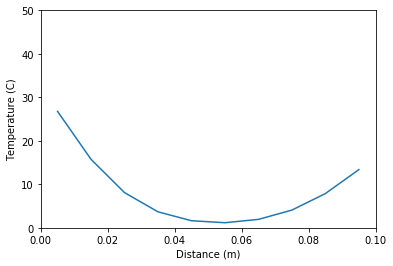

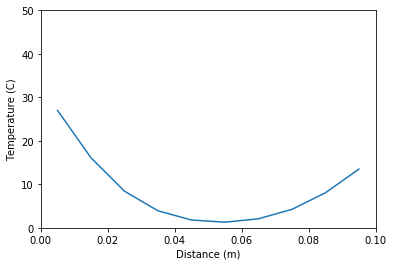

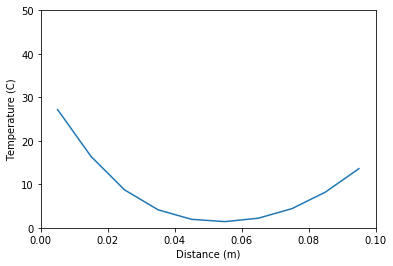

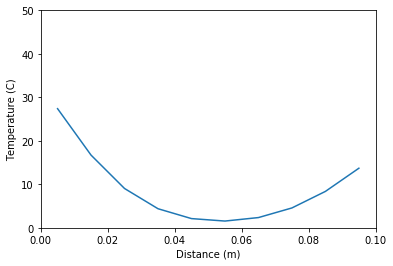

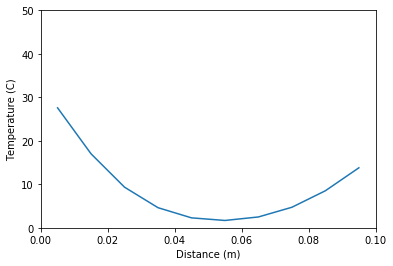

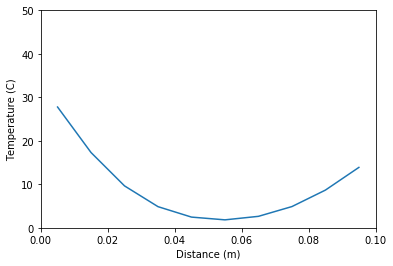

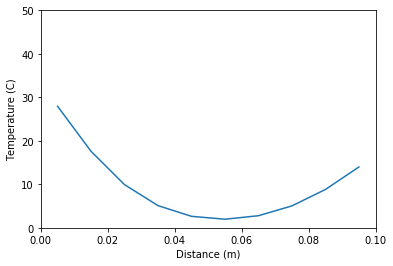

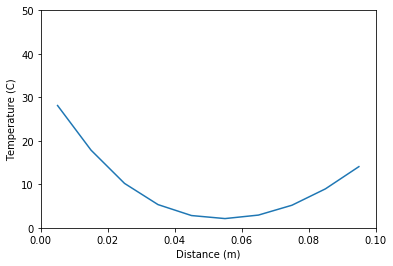

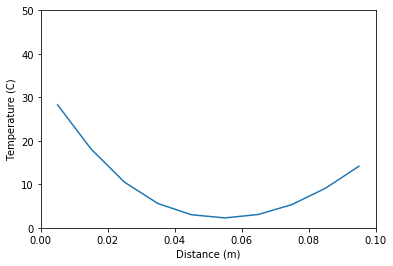

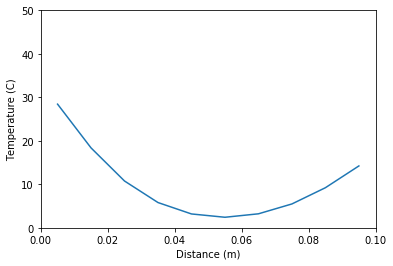

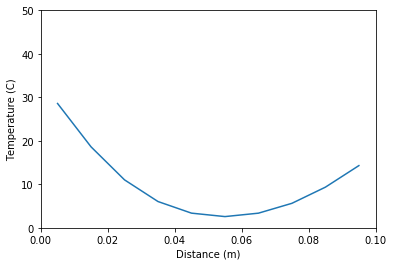

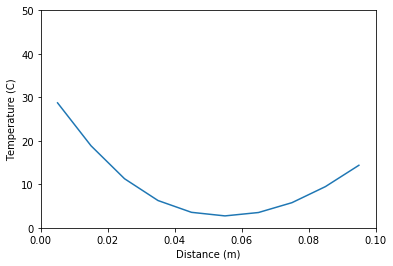

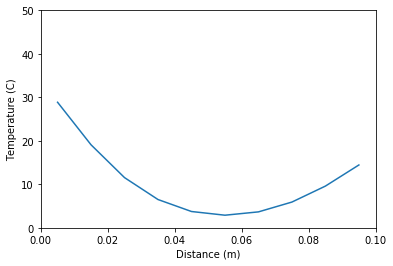

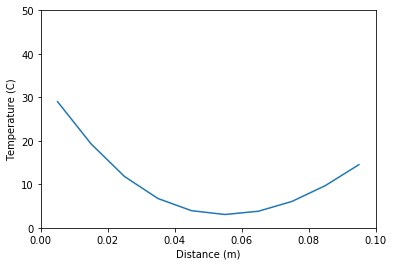

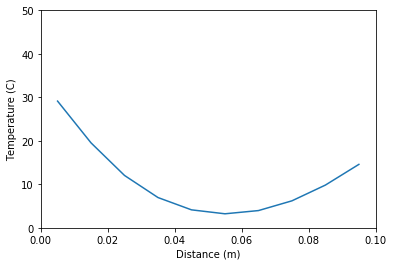

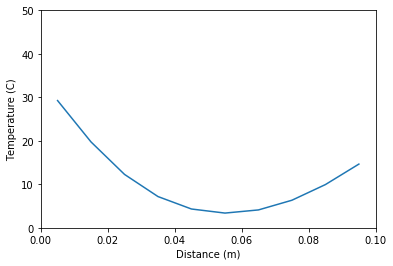

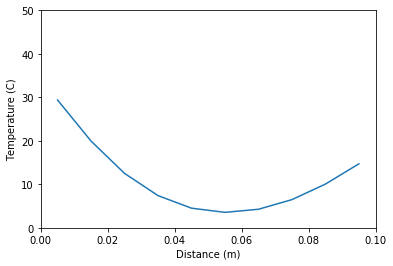

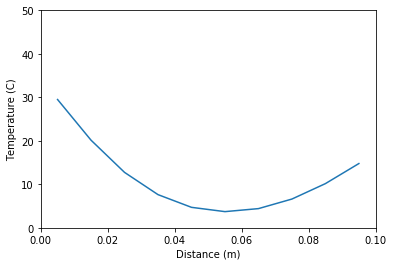

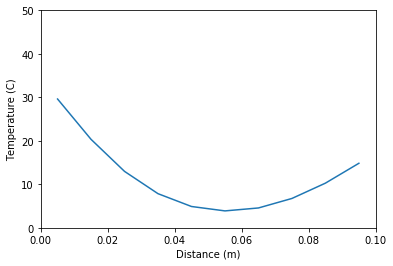

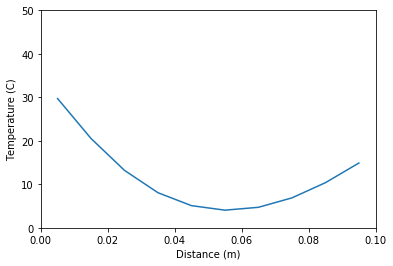

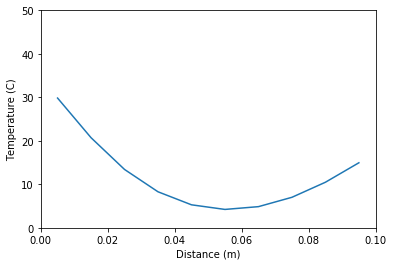

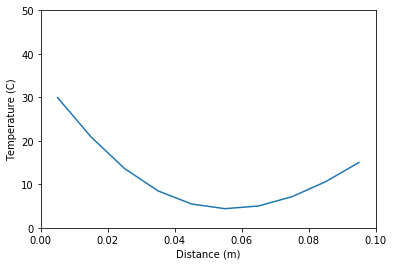

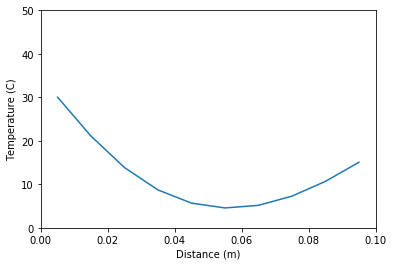

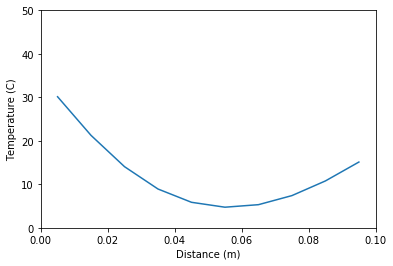

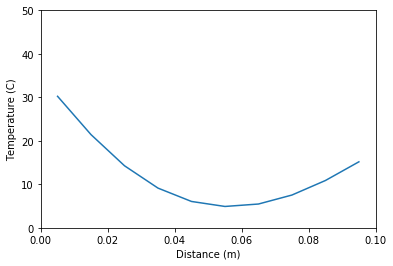

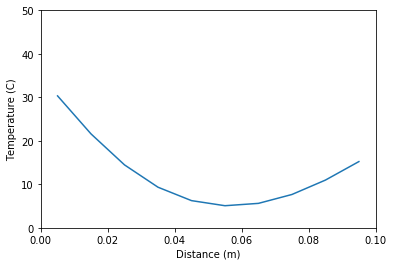

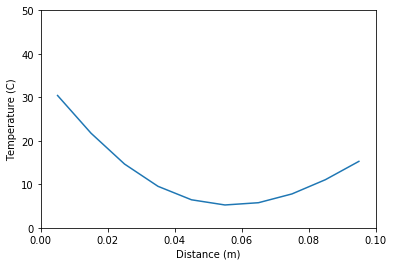

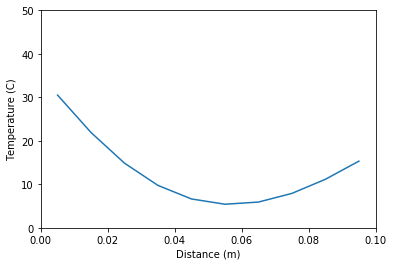

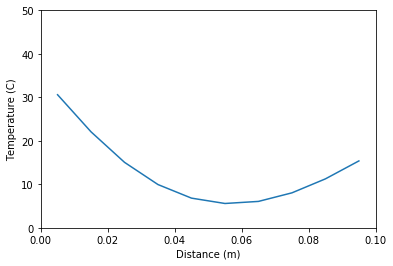

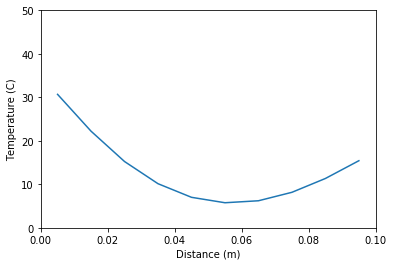

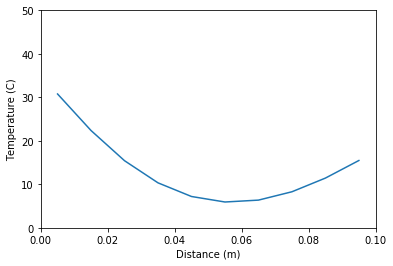

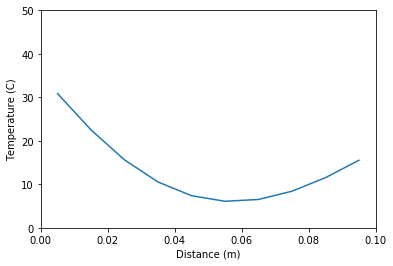

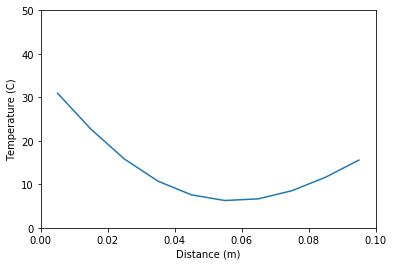

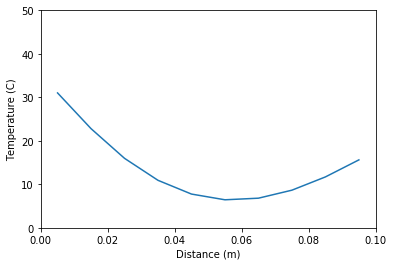

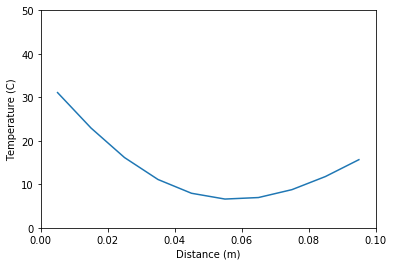

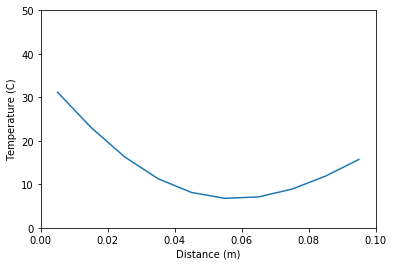

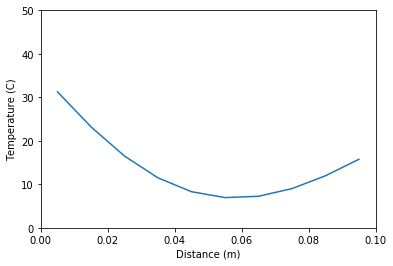

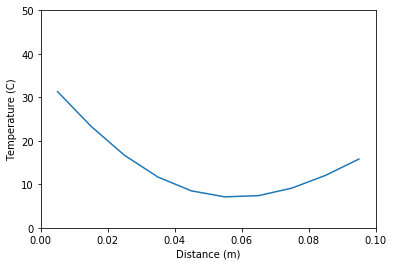

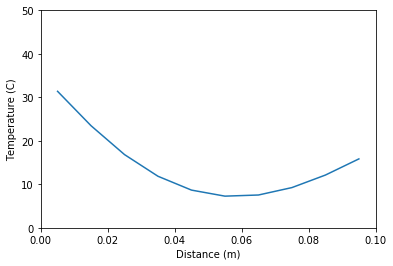

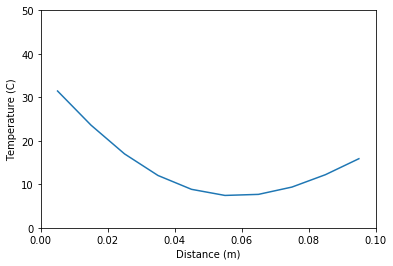

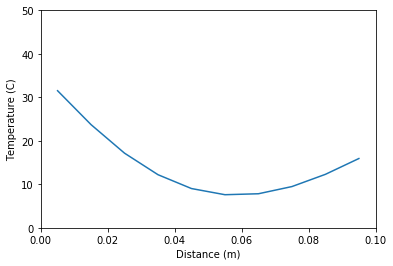

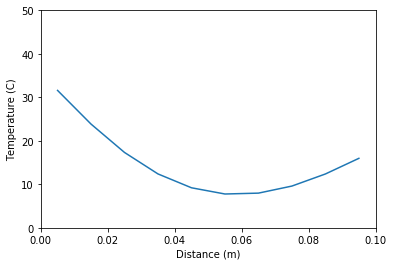

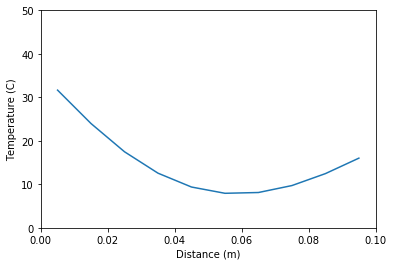

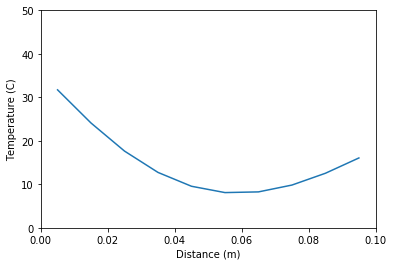

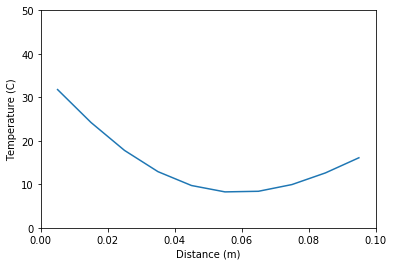

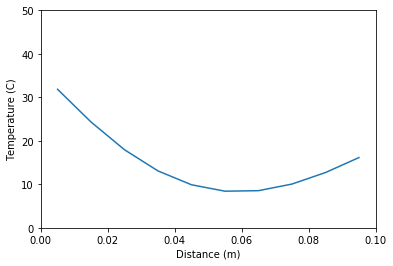

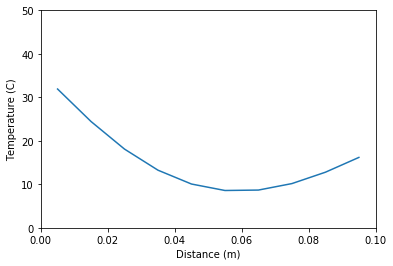

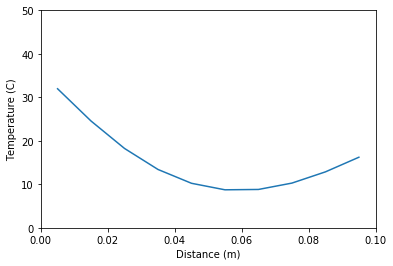

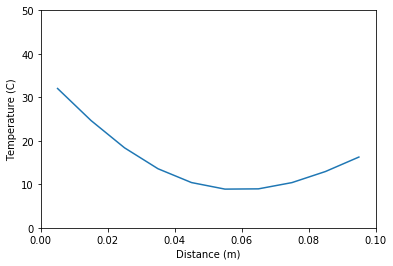

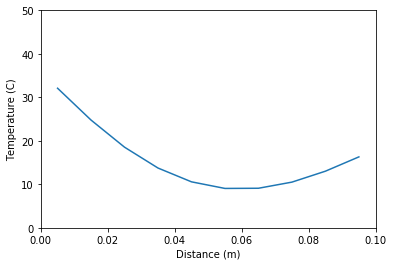

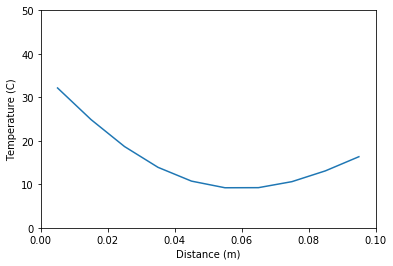

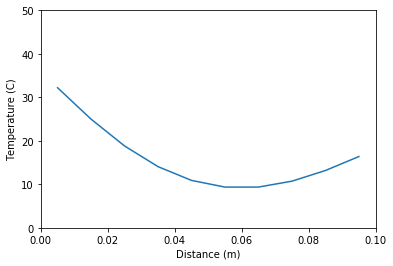

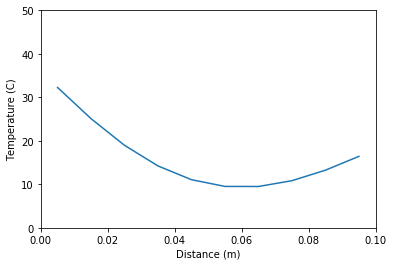

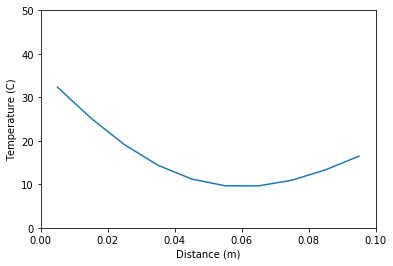

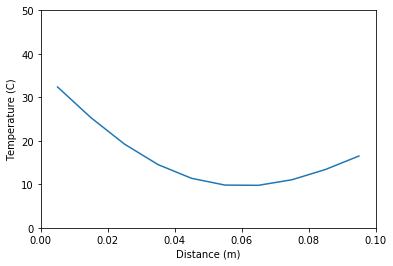

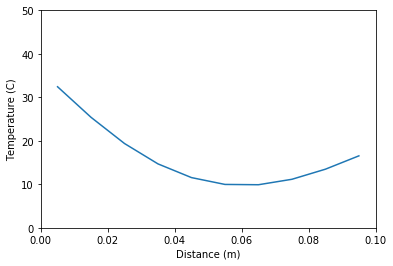

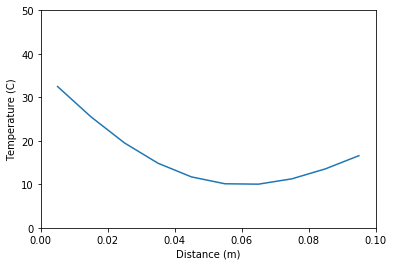

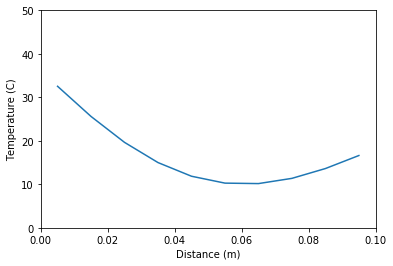

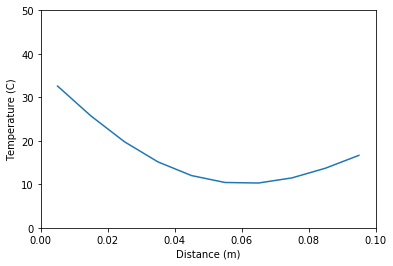

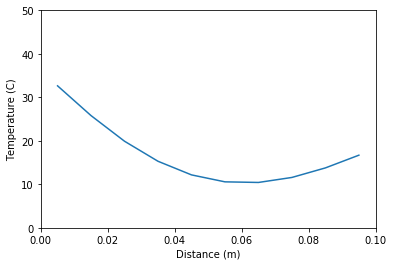

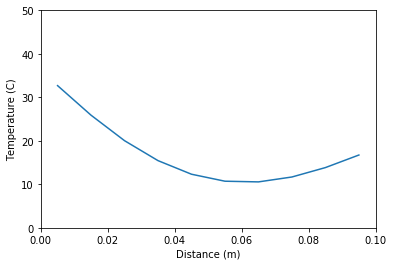

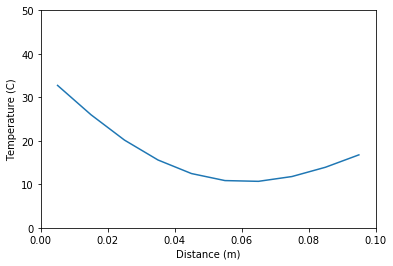

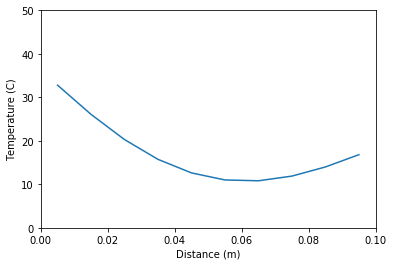

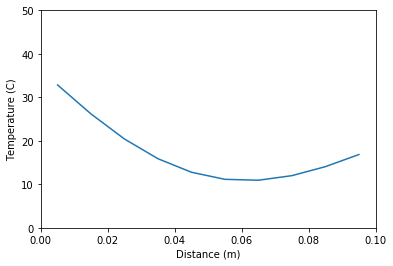

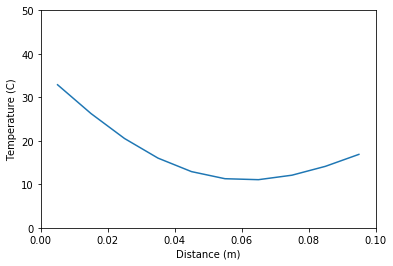

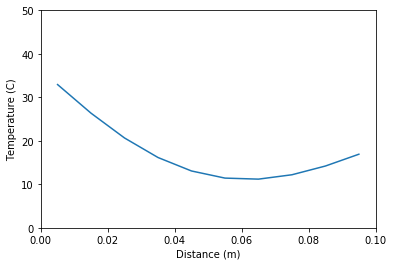

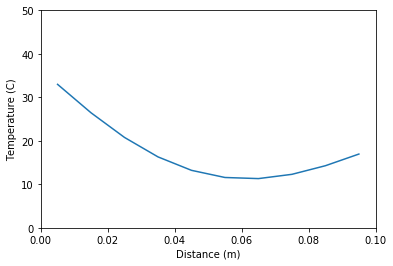

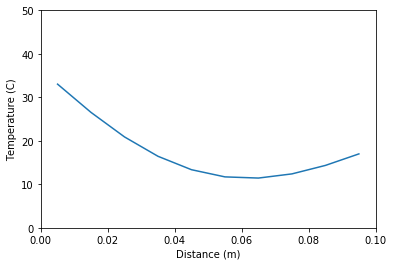

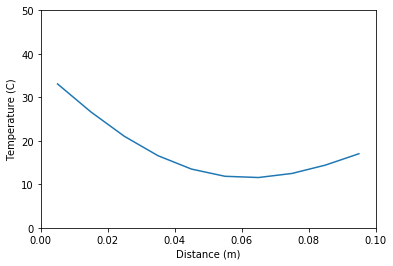

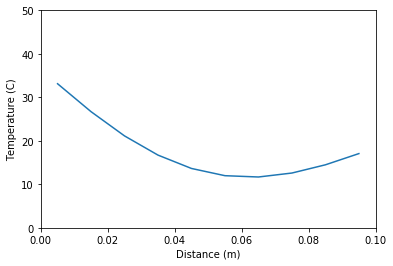

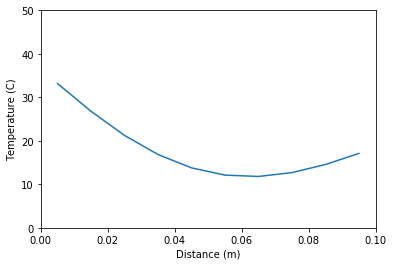

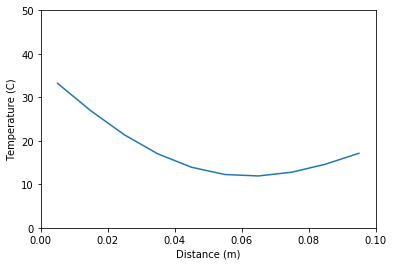

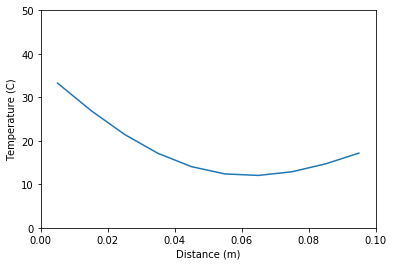

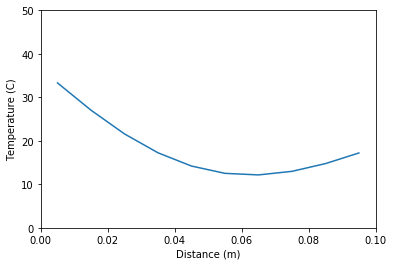

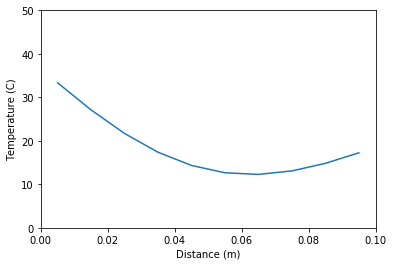

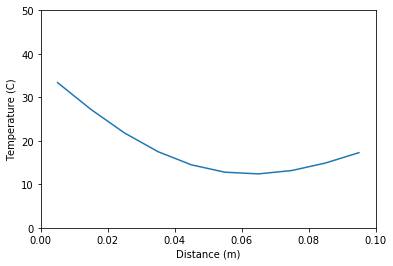

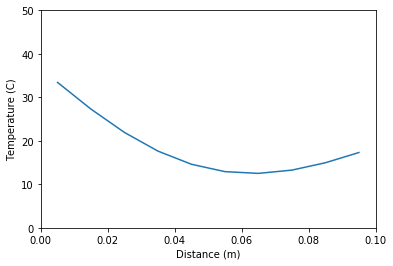

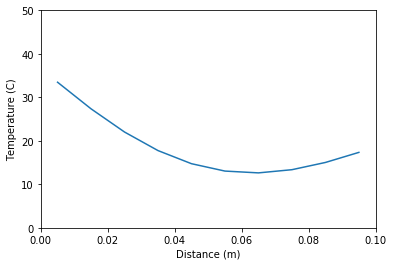

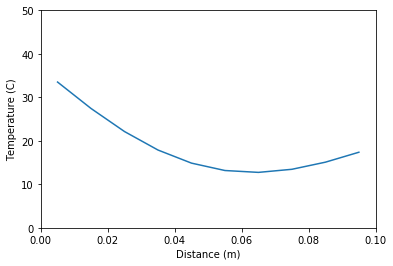

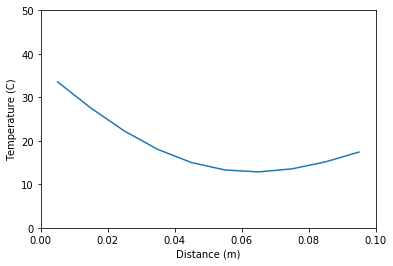

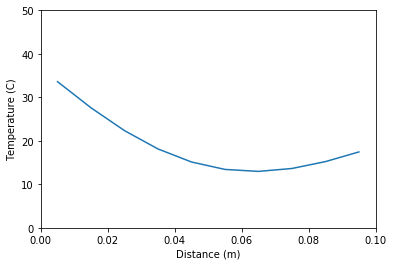

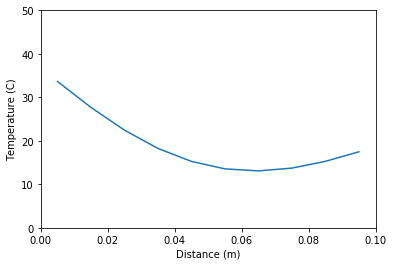

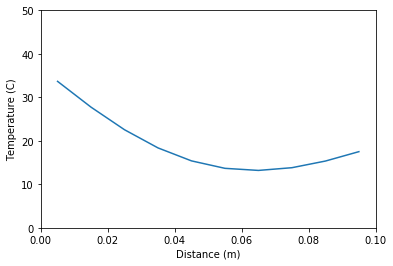

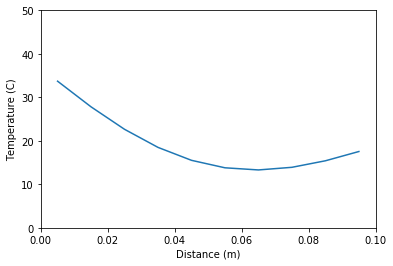

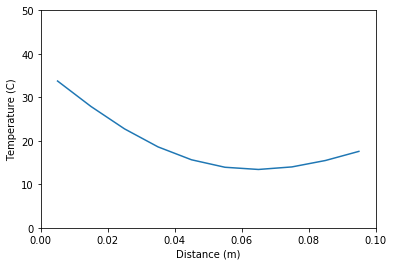

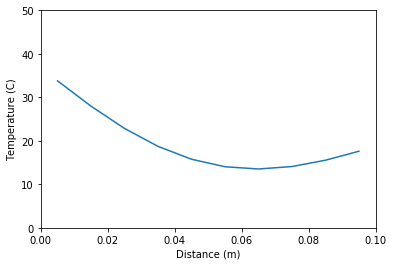

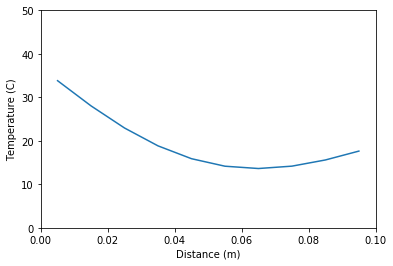

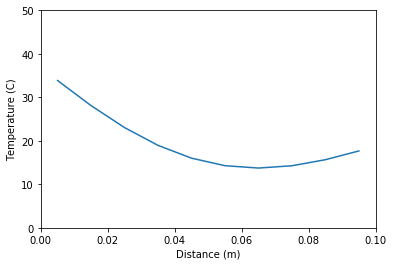

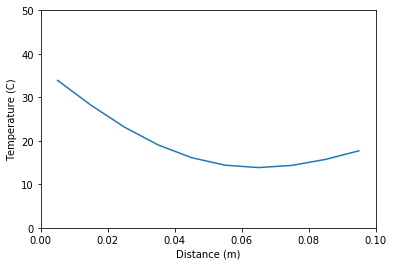

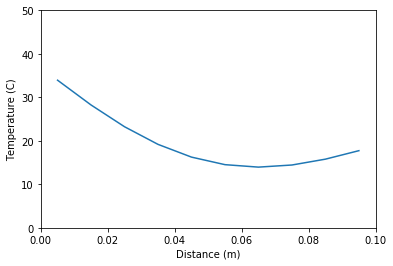

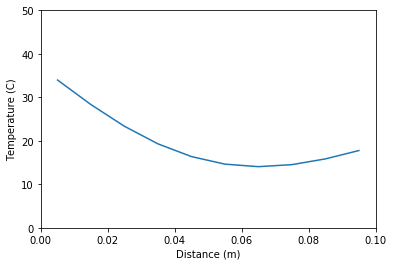

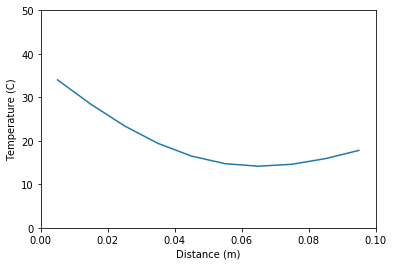

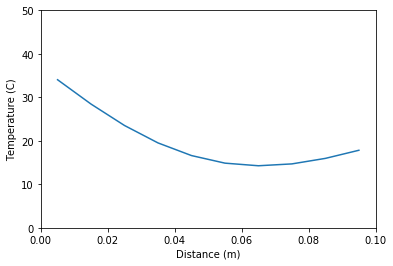

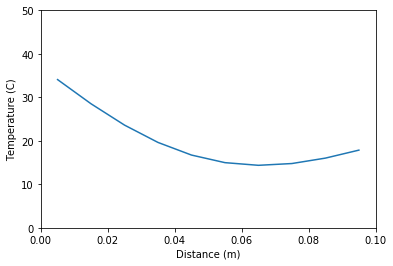

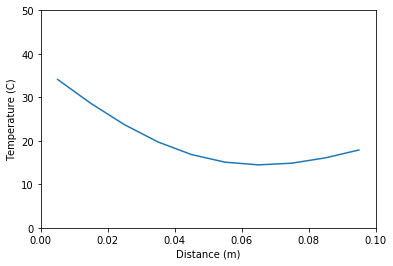

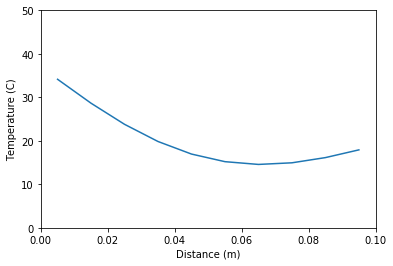

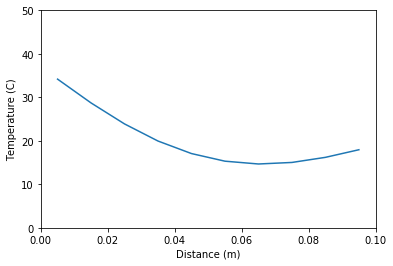

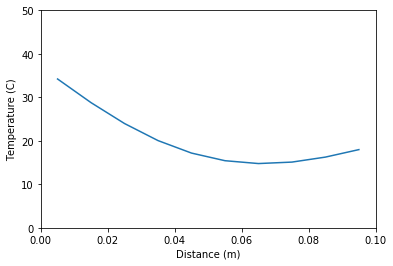

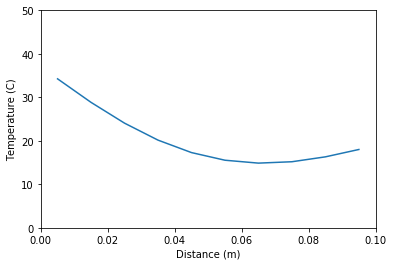

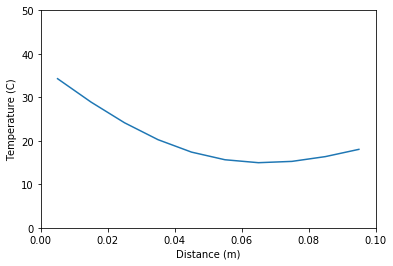

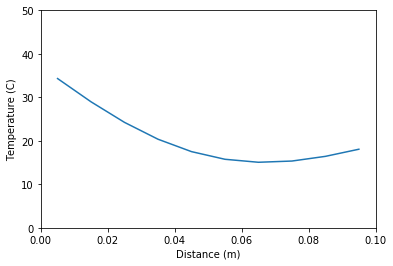

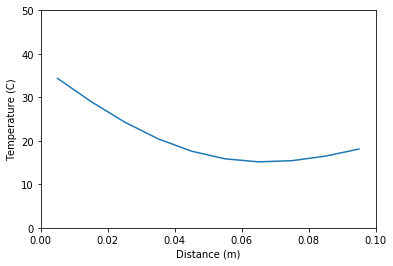

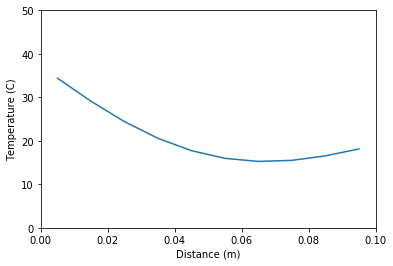

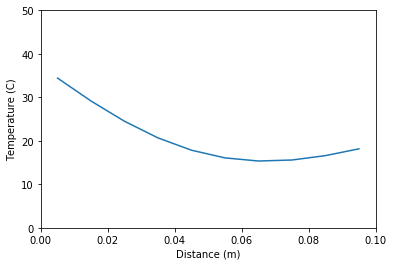

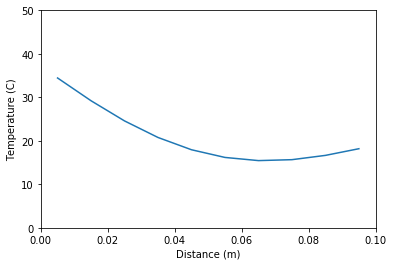

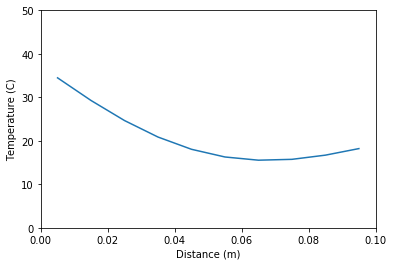

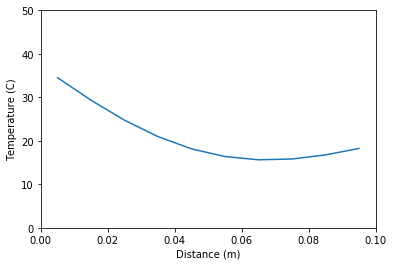

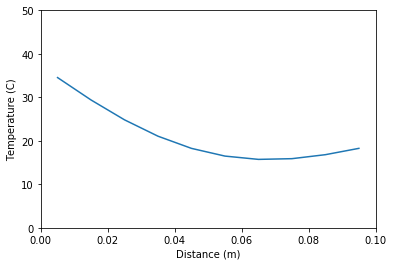

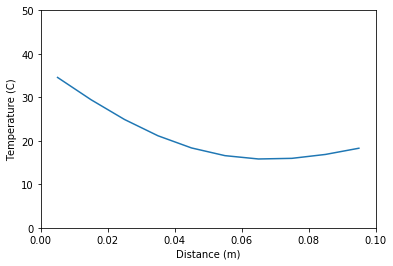

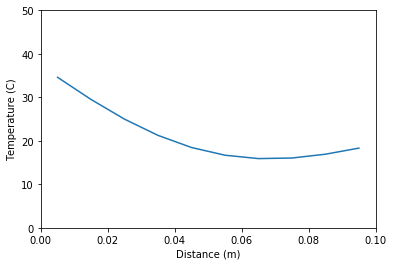

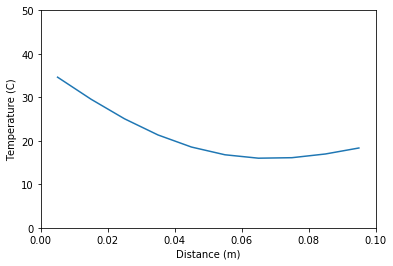

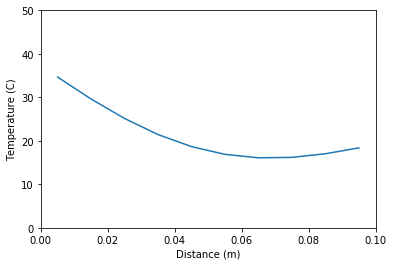

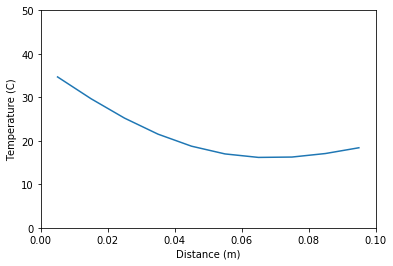

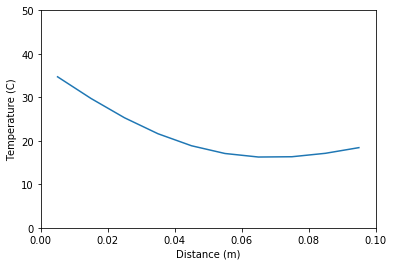

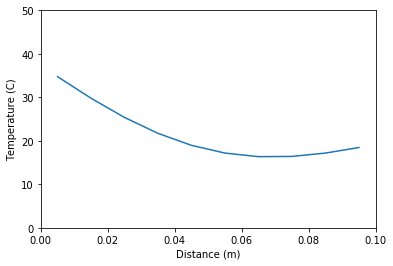

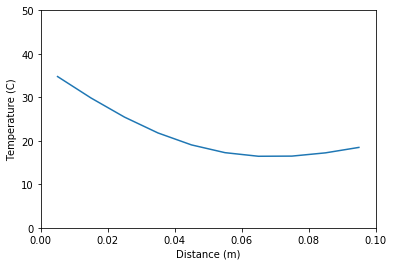

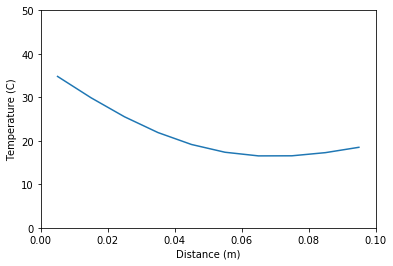

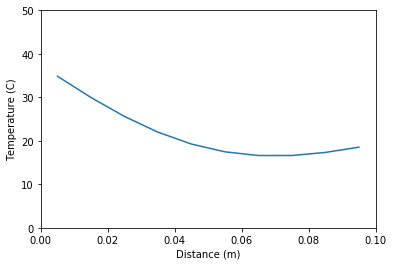

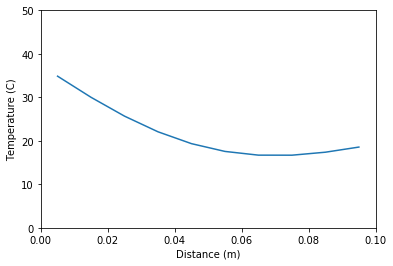

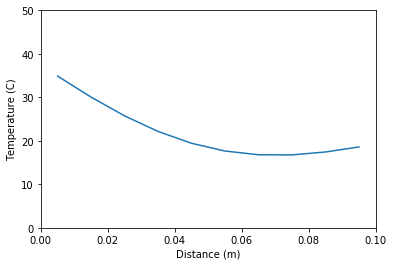

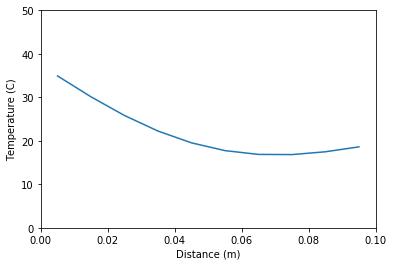

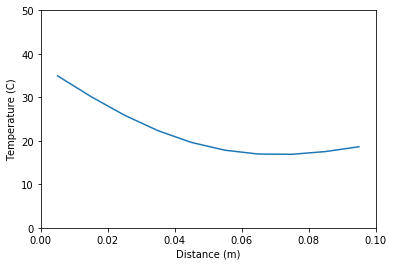

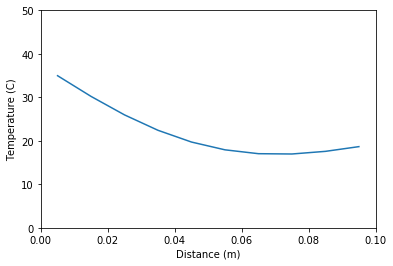

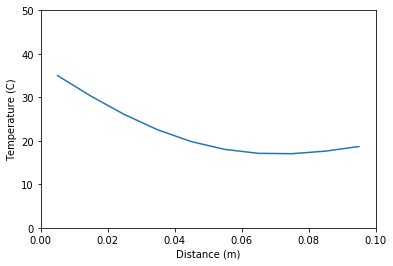

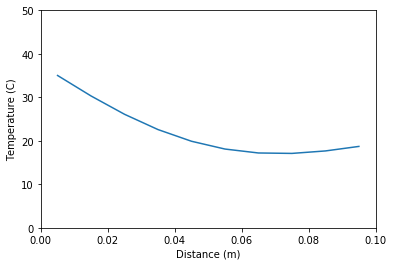

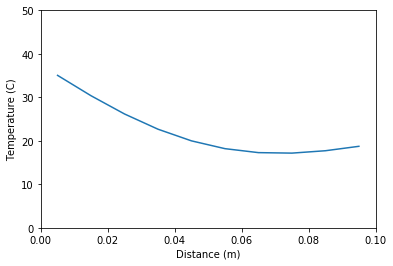

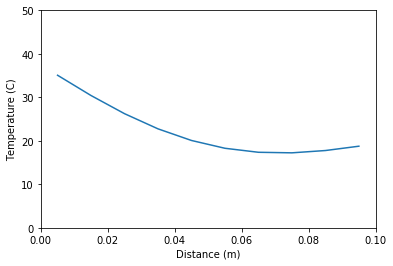

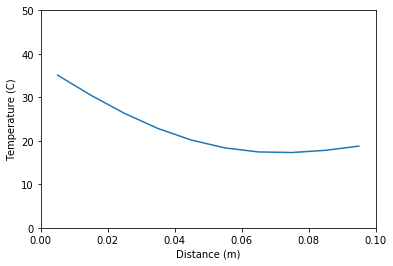

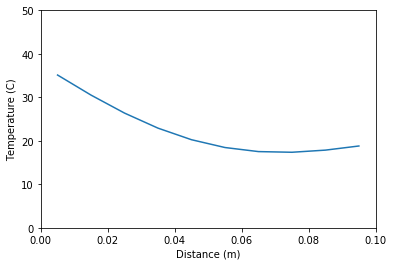

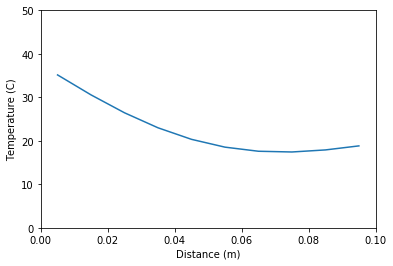

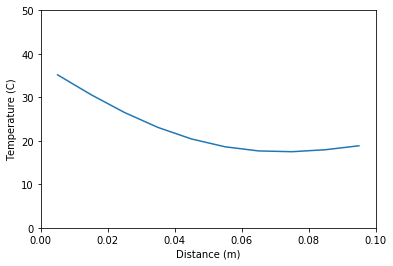

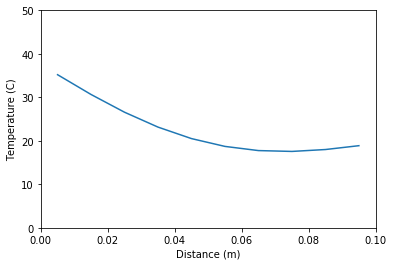

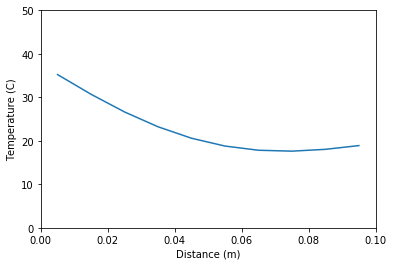

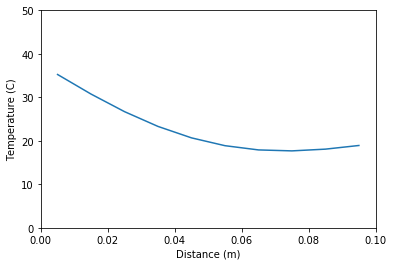

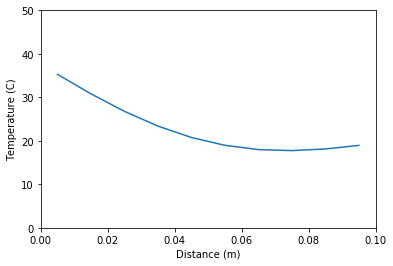

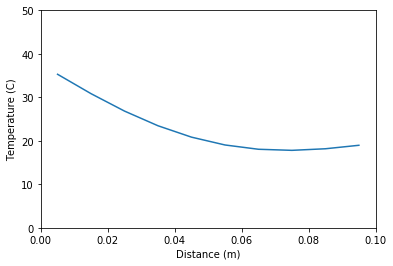

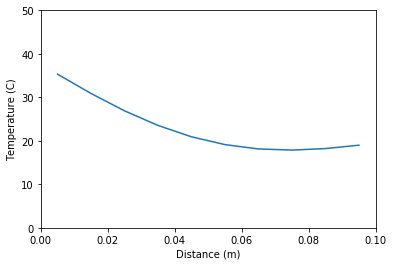

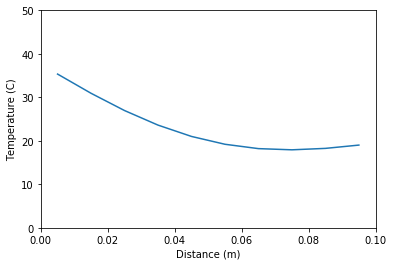

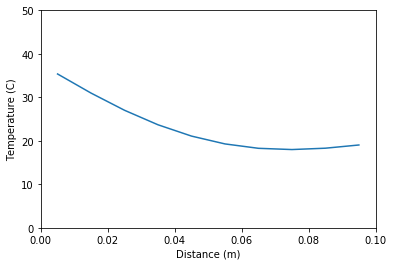

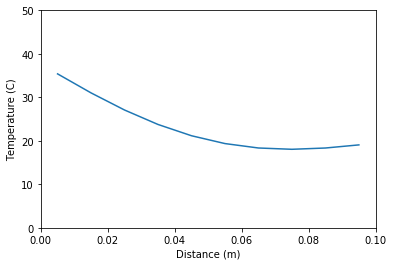

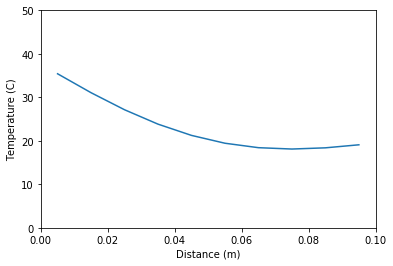

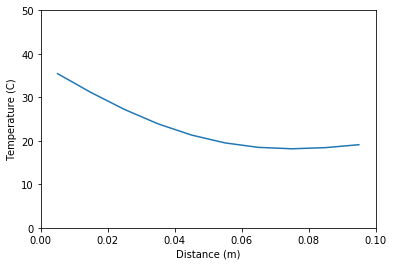

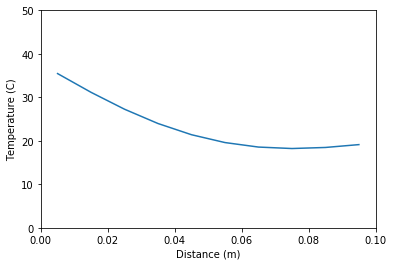

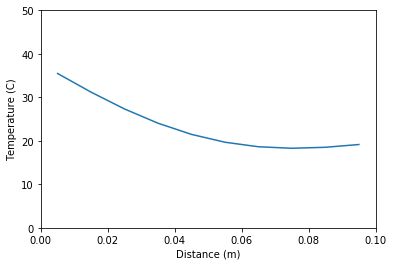

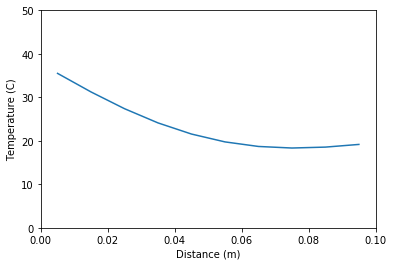

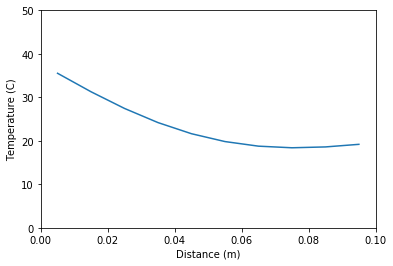

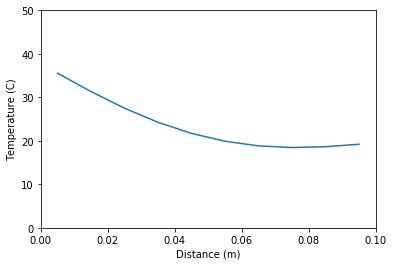

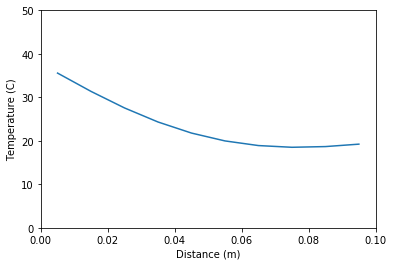

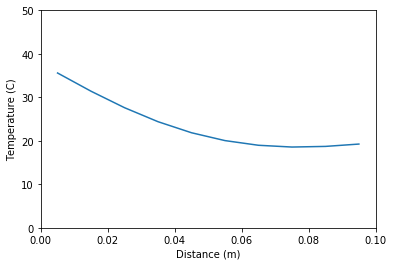

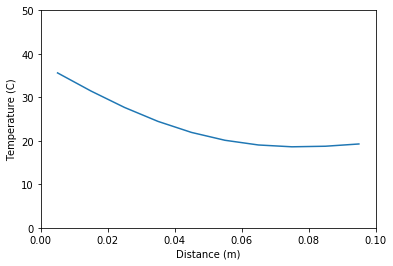

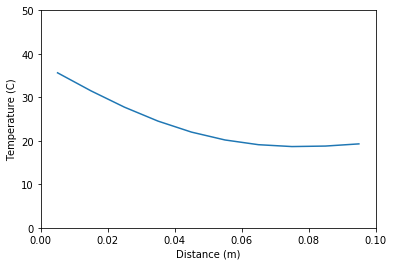

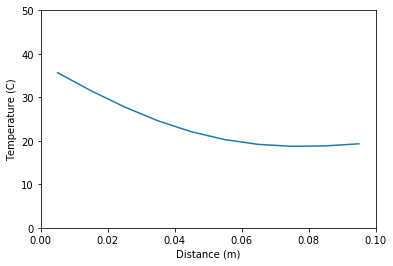

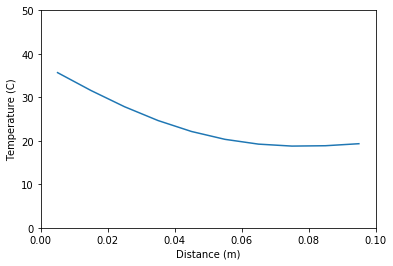

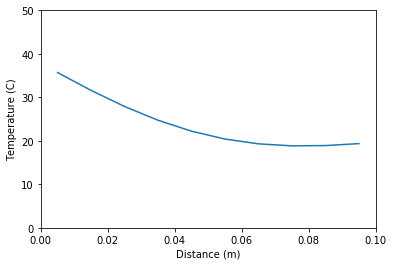

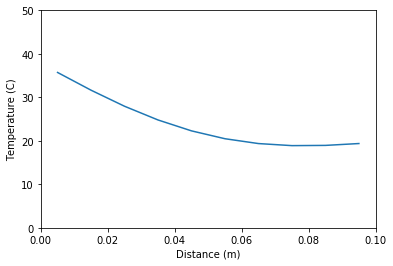

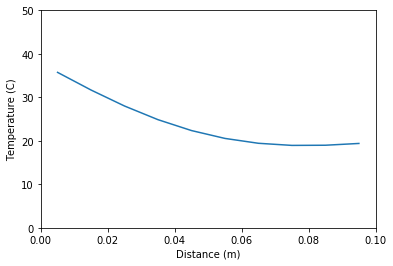

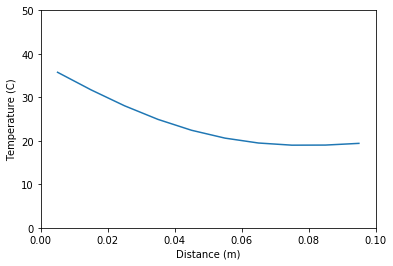

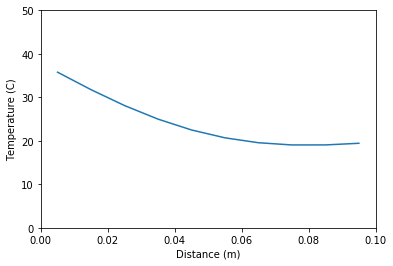

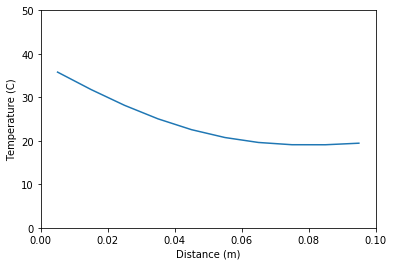

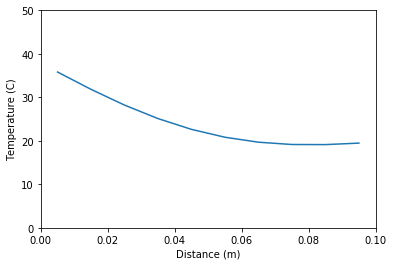

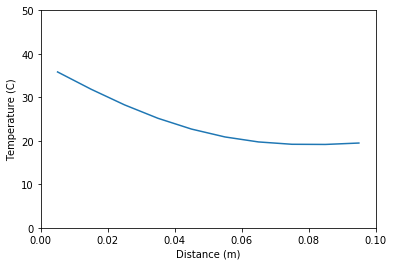

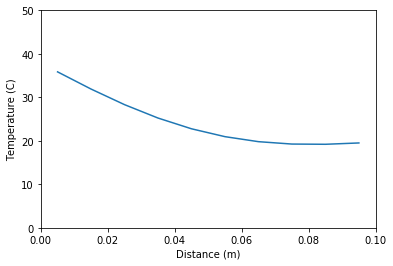

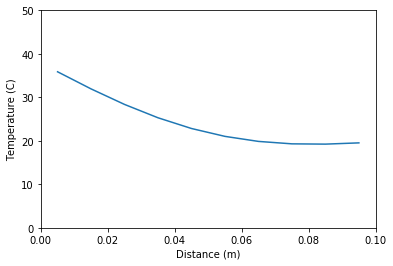

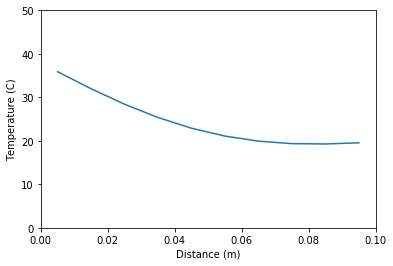

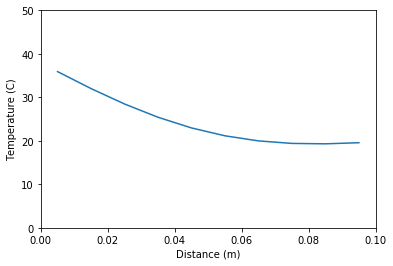

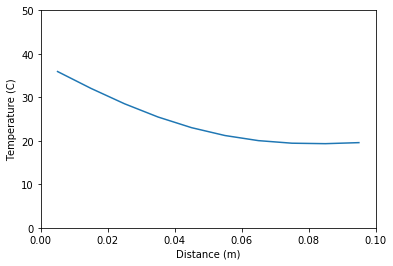

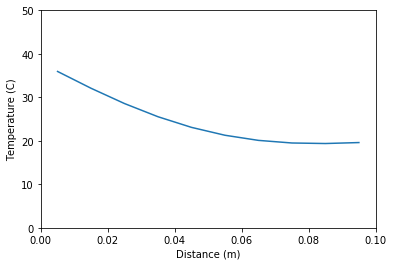

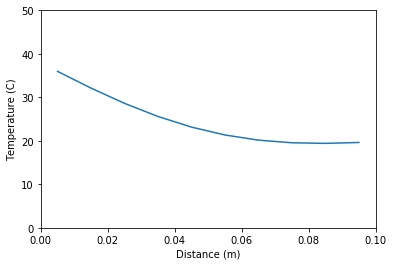

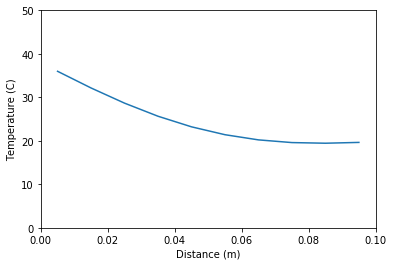

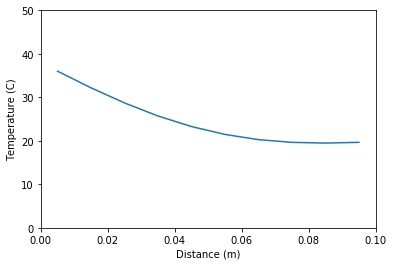

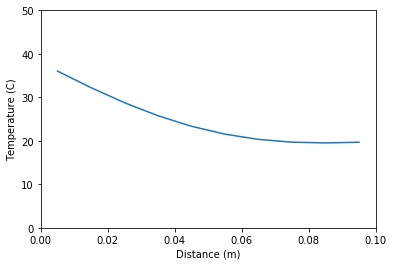

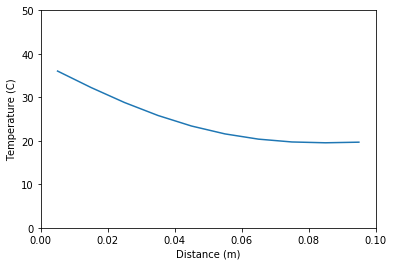

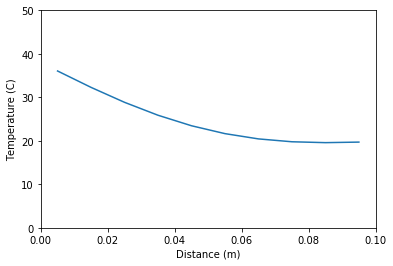

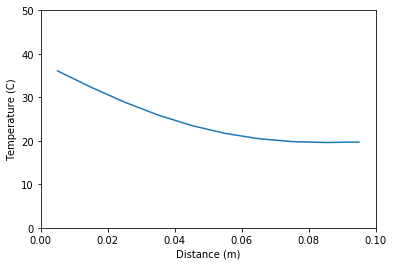

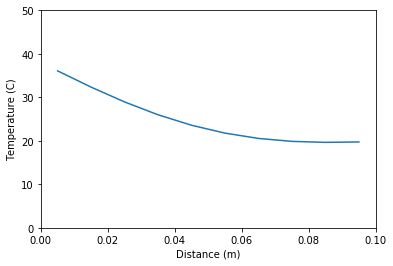

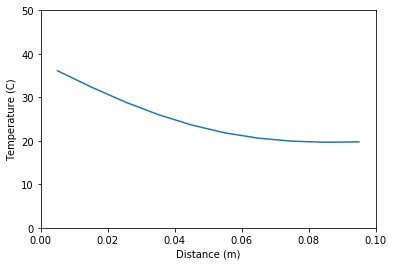

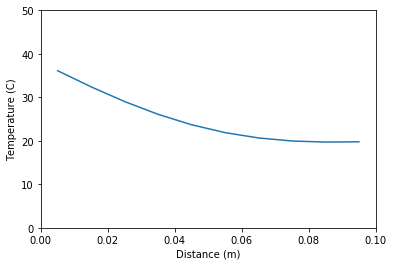

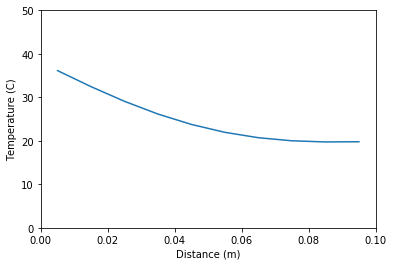

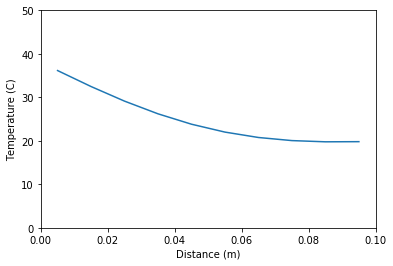

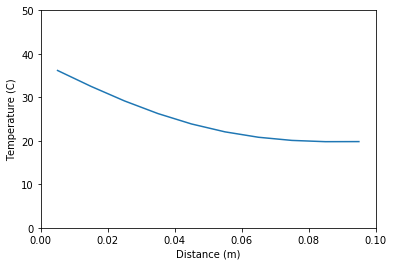

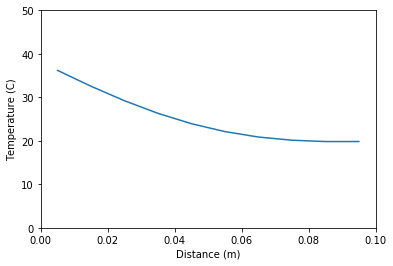

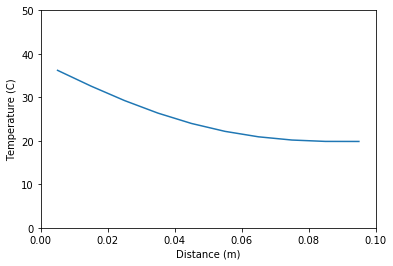

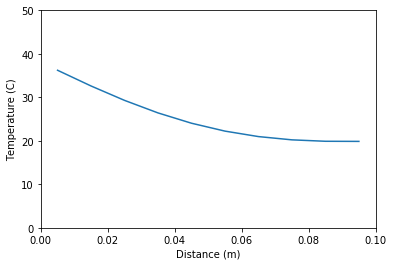

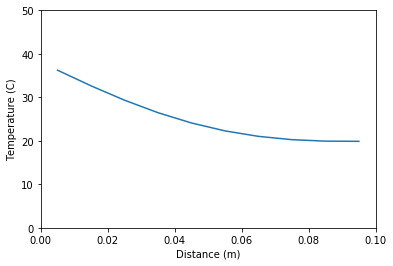

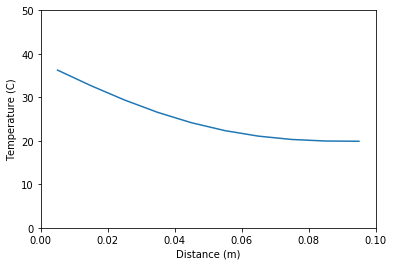

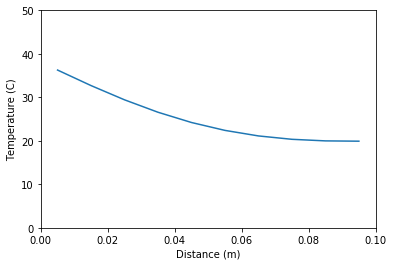

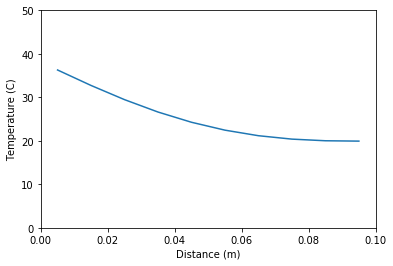

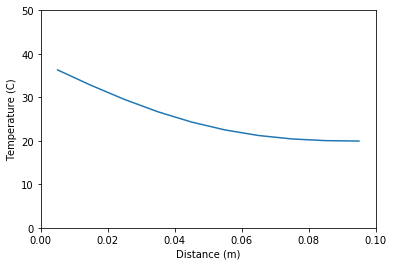

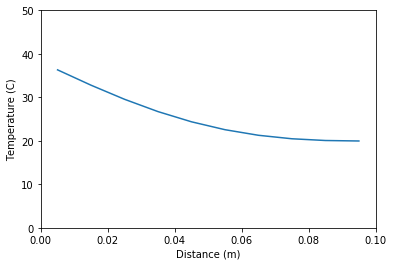

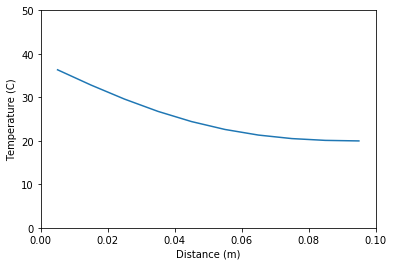

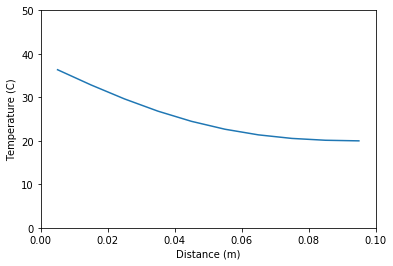

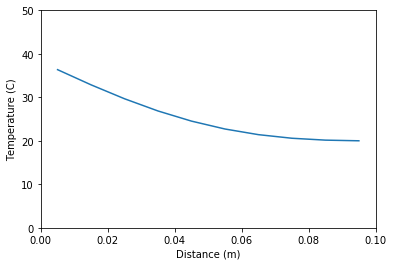

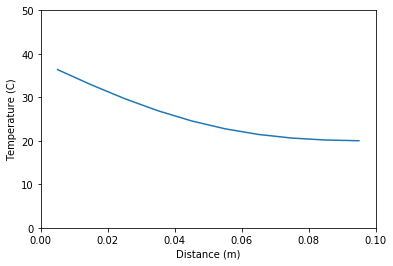

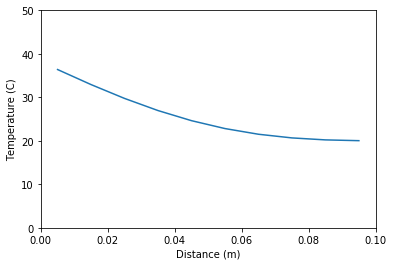

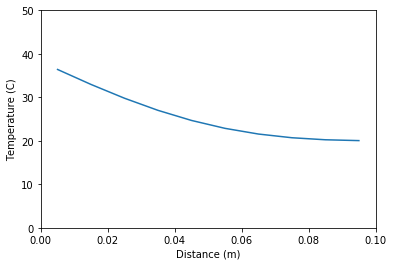

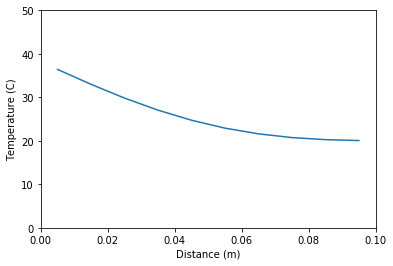

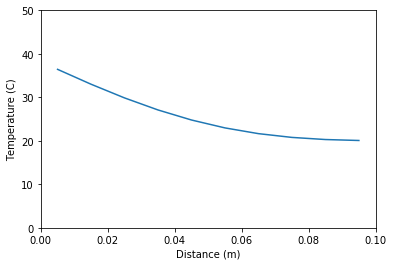

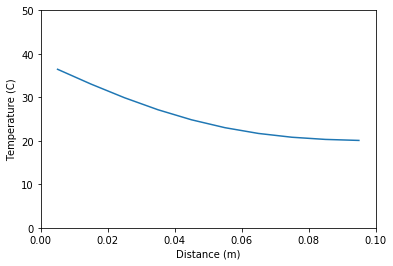

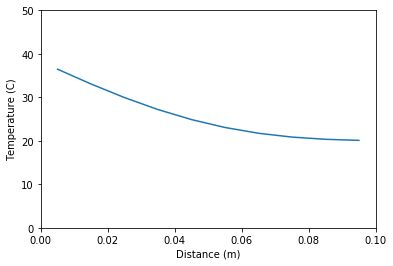

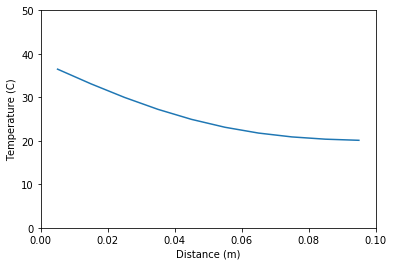

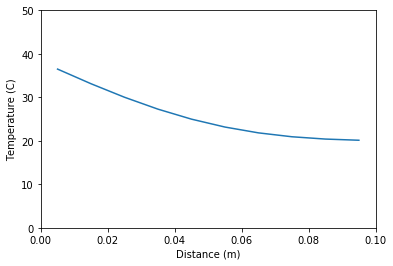

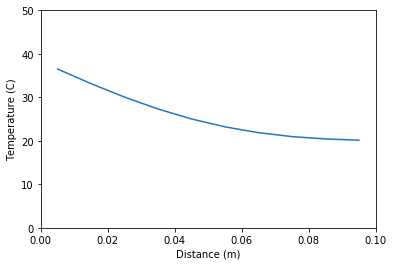

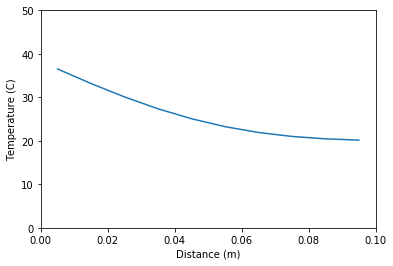

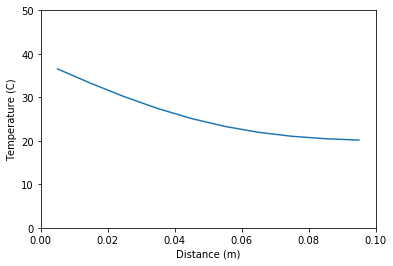

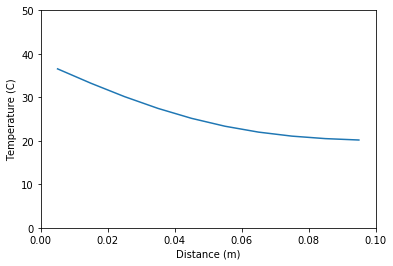

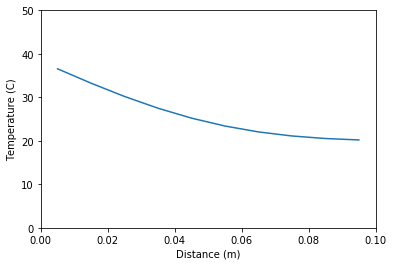

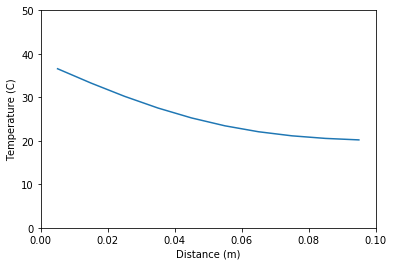

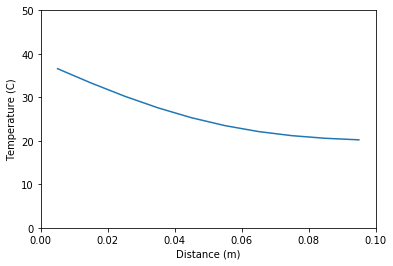

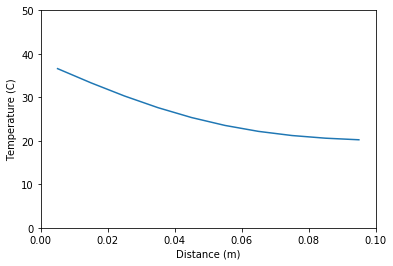

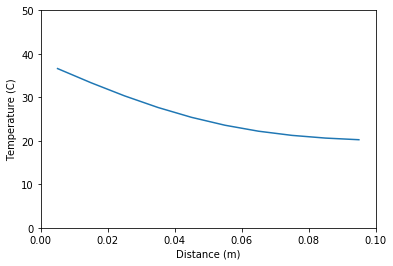

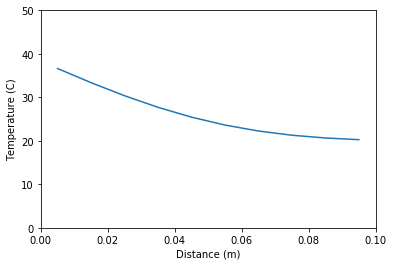

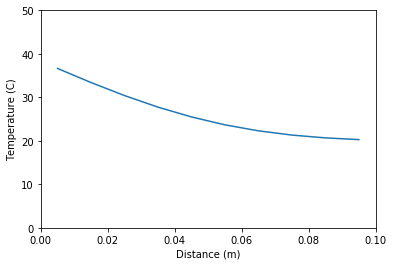

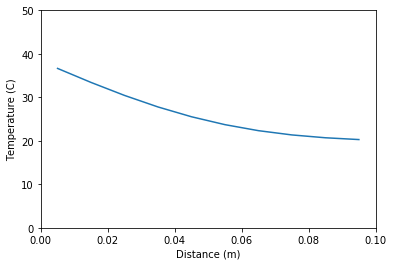

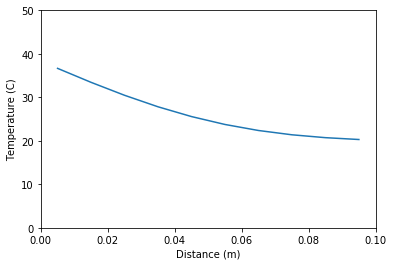

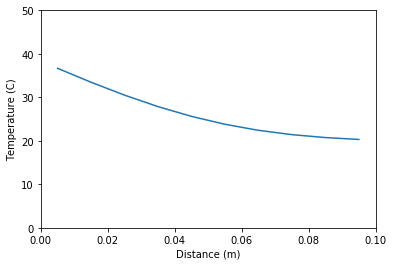

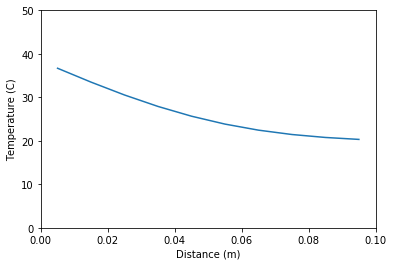

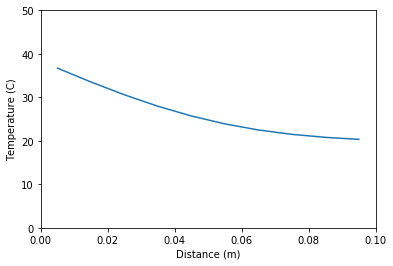

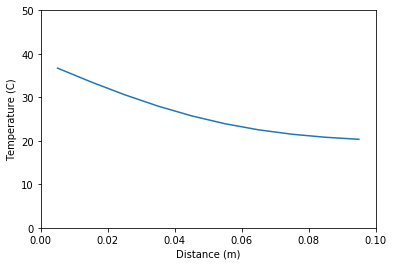

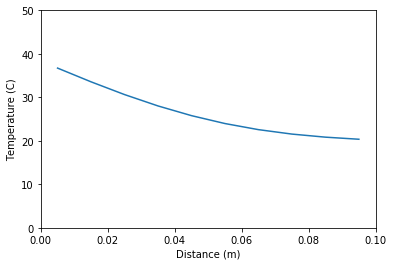

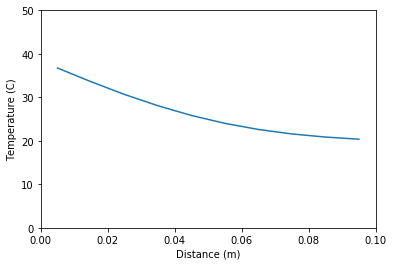

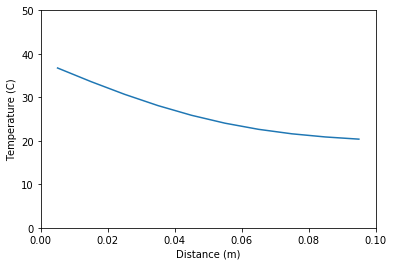

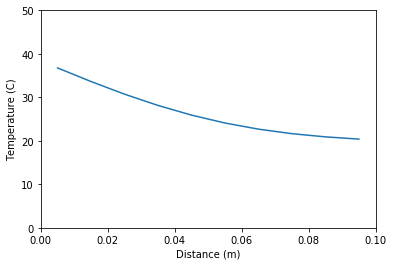

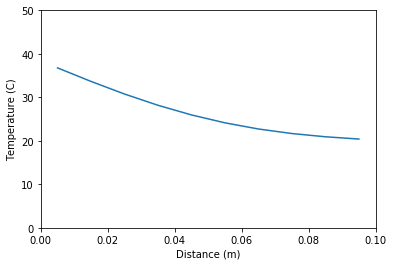

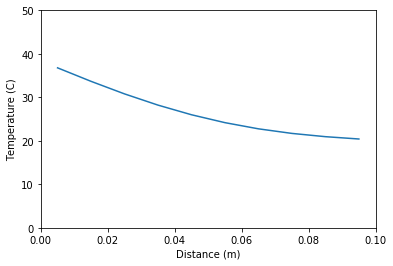

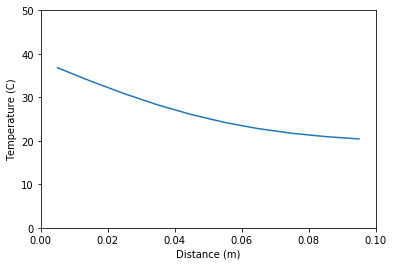

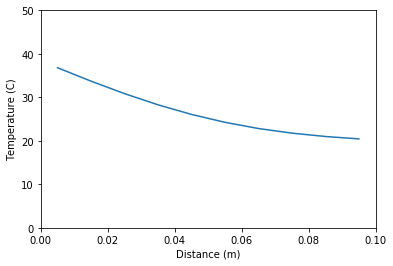

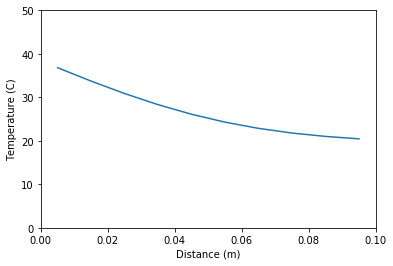

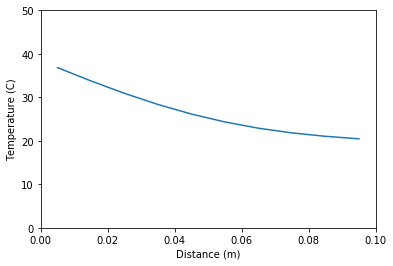

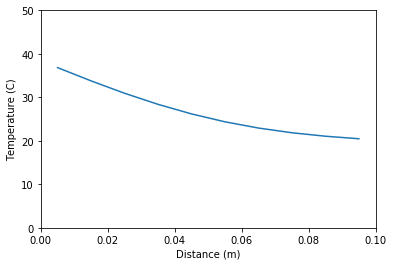

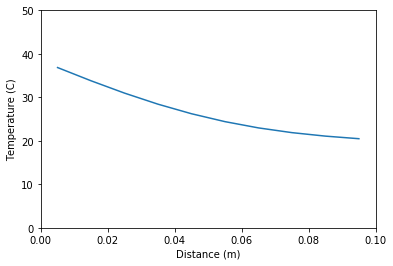

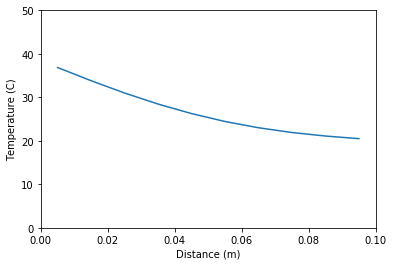

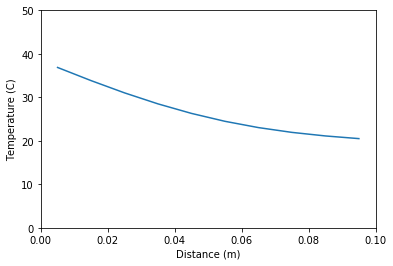

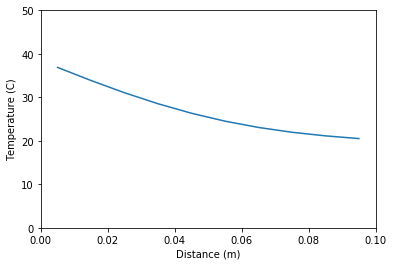

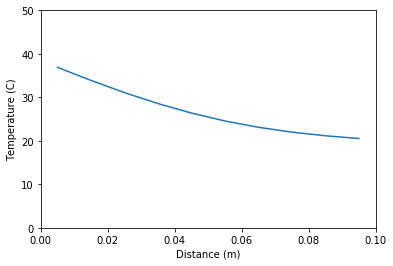

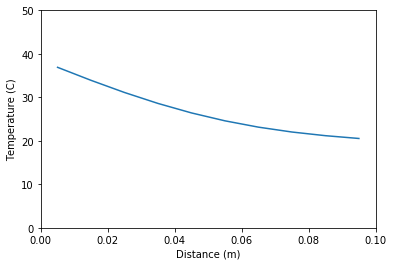

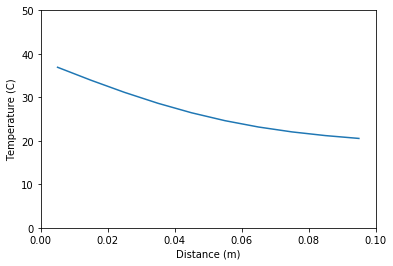

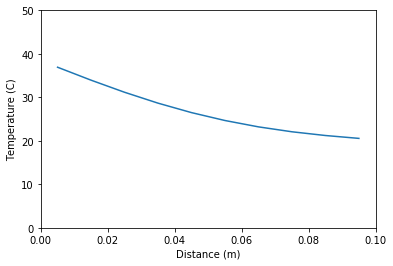

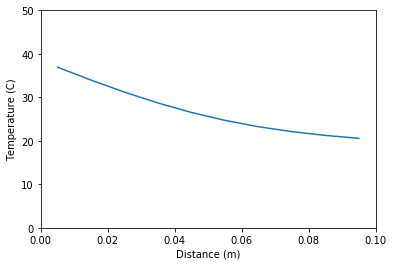

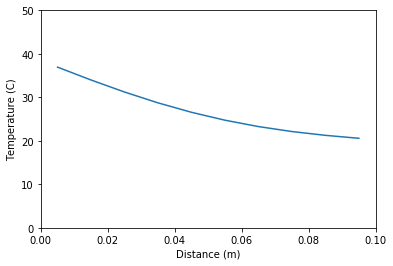

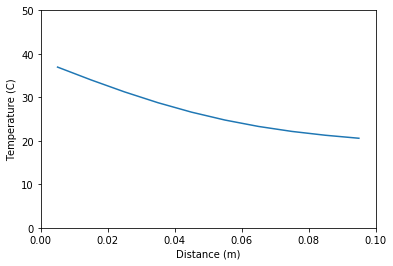

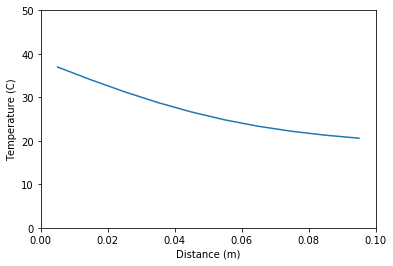

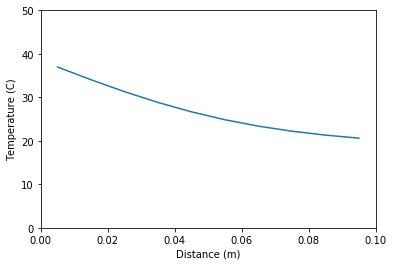

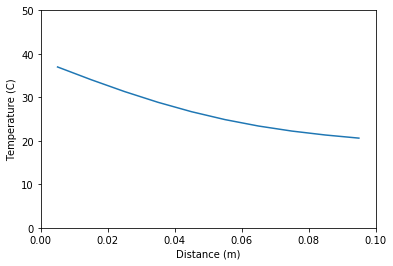

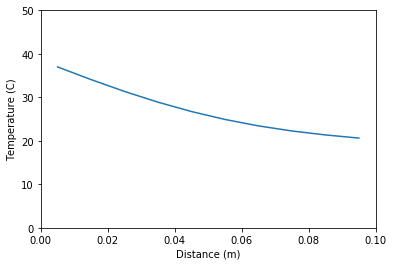

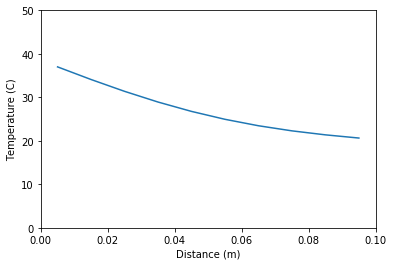

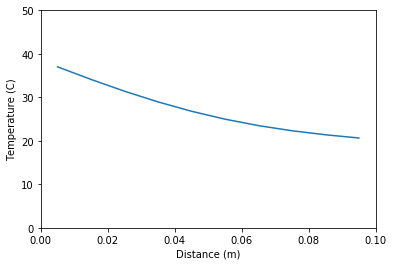

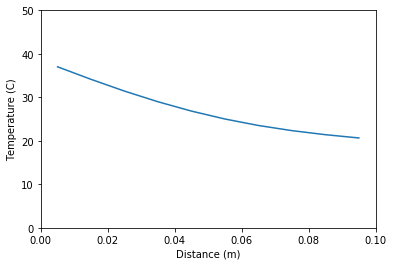

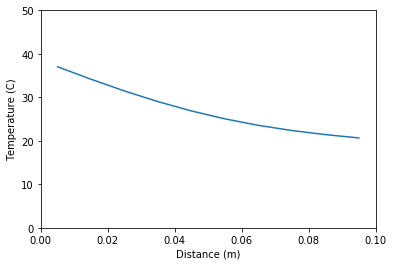

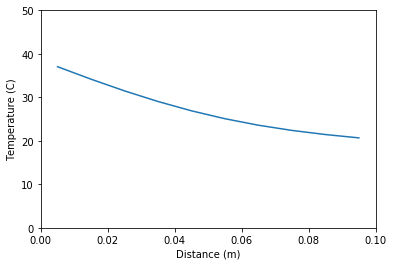

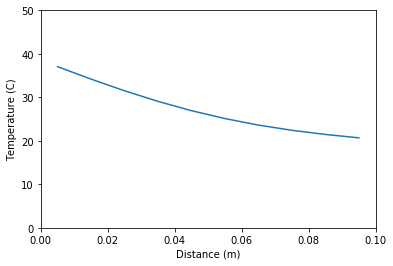

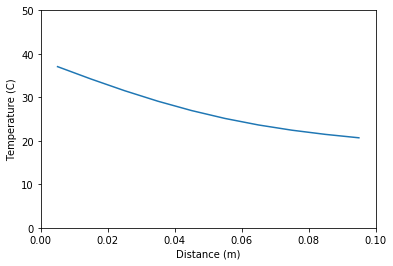

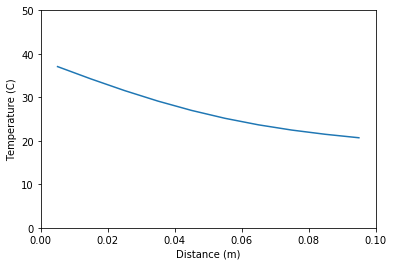

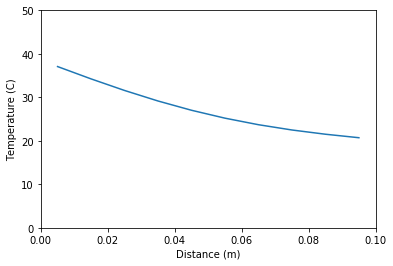

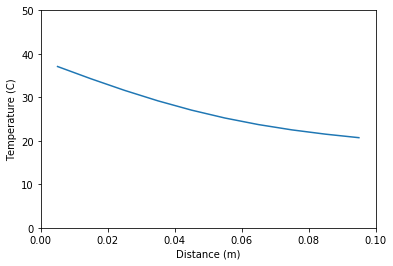

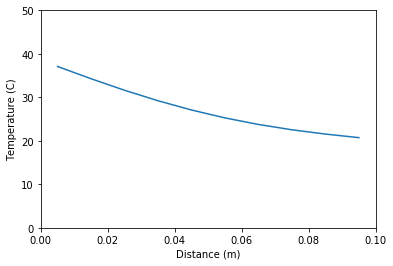

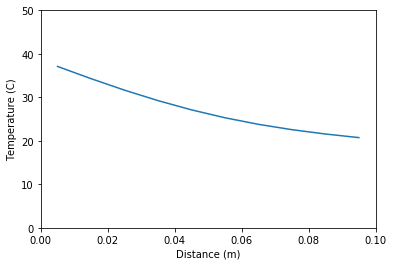

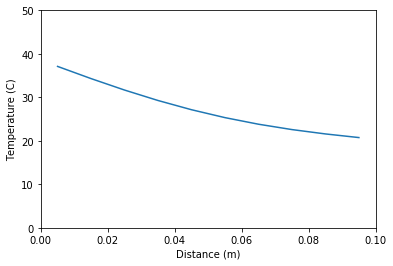

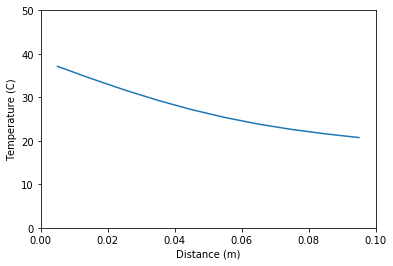

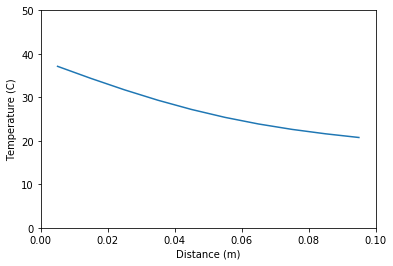

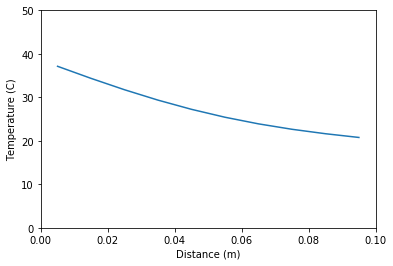

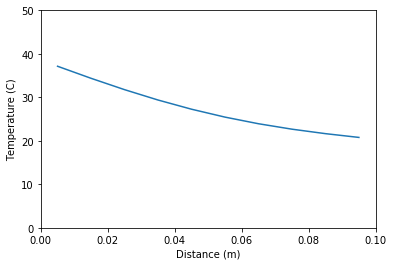

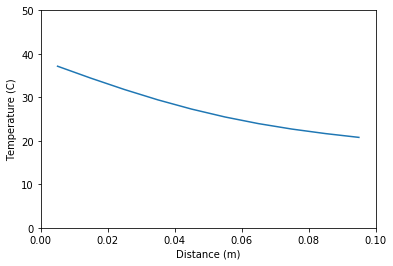

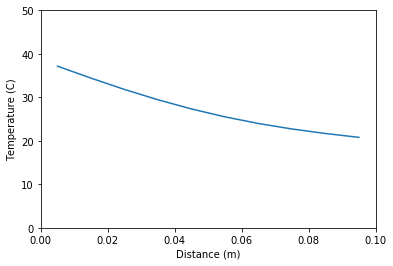

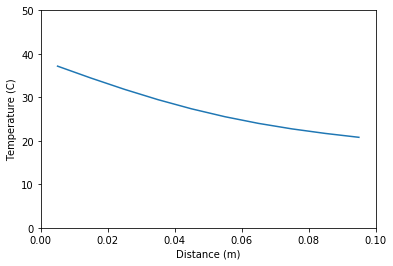

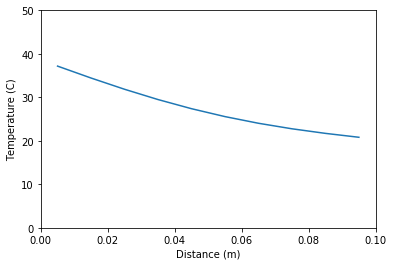

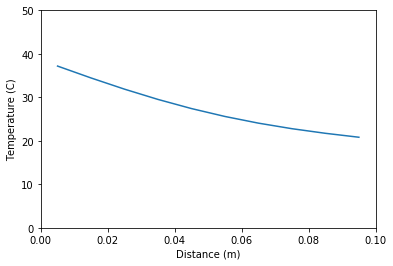

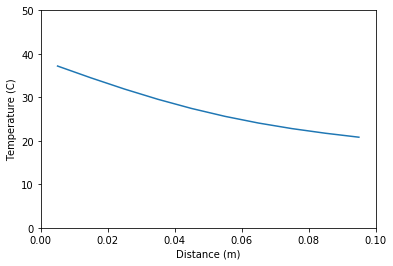

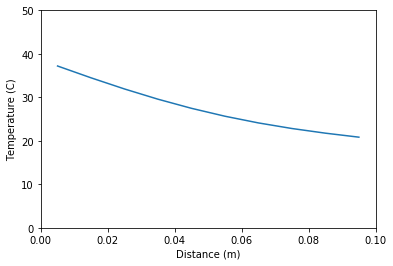

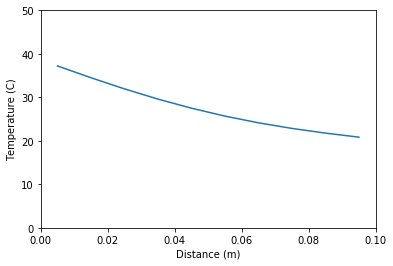

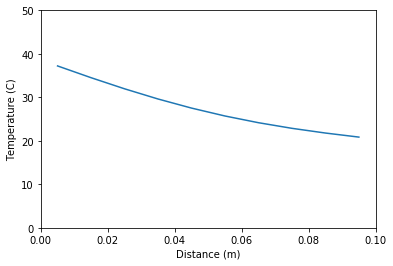

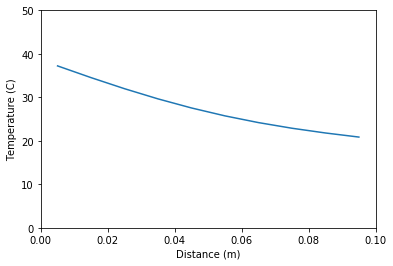

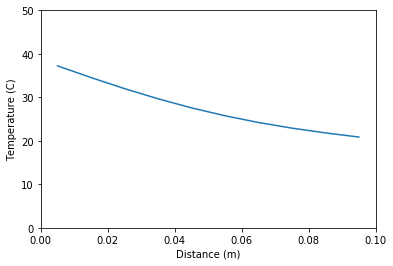

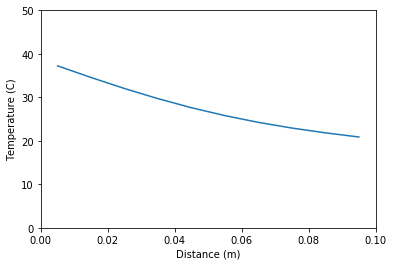

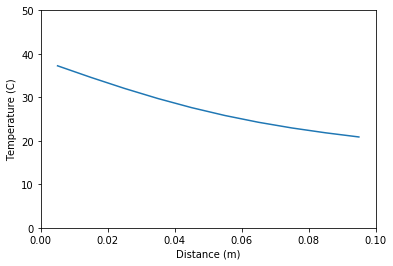

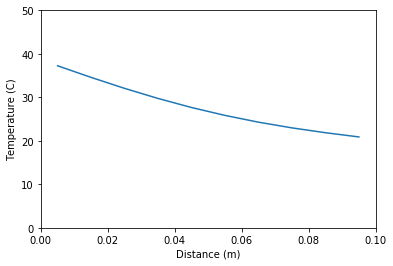

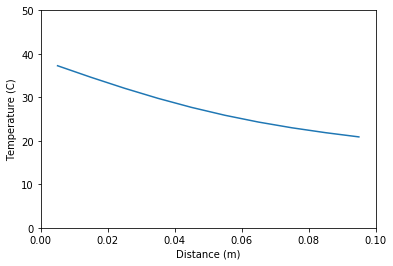

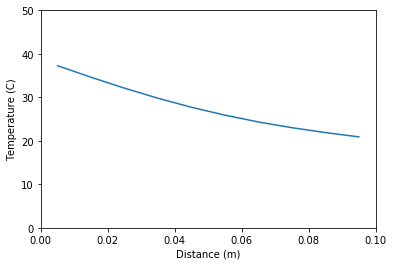

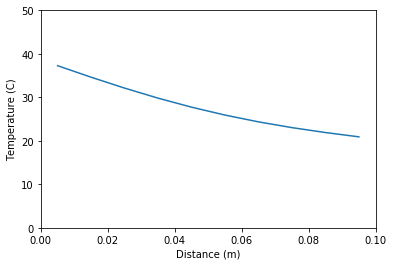

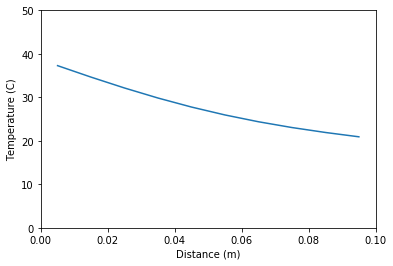

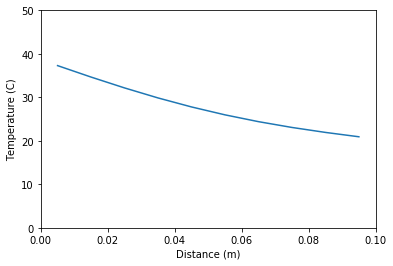

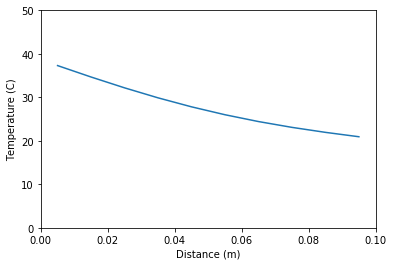

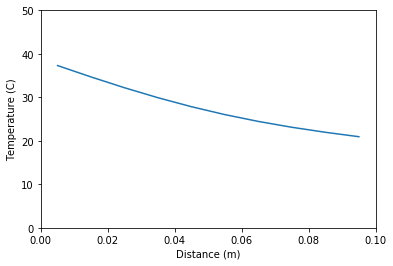

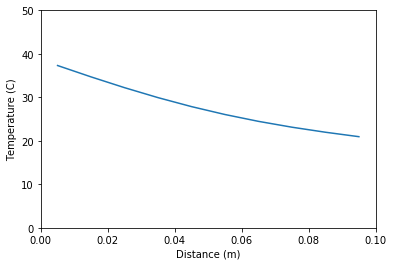

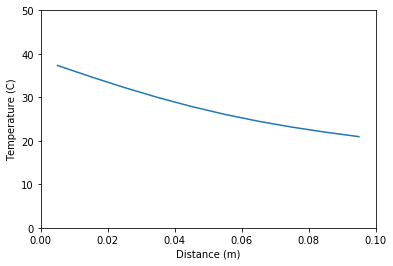

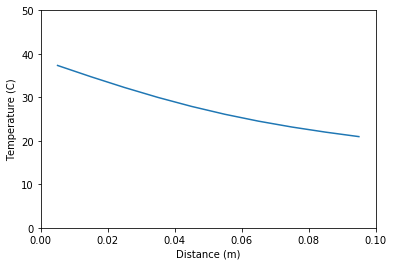

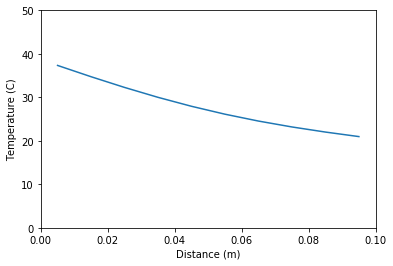

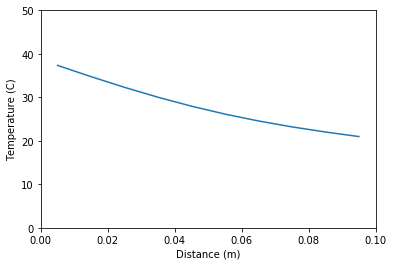

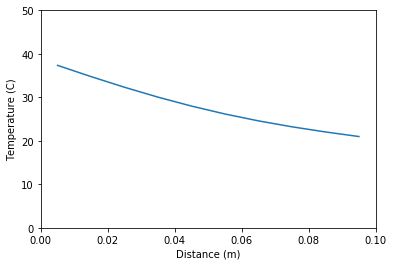

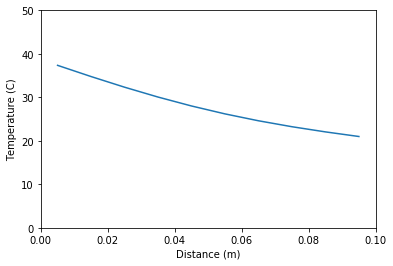

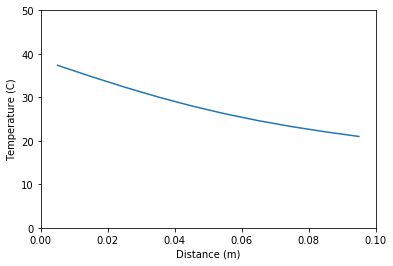

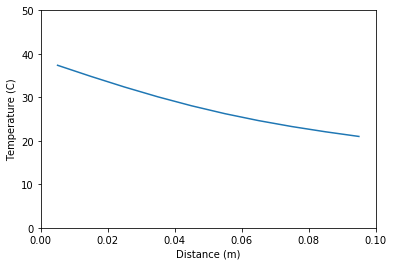

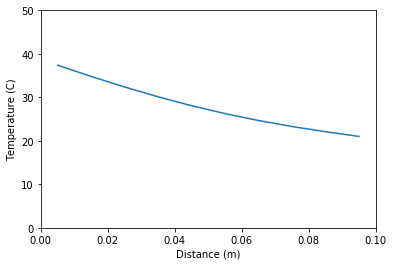

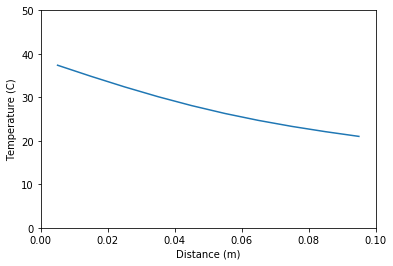

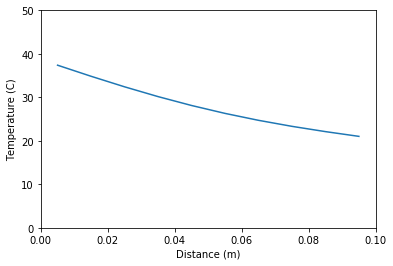

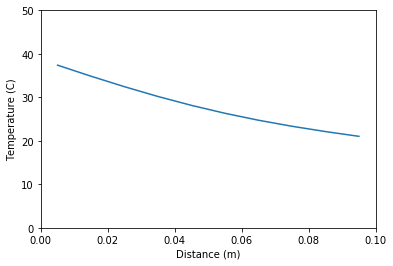

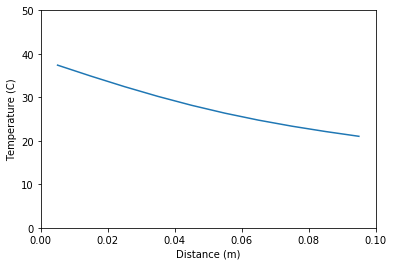

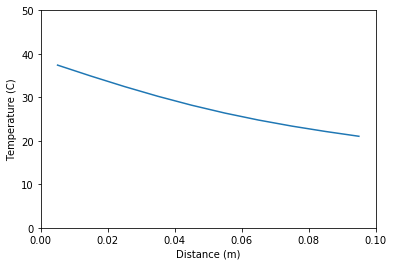

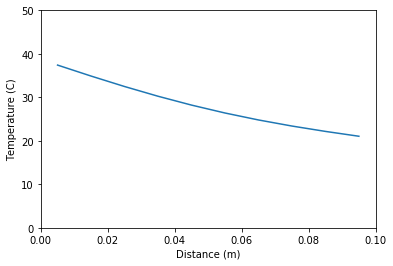

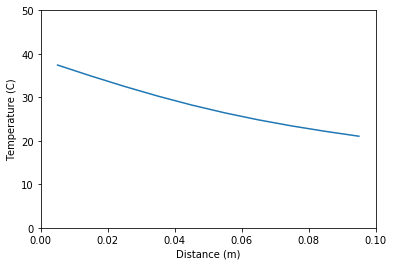

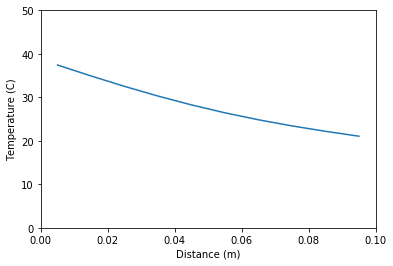

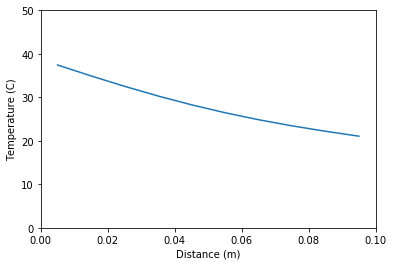

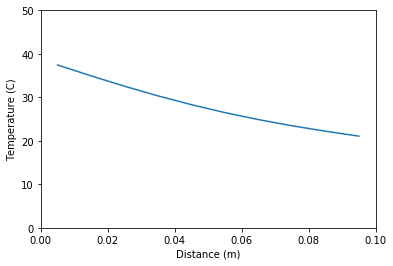

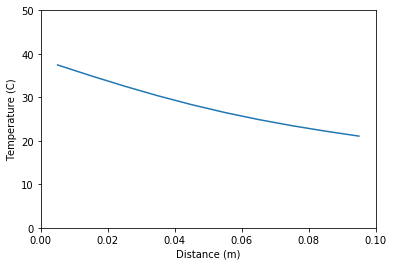

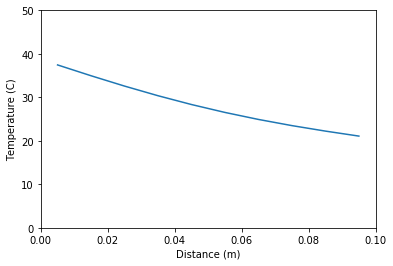

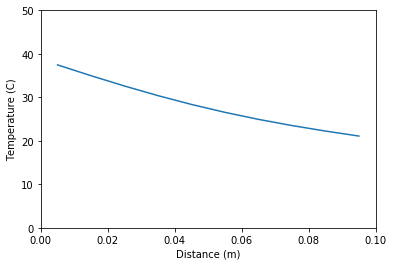

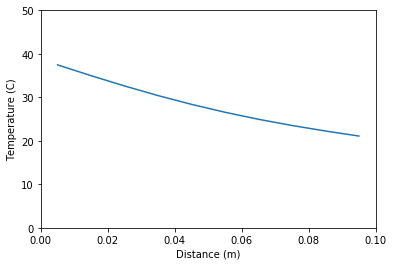

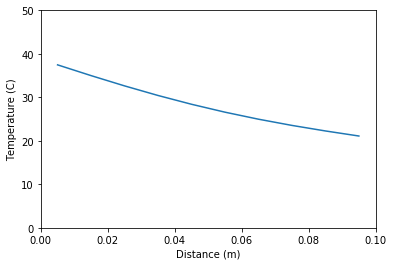

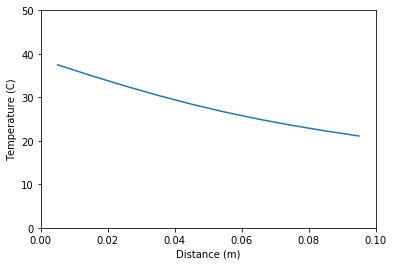

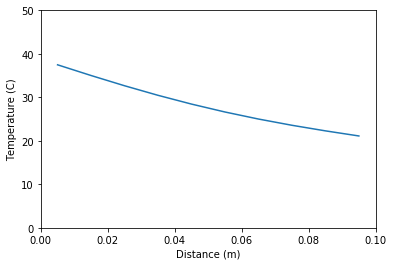

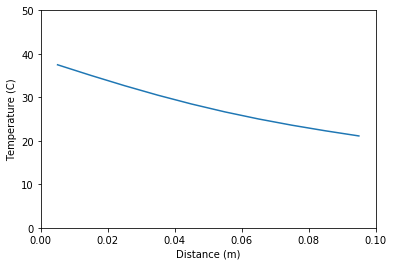

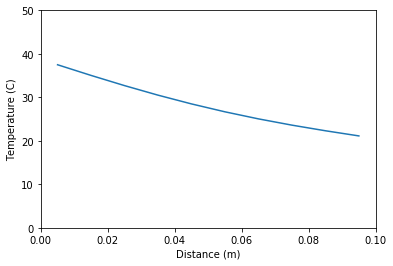

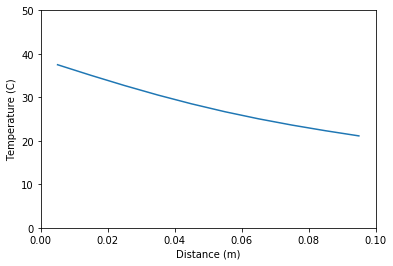

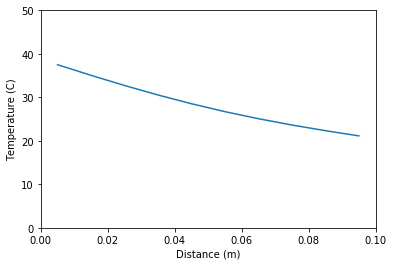

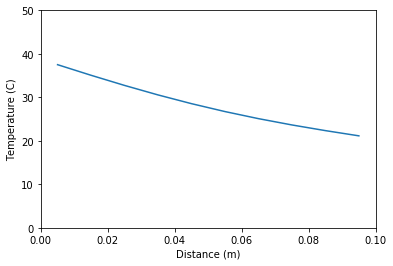

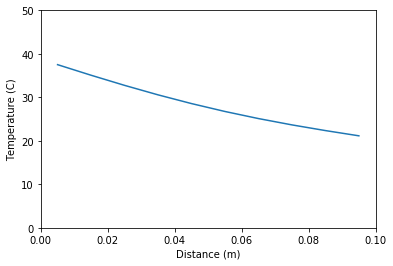

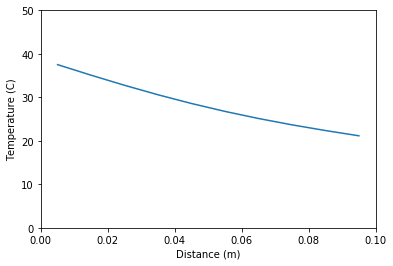

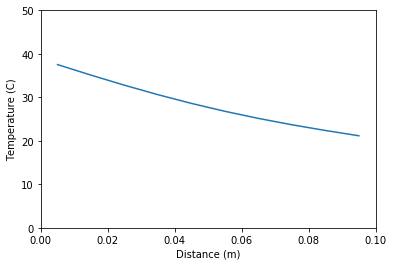

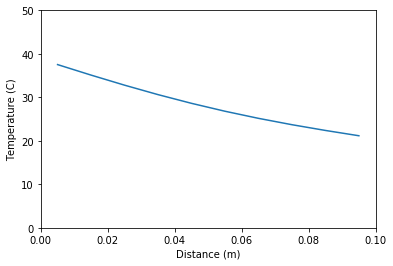

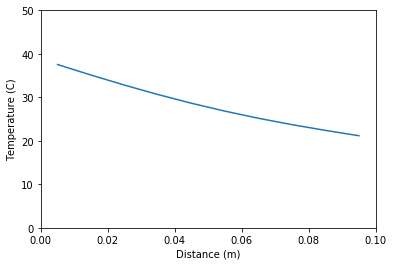

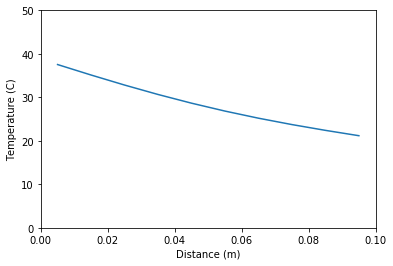

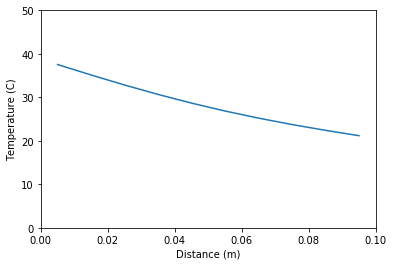

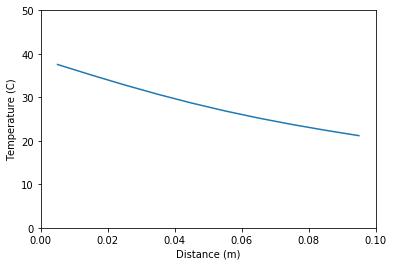

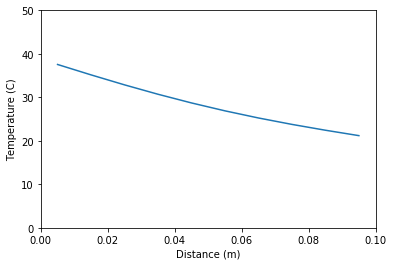

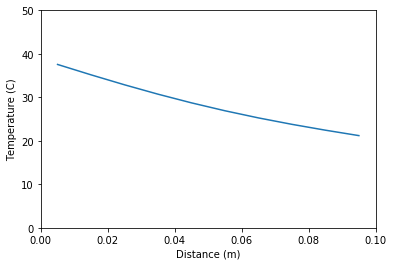

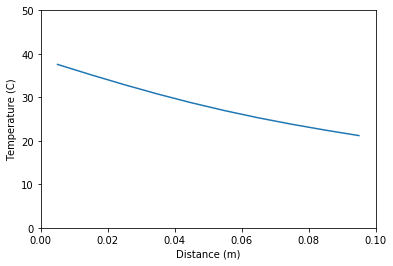

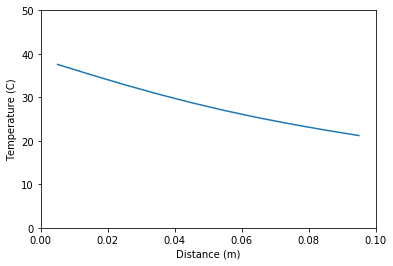

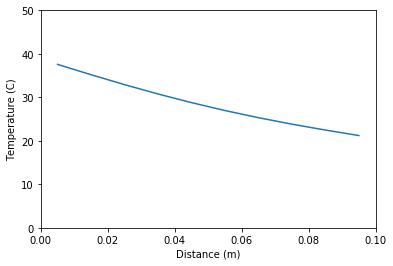

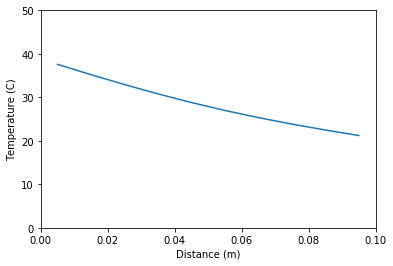

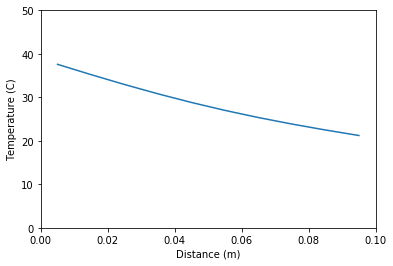

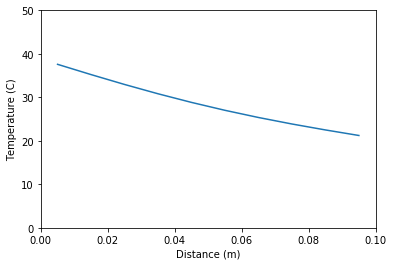

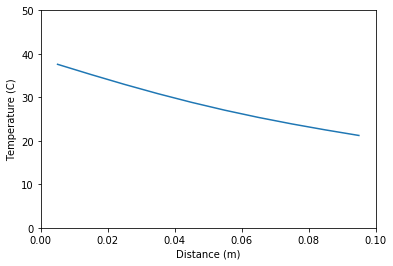

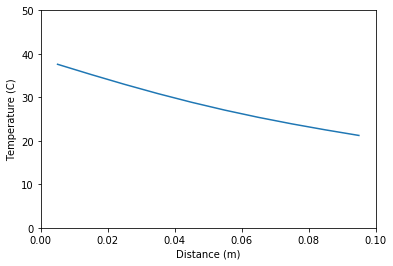

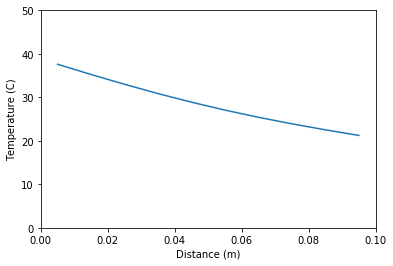

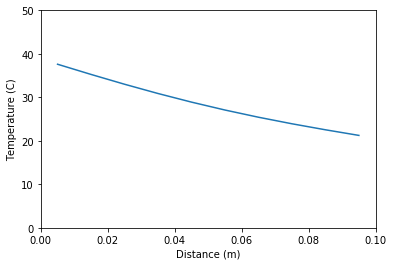

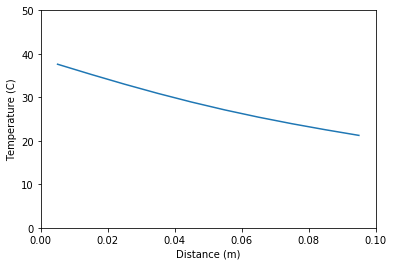

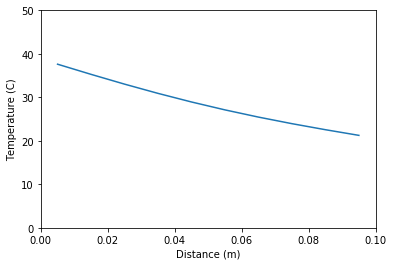

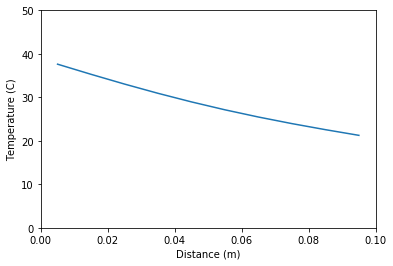

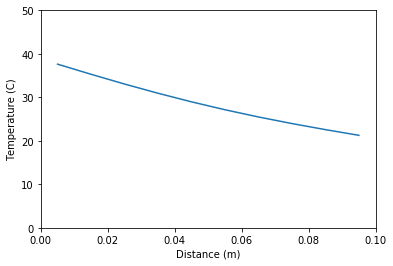

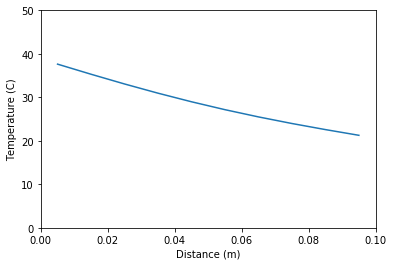

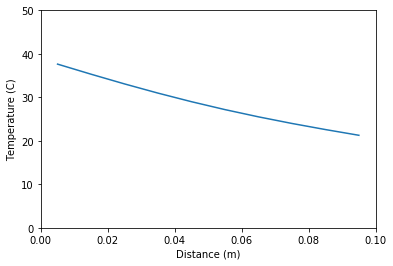

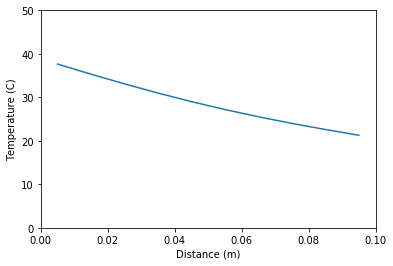

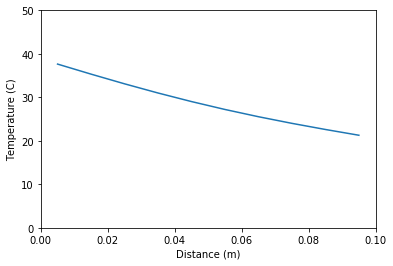

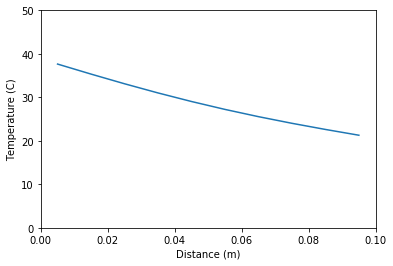

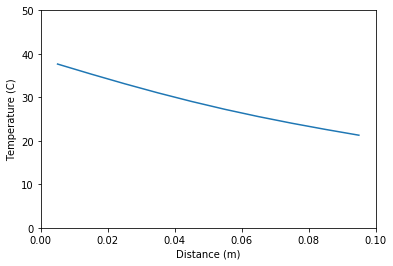

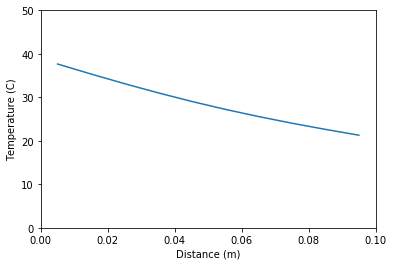

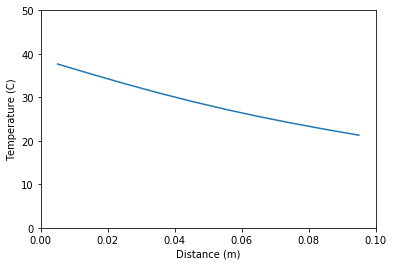

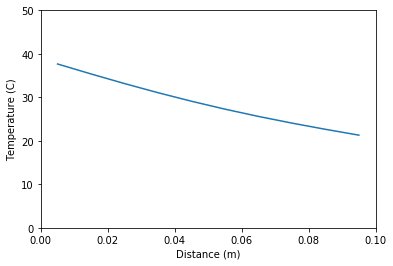

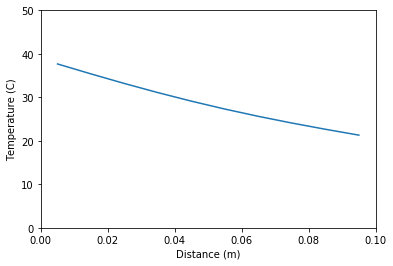

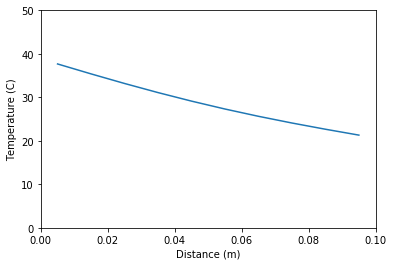

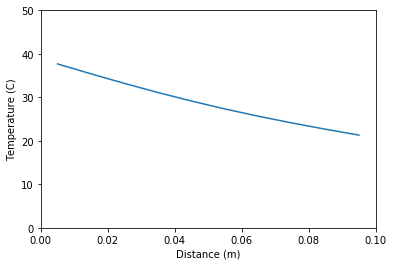

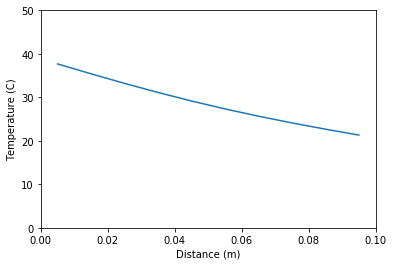

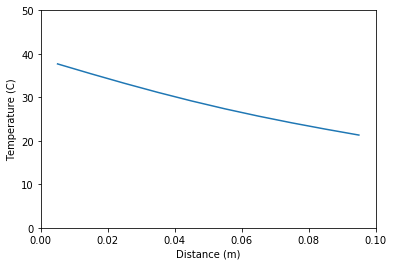

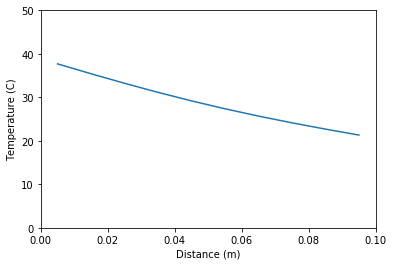

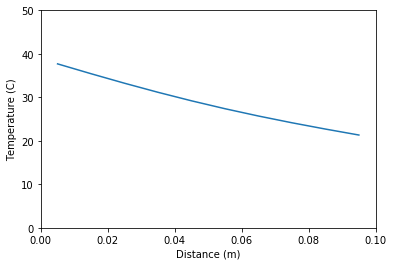

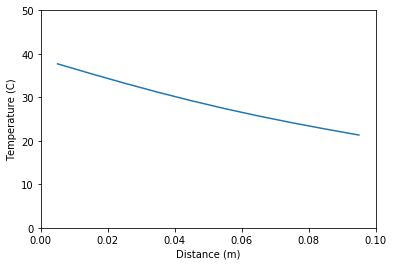

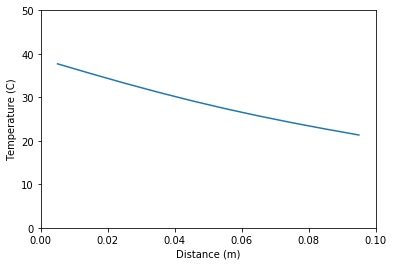

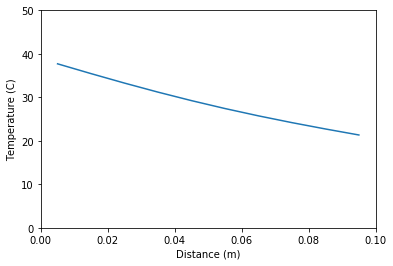

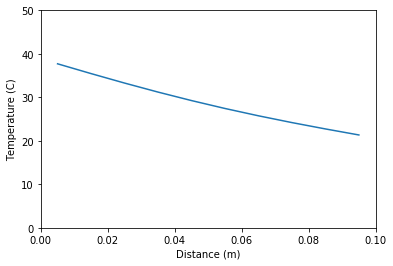

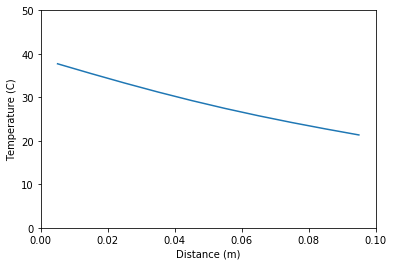

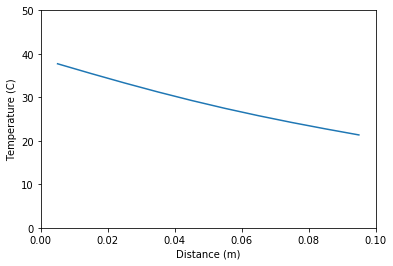

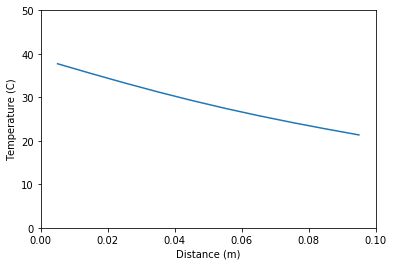

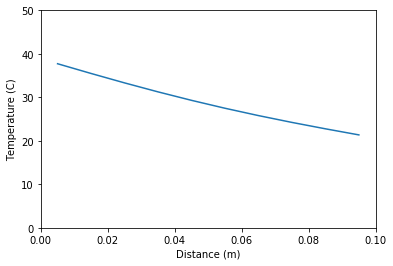

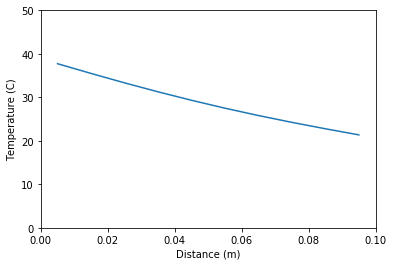

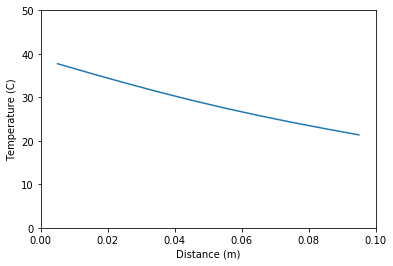

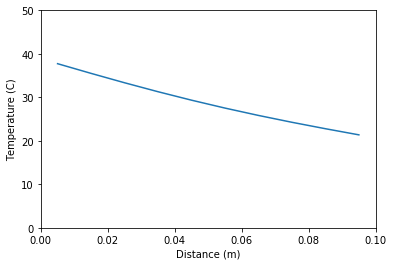

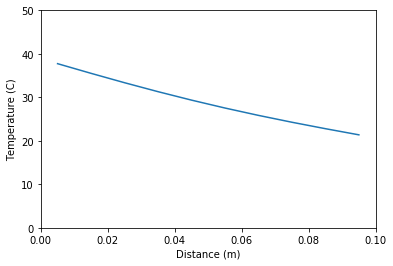

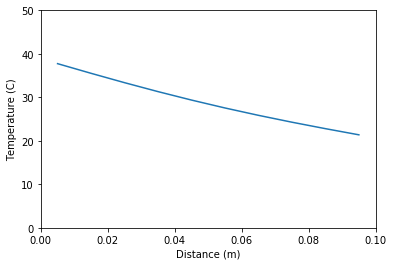

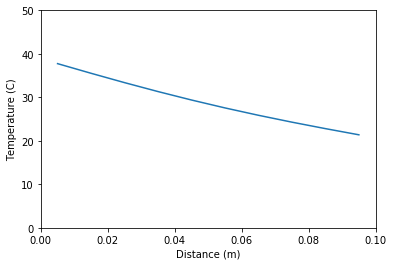

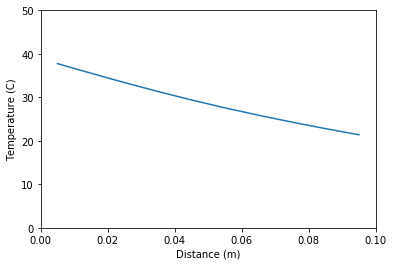

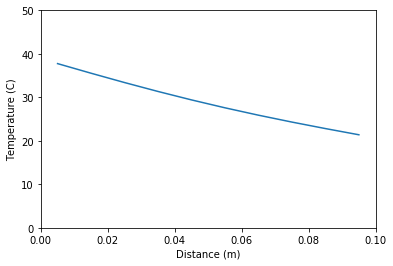

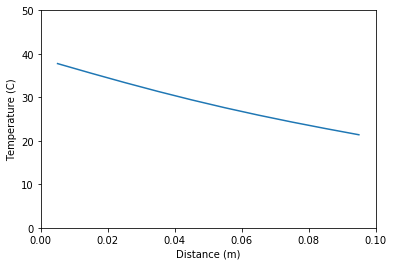

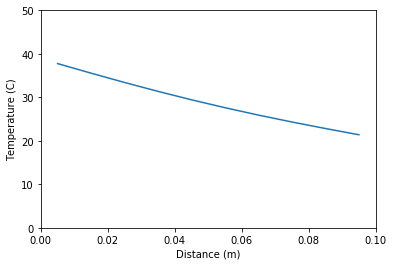

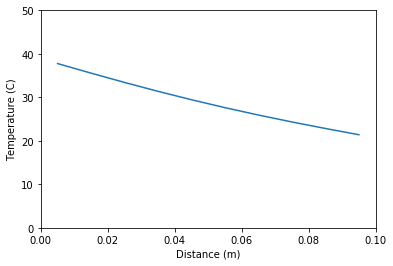

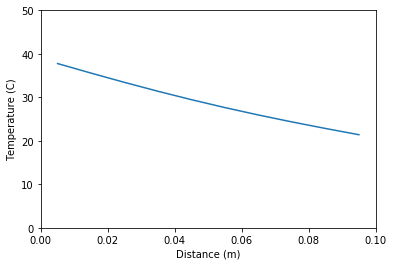

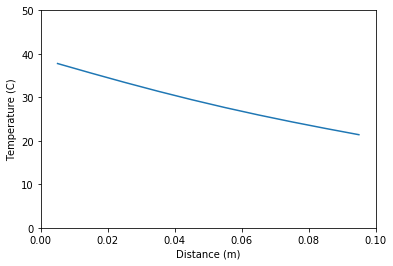

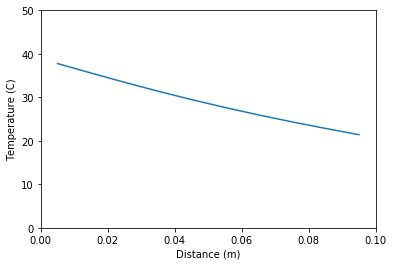

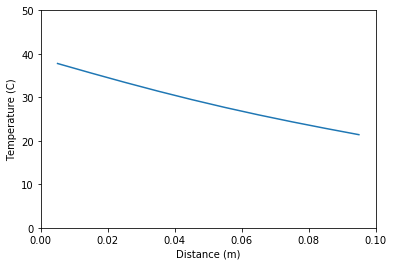

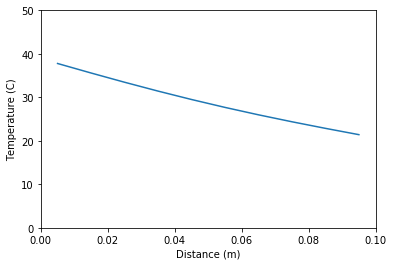

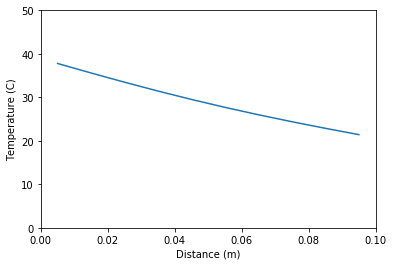

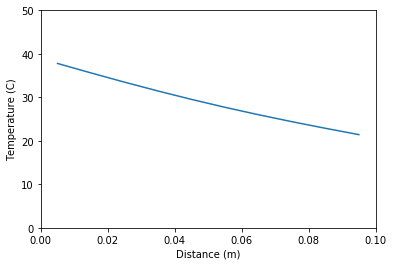

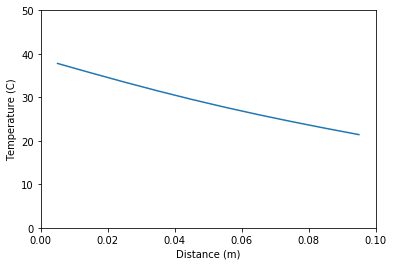

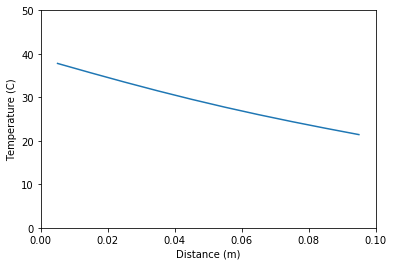

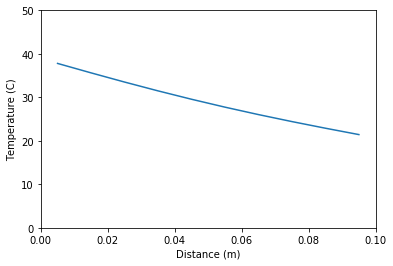

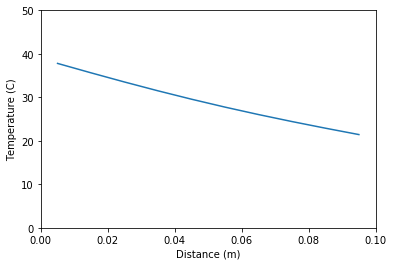

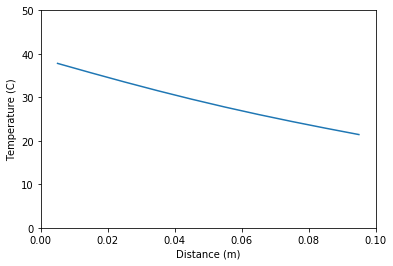

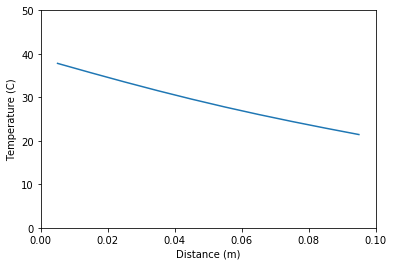

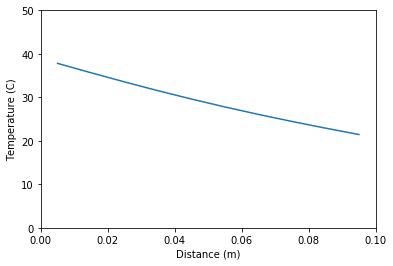

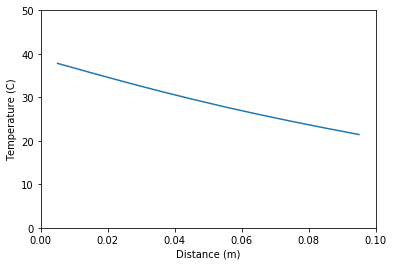

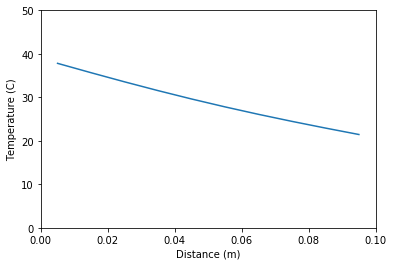

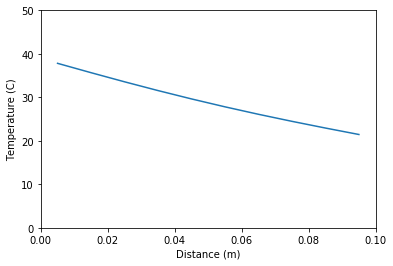

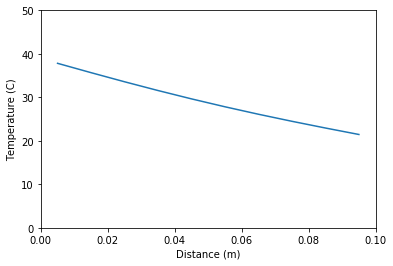

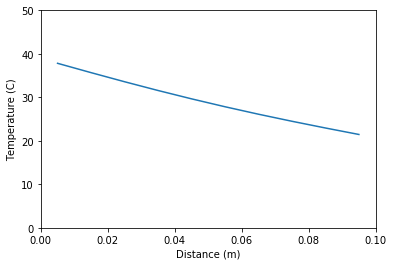

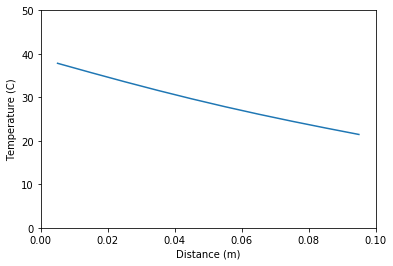

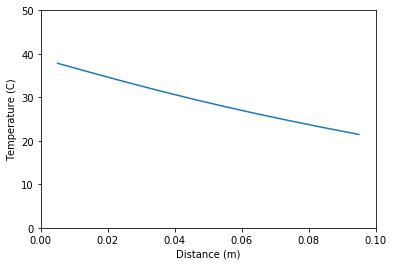

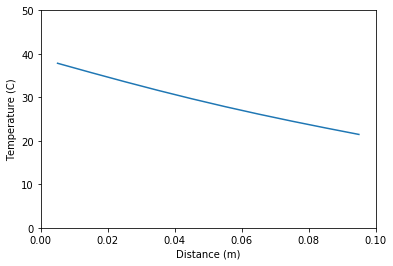

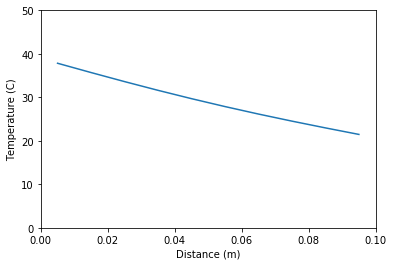

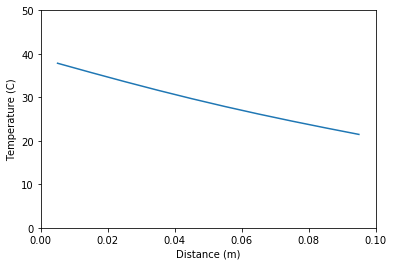

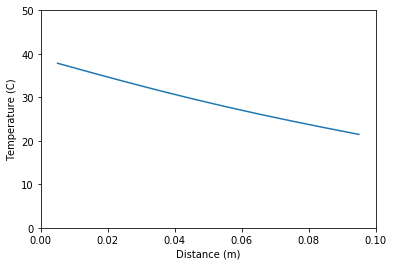

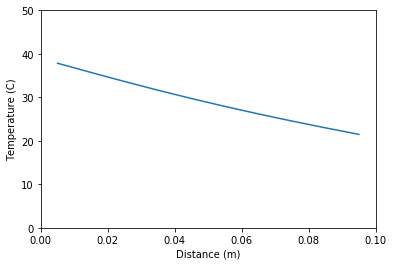

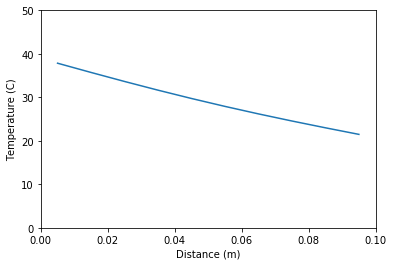

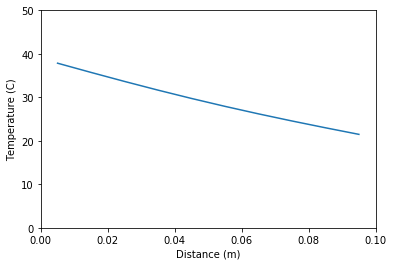

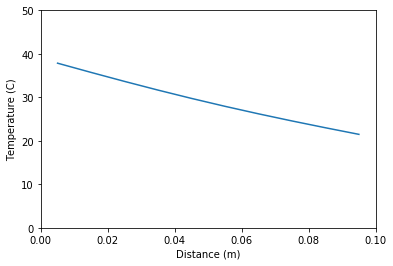

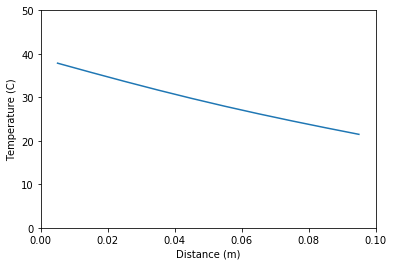

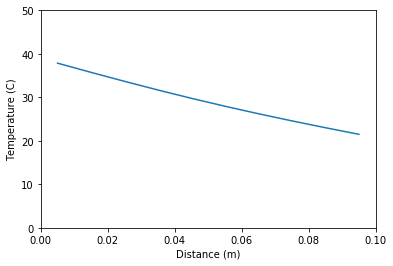

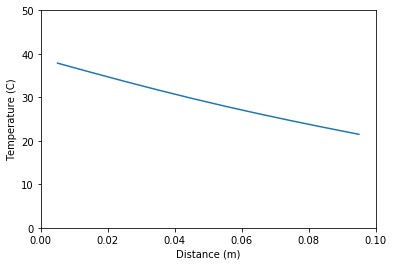

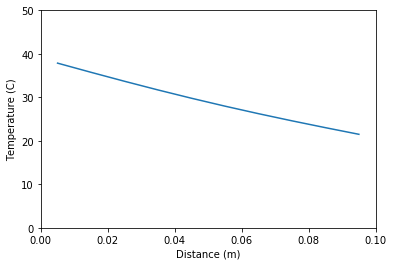

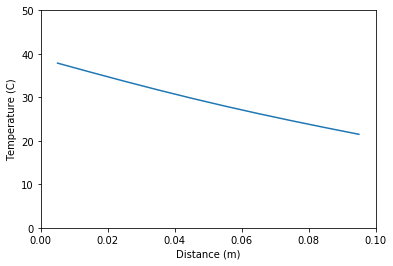

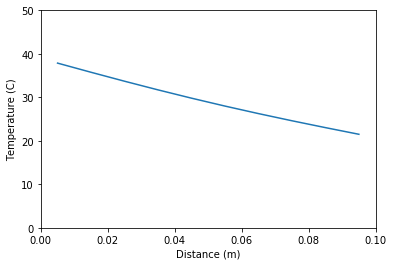

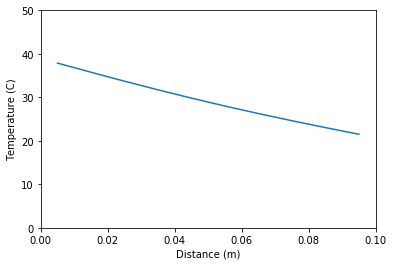

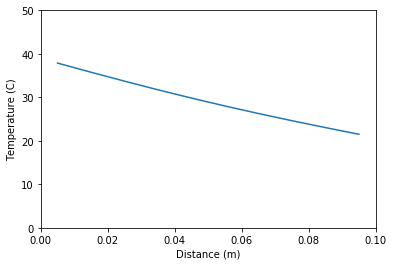

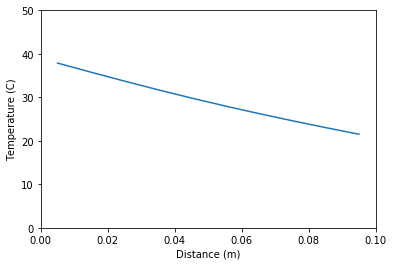

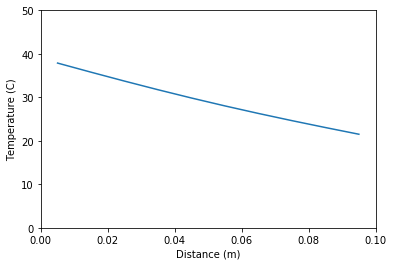

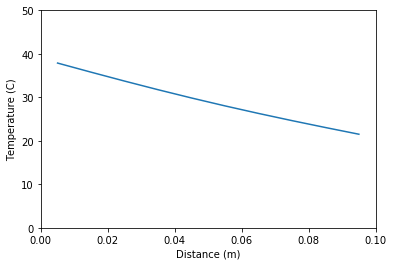

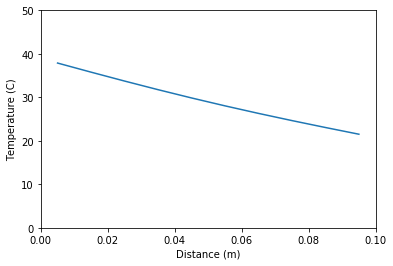

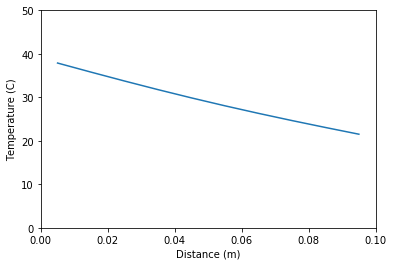

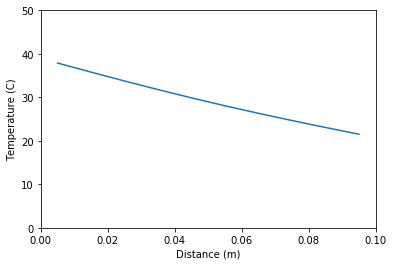

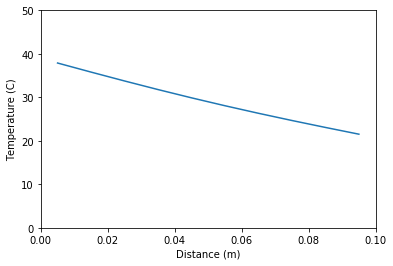

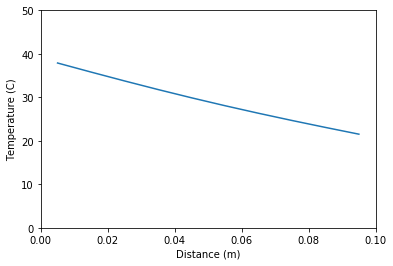

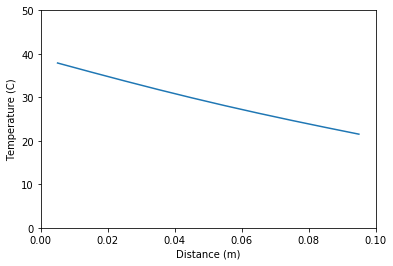

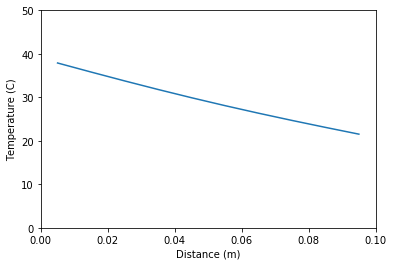

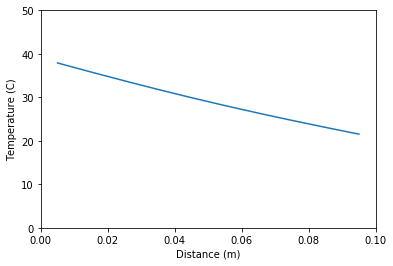

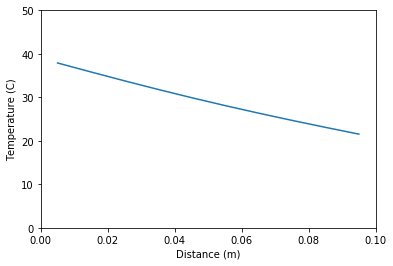

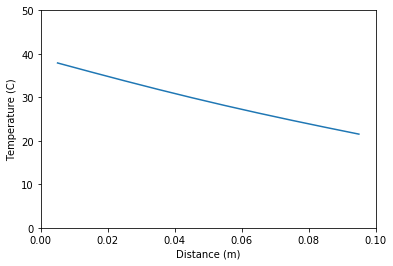

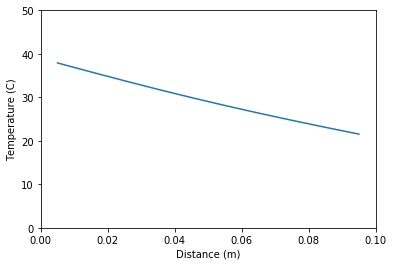

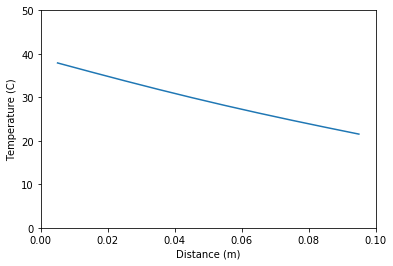

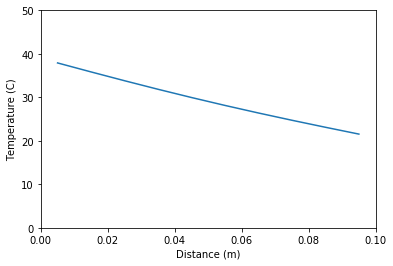

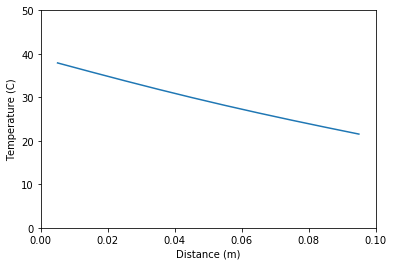

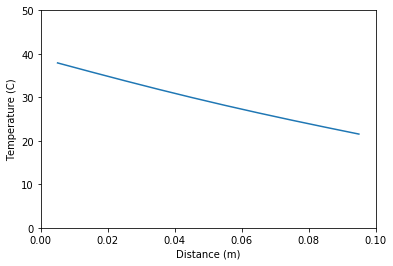

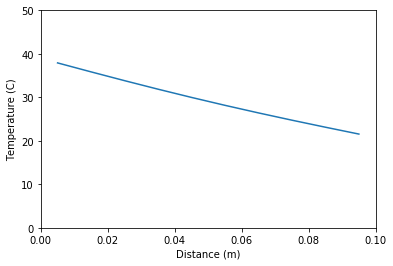

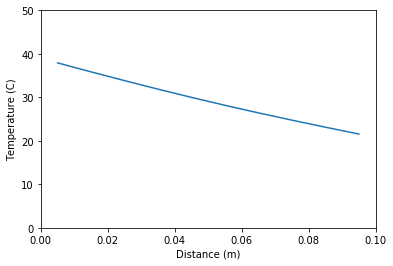

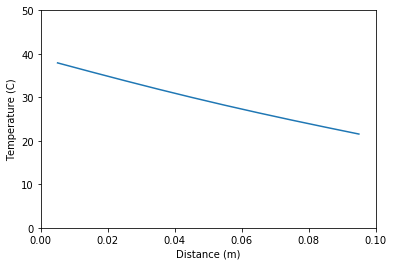

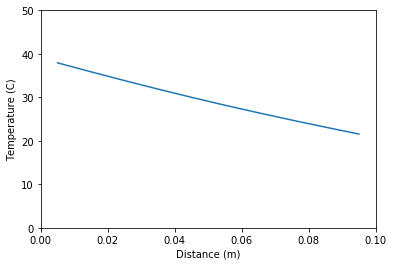

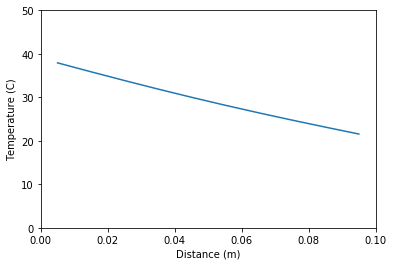

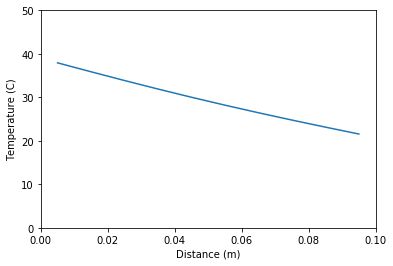

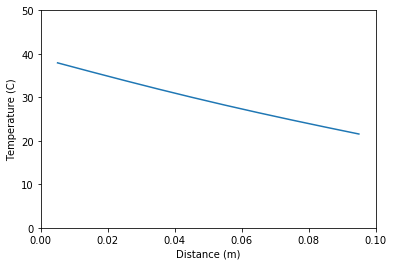

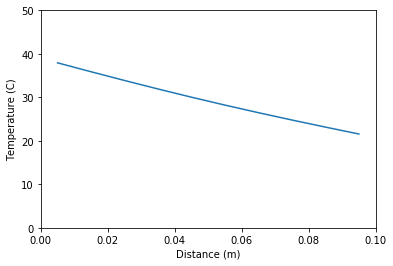

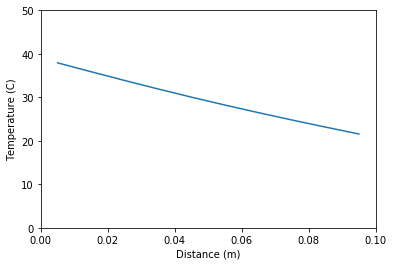

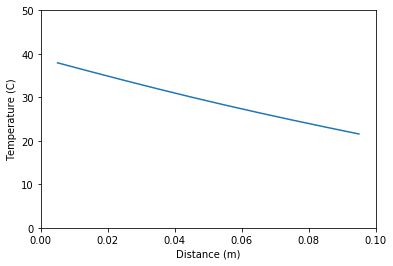

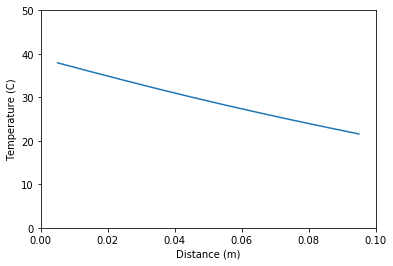

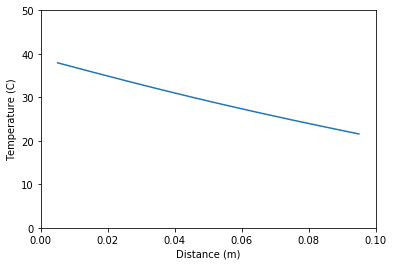

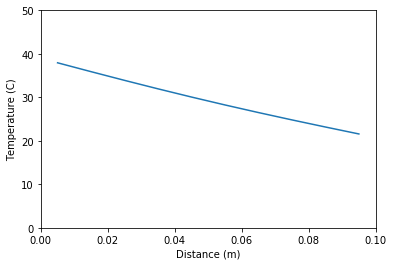

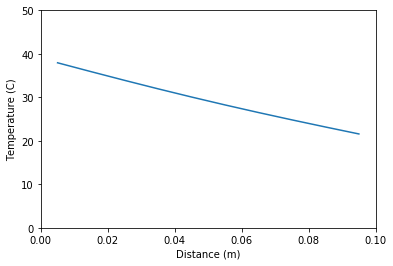

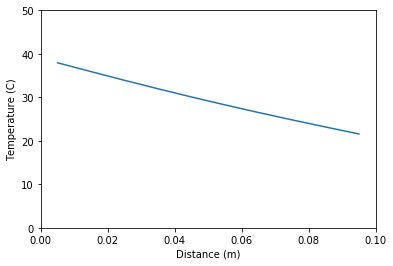

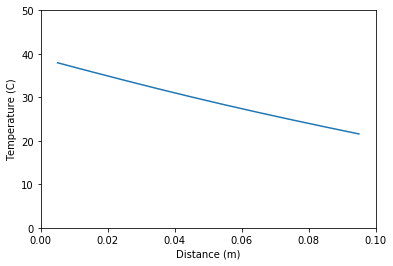

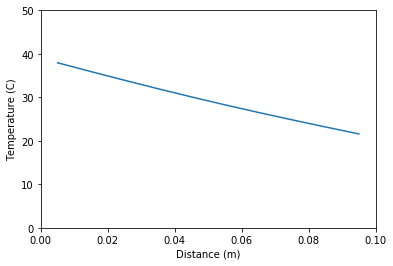

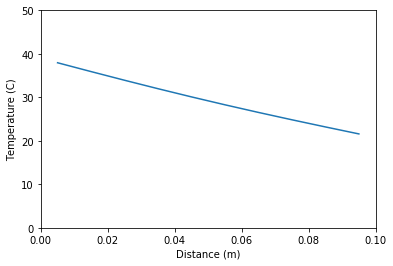

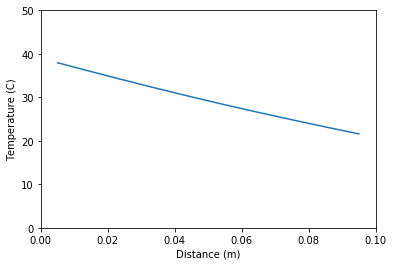

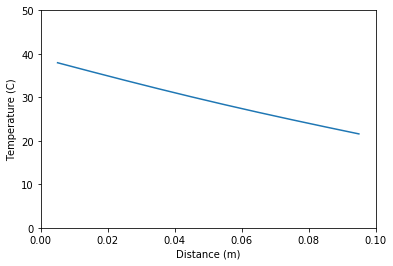

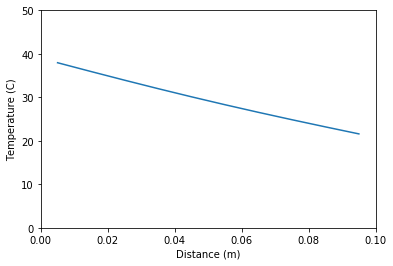

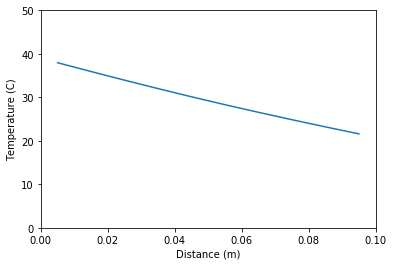

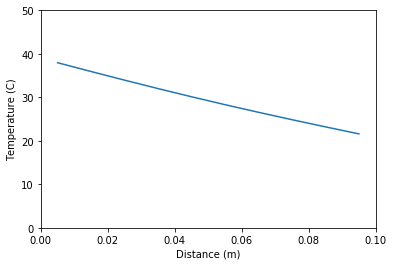

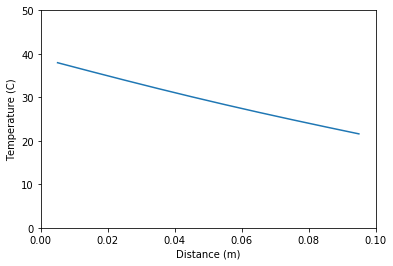

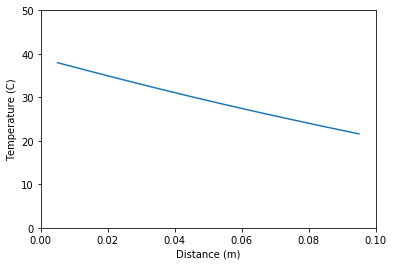

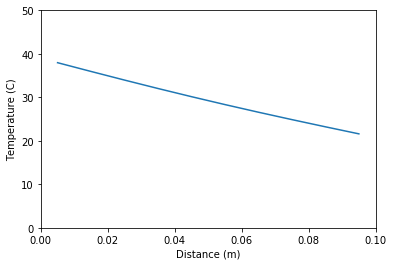

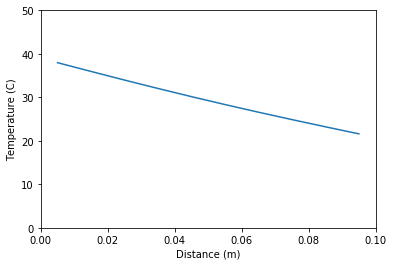

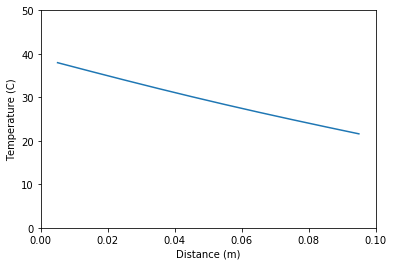

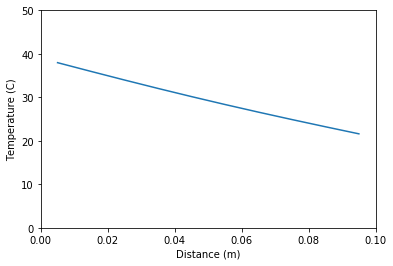

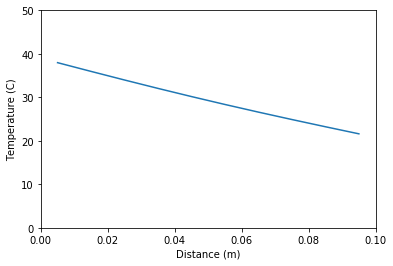

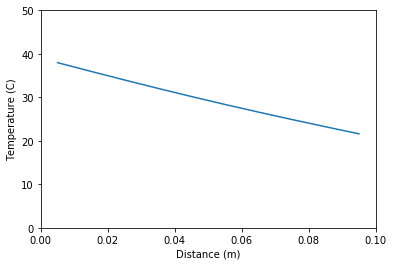

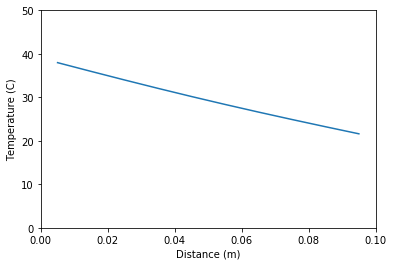

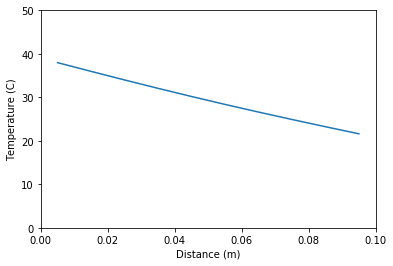

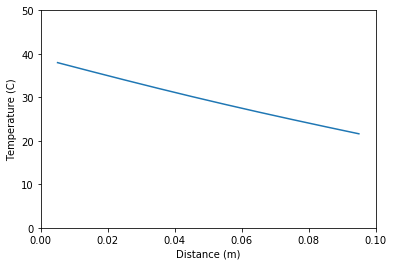

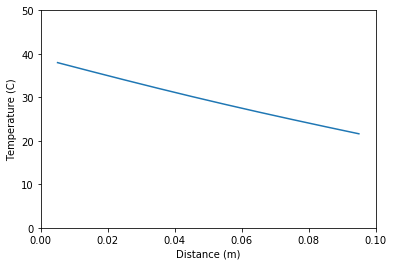

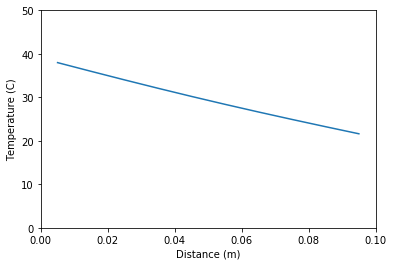

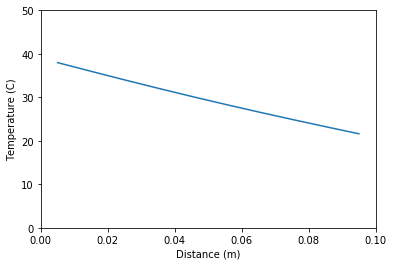

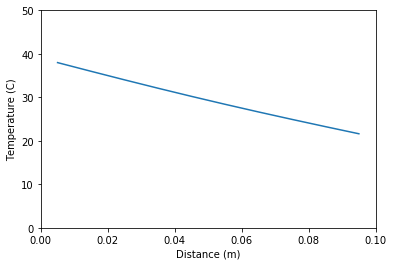

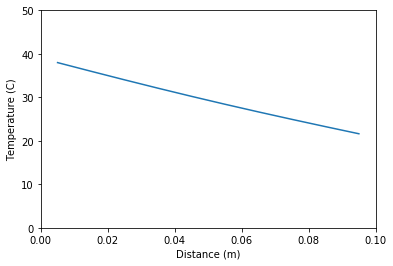

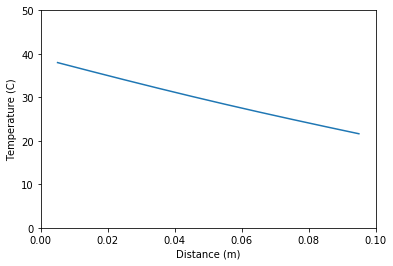

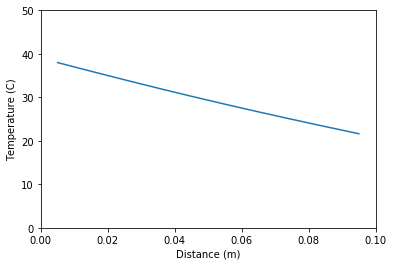

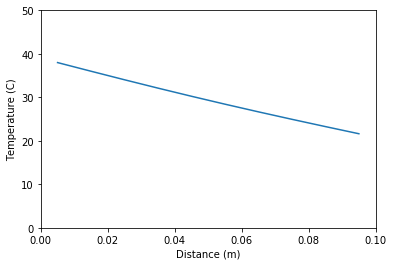

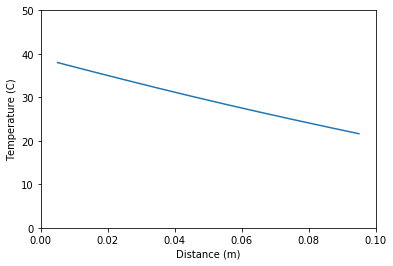

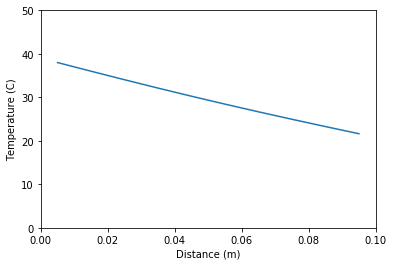

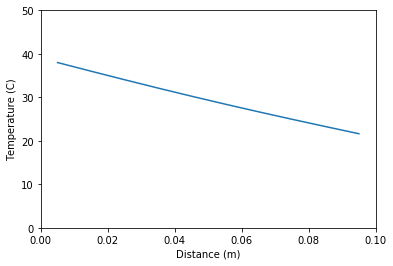

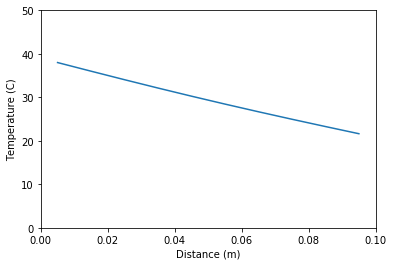

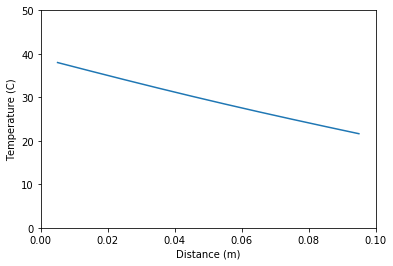

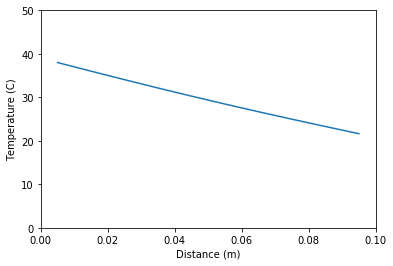

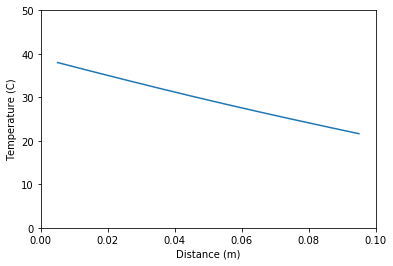

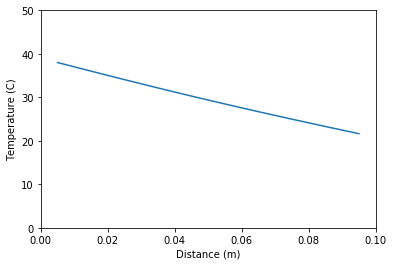

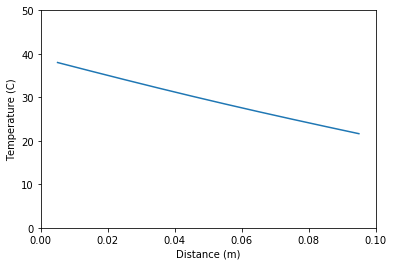

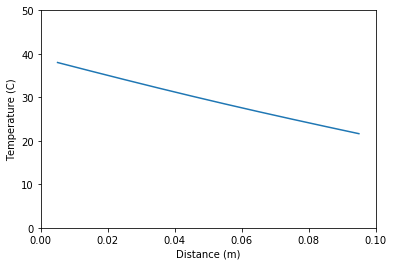

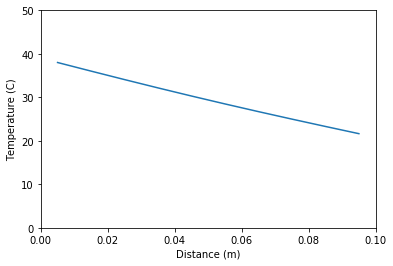

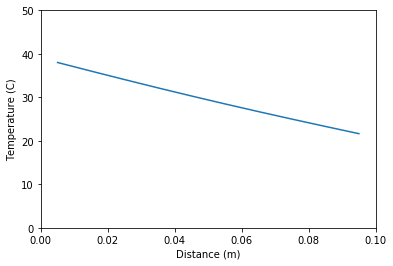

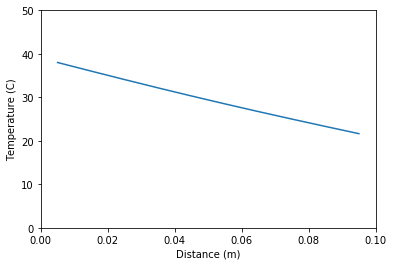

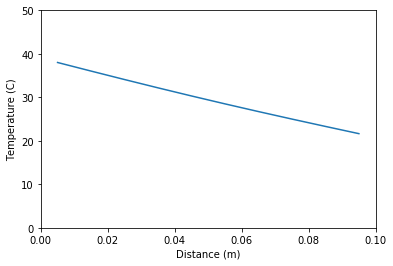

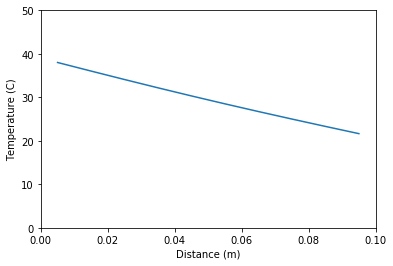

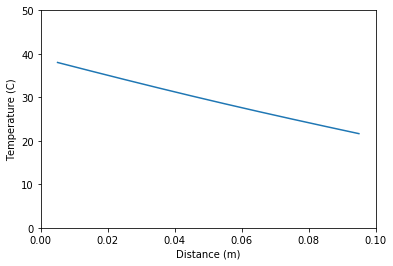

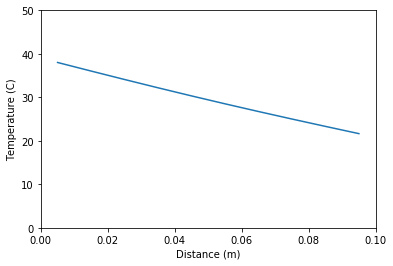

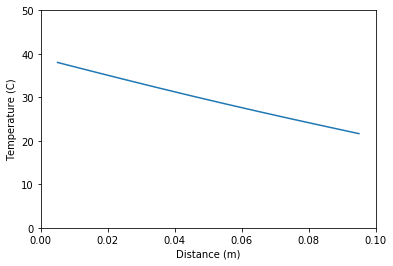

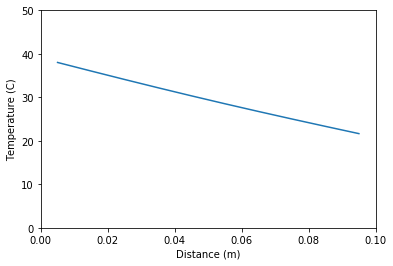

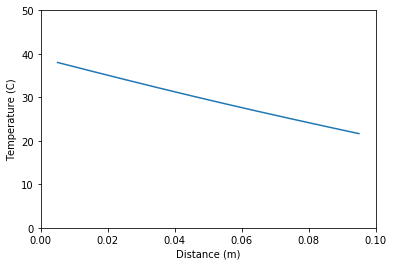

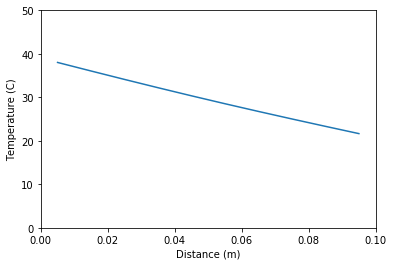

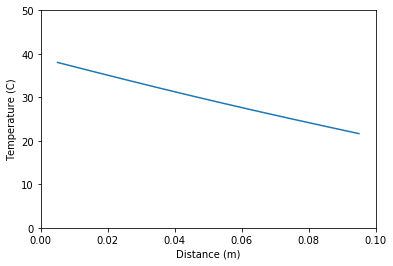

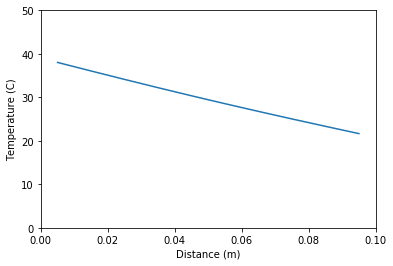

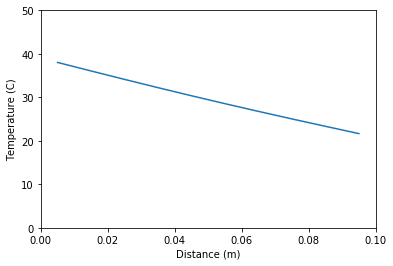

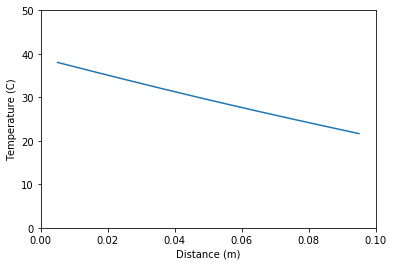

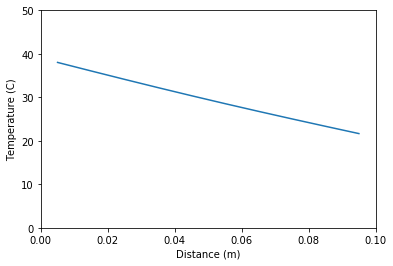

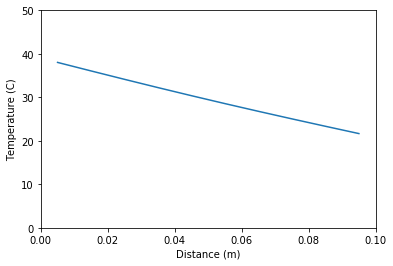

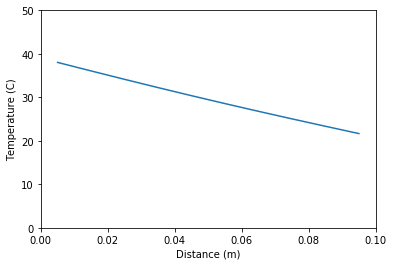

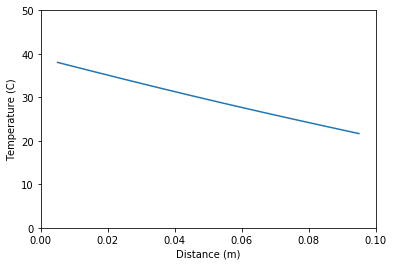

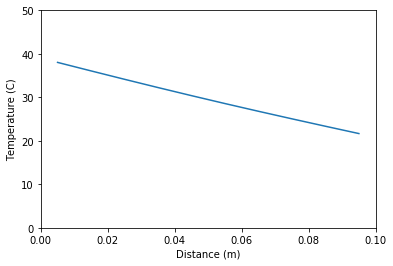

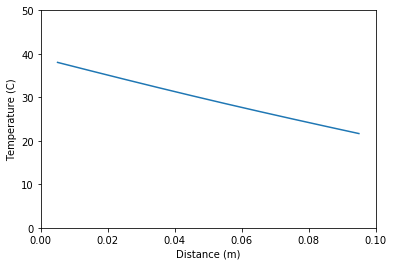

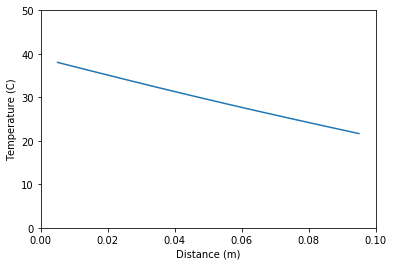

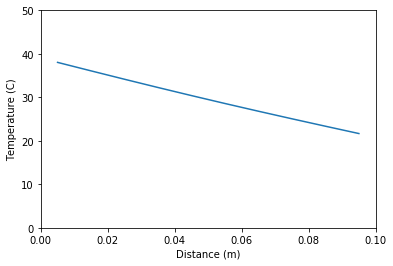

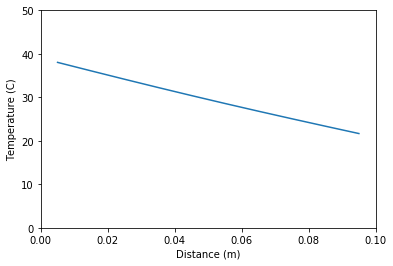

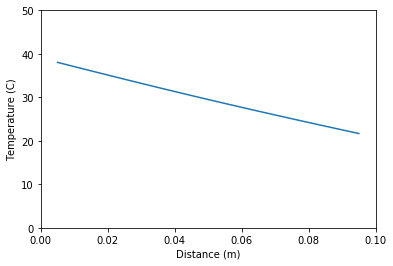

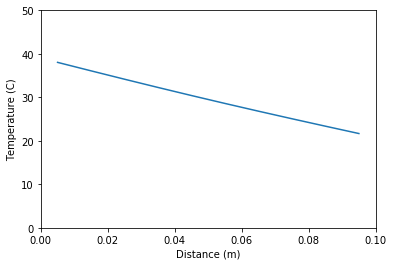

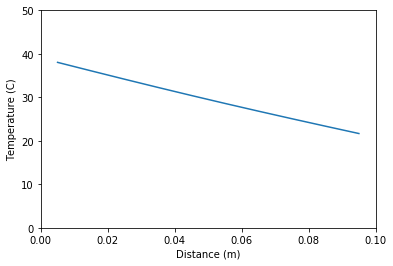

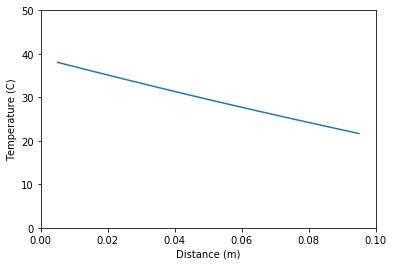

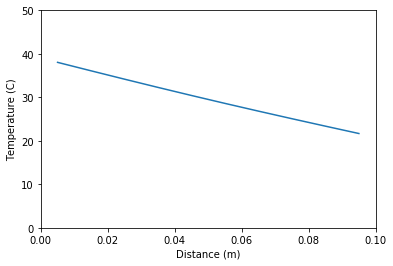

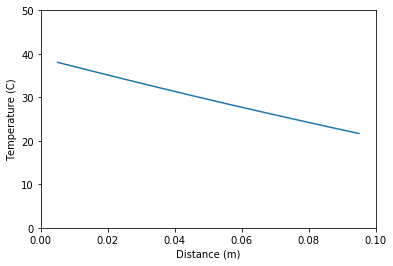

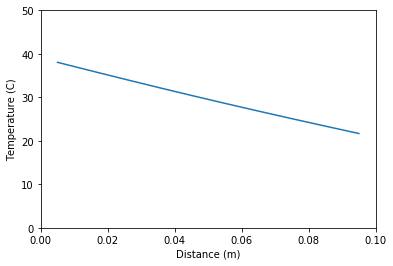

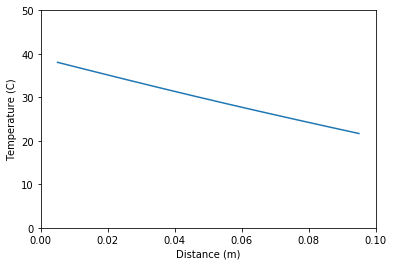

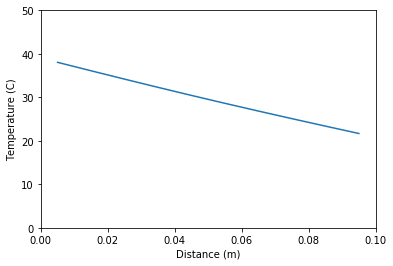

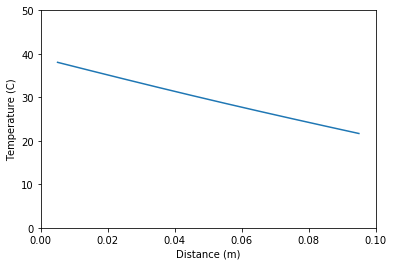

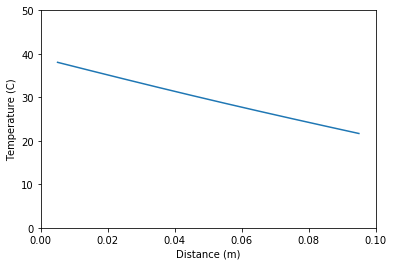

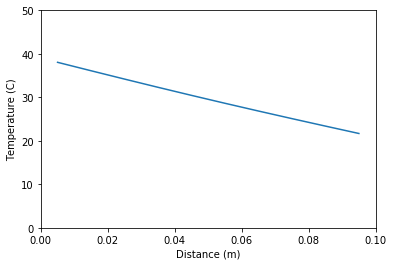

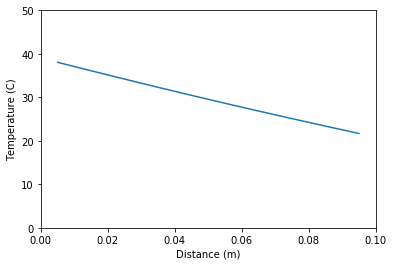

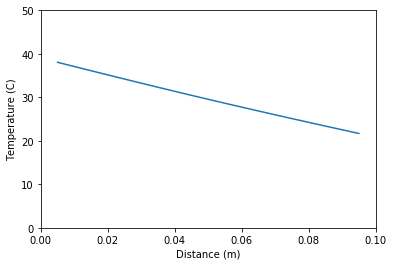

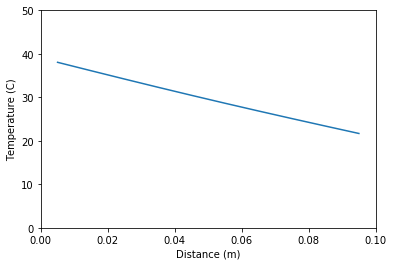

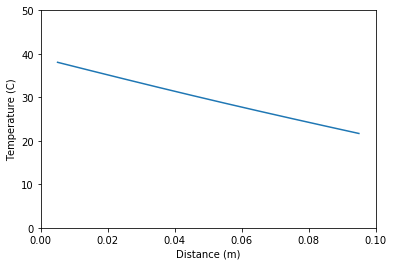

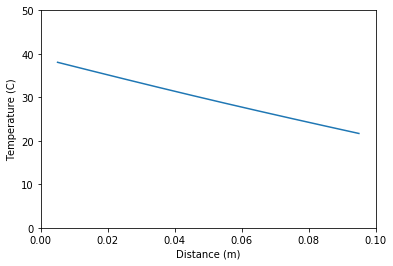

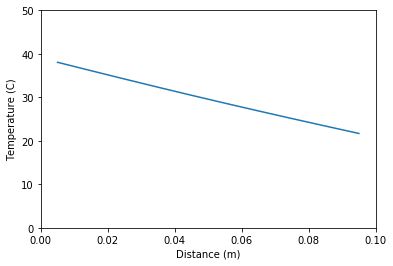

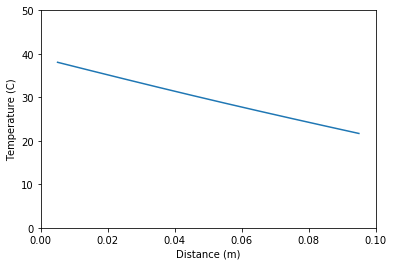

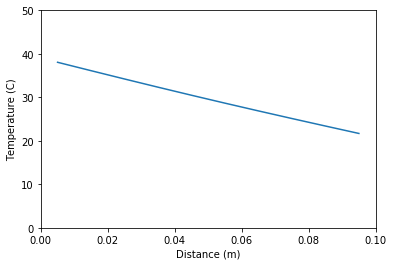

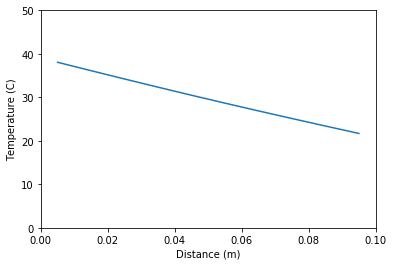

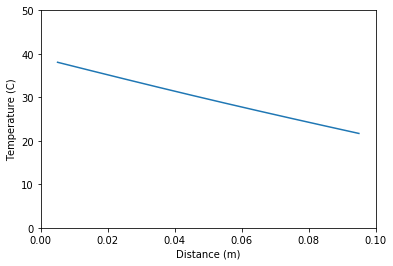

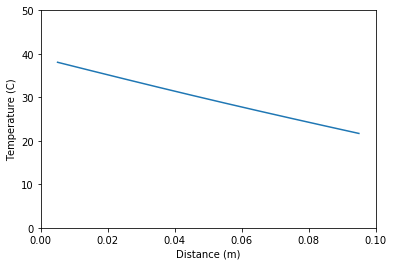

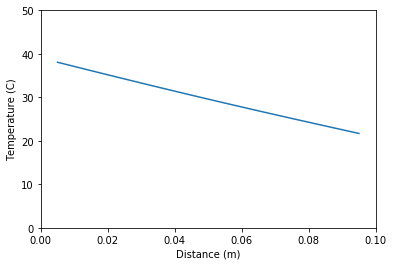

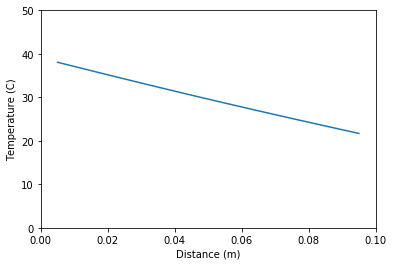

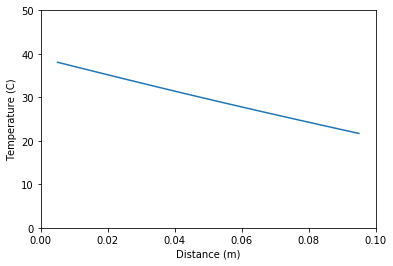

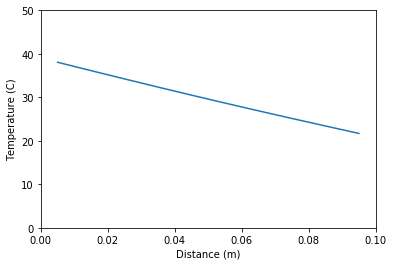

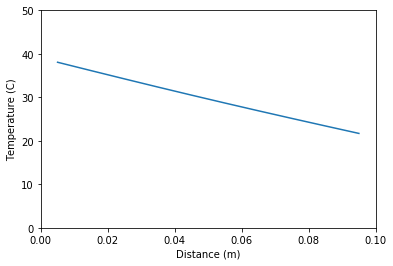

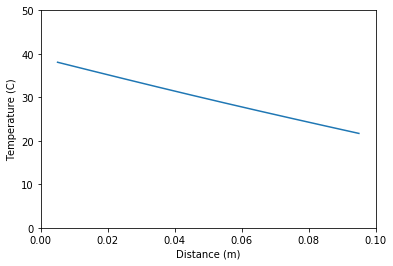

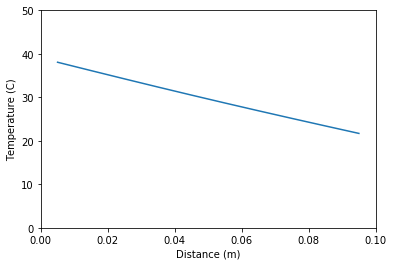

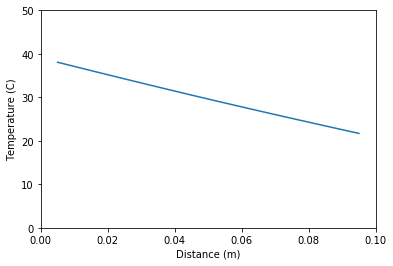

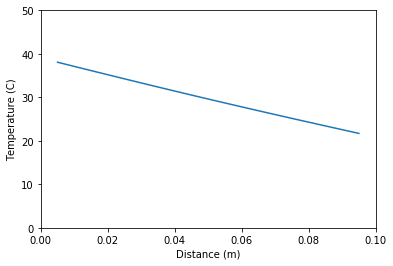

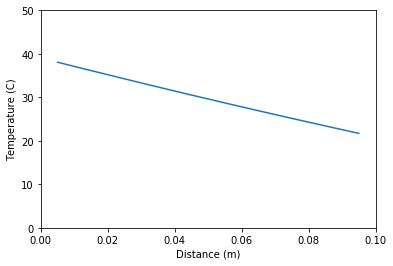

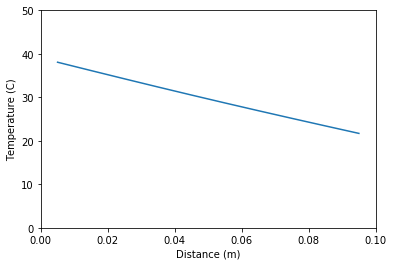

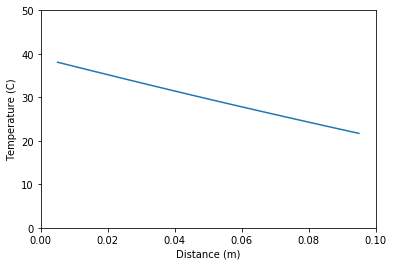

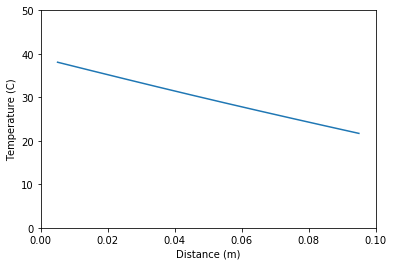

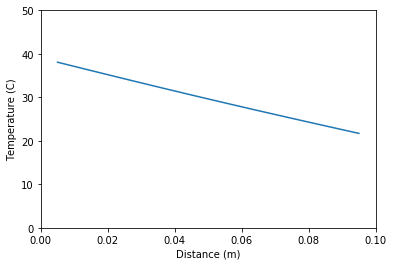

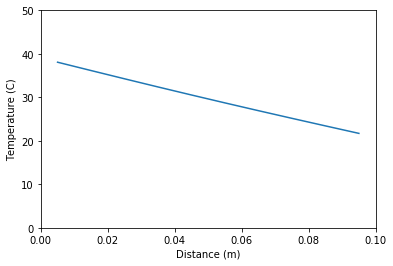

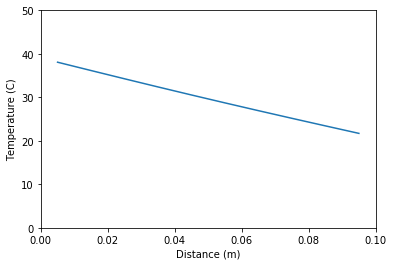

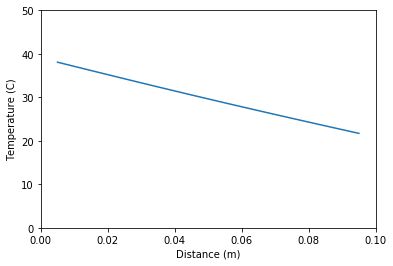

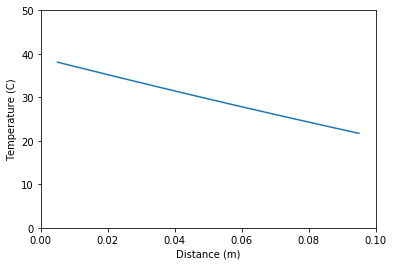

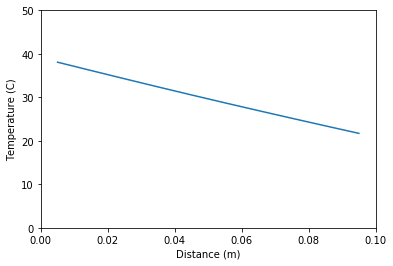

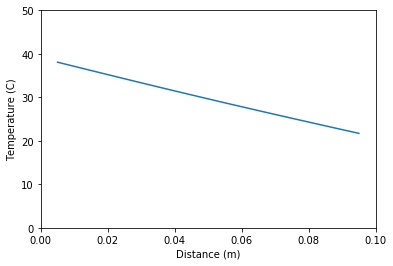

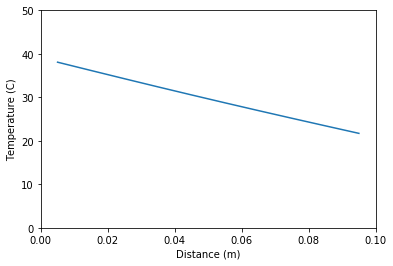

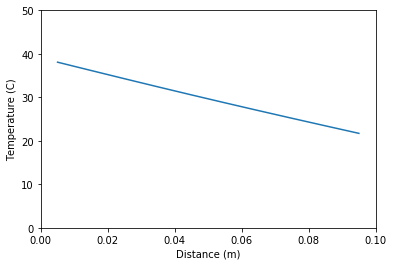

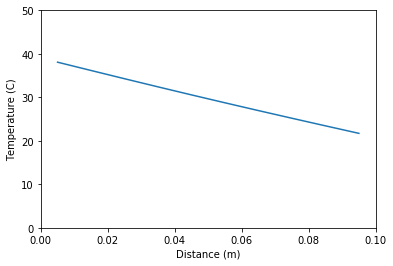

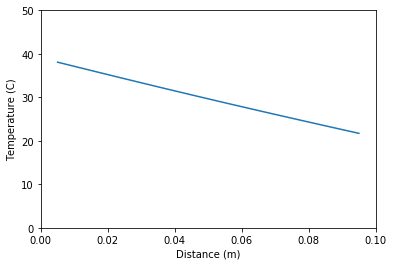

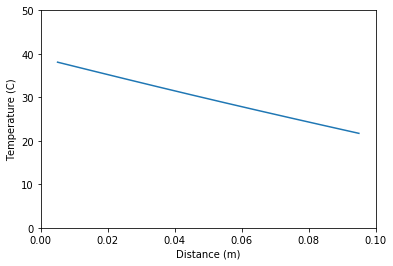

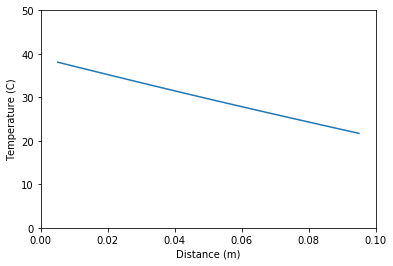

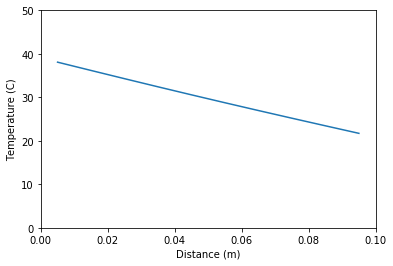

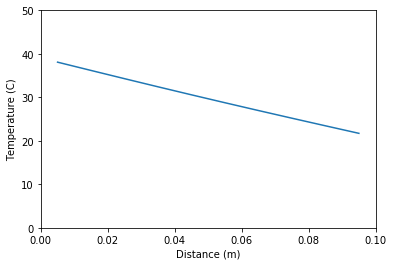

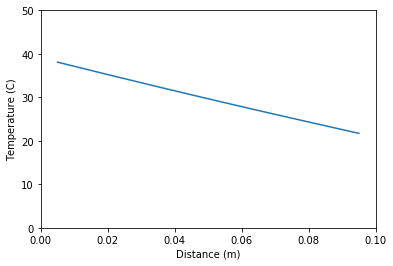

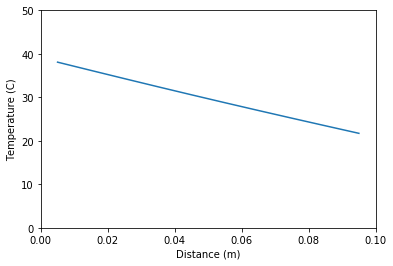

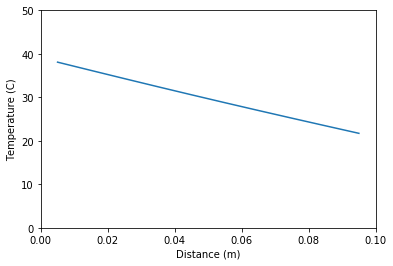

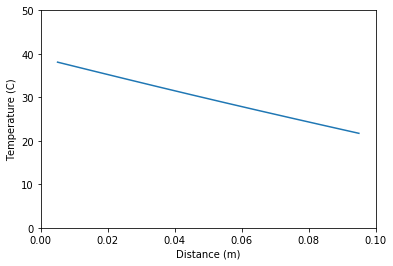

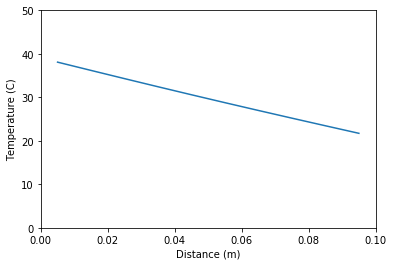

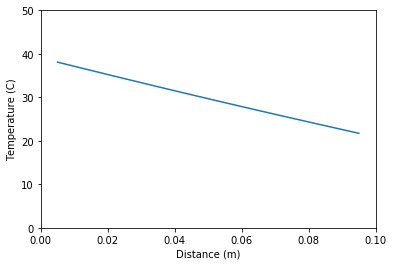

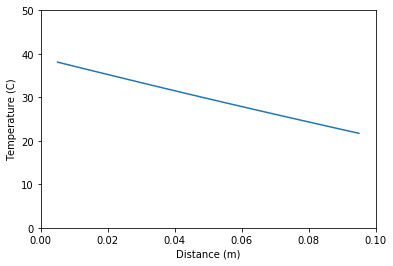

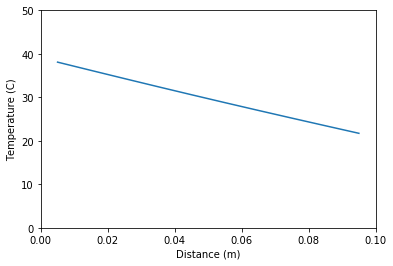

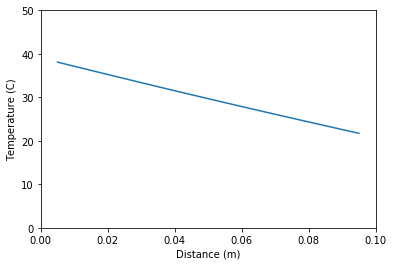

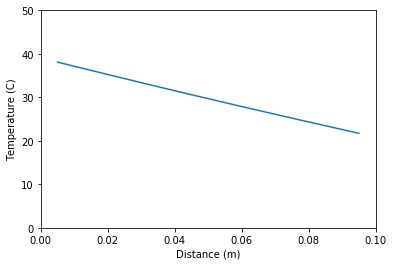

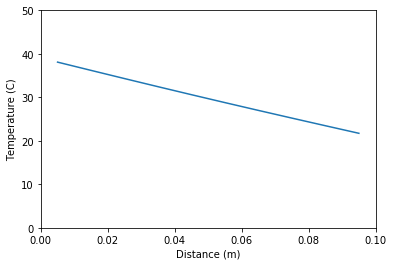

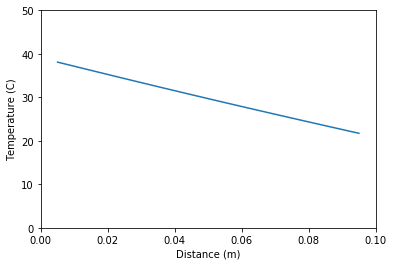

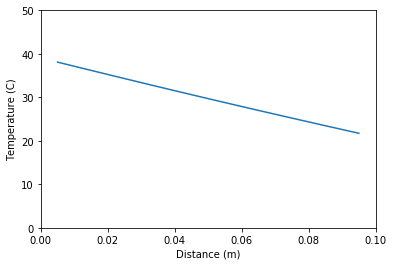

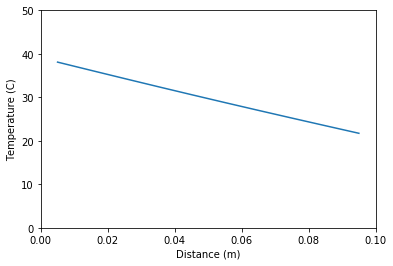

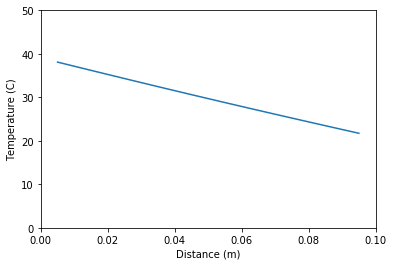

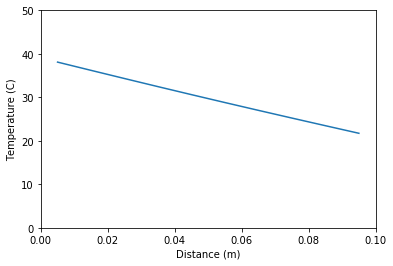

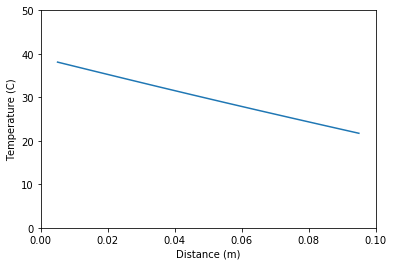

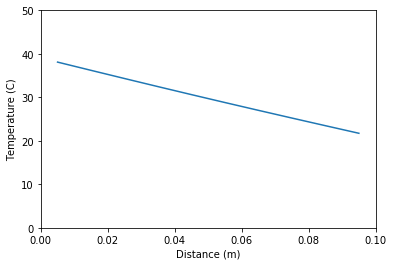

In [12]:
L = 0.1 # length of the plate or wall
n = 10 # nodes of discrete 
T0 = 0
T1s = 40 # surface temperatures
T2s = 20 # surface temperature on the second side
dx = L/n
alpha = 0.0001
t_final = 60
dt = 0.1
x = np.linspace(dx/2,L-dx/2,n) # points which should be plotted or explored on the grid (linspace arguments are 
                               #(starting point, endpoint, total number of points)
T = np.ones(n)*T0 # create the initial temperature of each slice
dTdt = np.empty(n) # initialize the derivatives
t = np.arange(0,t_final,dt)# timespan

    

for j in range(1,len(t)):
    plt.ioff()
    for i in range(1,n-1):
        dTdt[i] = alpha *((T[i+1] - 2*T[i] + T[i-1])/dx**2)
    dTdt[0] = alpha *((T[0+1] - 2*T[0] + T1s)/dx**2) # at the boundary x = 0
    dTdt[n-1] = alpha *((T2s - 2*T[n-1] + T[n-2])/dx**2) # at the boundary x = L
    T = T + dTdt*dt 
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x,T)
    ax.axis([0,L, 0,50])
    ax.set_xlabel('Distance (m)')
    ax.set_ylabel('Temperature (C)')
    plt.show()
    plt.pause(0.01)       

